# Portfolio Construction and Analysis



- 1-Risques et rendements
  * 1.a calcul des rendements avec numpy
  * 1.b calcul des rendements avec pandas
  * 1.c Mesure de risques
  * 1.d Max Drawdown
- 2 - estimations des risques extrêmes
  * 2.a deviation from normality
  * 2.b mesures de risques
- 3 - Portfolio Optimisation et efficient frontier
  * 3.a Ratio de sharpe
  * 3.b Efficient Portfolio without a risk-free asset
  * 3.c Efficient Portfolio with a risk-free asset
  * 3.d Maximum sharpe ratio et Capital Market Line (CML)
  * 3.e Global Minimum Variance (GMV) portfolio
  * 3.f limites de la diversification
- 4 - CPPI
- 5 - Monte Carlo simulation
  * 5.a Simulating asset returns
  * 5.b Liability hedging portfolios
  * 5.c modèle de Cox Ingersoll Ross (CIR)

- 6 - Factor and Index models
  * 6.a Single Index models
  * 6.b Efficient Frontier with the Single Index model
  * 6.c Factor models
- 7 - Black-Litterman model


## 1- Risques et rendements

<font color="orange">La construction et l'analyse de portefeuille sont des aspects cruciaux qui permettent aux investisseurs de construire des P optimaux répondant à leurs objectifs d'investissement et leur tolérance au risque.</font>

<font color="orange">Lors de la construction d'un portefeuille, il est essentiel de comprendre les risques et les rendements associés à chaque investissement potentiel.</font>


rendements R de $t$ à $t+1$ :
$$ R_{t,t+1}=\frac{P_{t+1}-P_t}{P_t}=\frac{P_{t+1}}{P_t}-1$$

Si des dividendes D ont été distribués à t+1, la formule des rendements est :
$$ R_{t,t+1} = \frac{P_{t+1} + D_{t,t+1} - P_t}{P_t} = \frac{P_{t+1} + D_{t,t+1} - 1}{P_t} $$

où $P_t$ est le prix à la période $t$ et $P_{t+1}$ est le prix à la période $t+1$, $D_{t,t+1}$ est le montant des dividendes versés entre les périodes $t$ et $t+1$.



In [1168]:
import numpy as np
import pandas as pd

### 1.a calcul des rendements avec numpy
## Introduction<a name="Introduction"></a>

In [1169]:
prices=np.array([8.70,8.91,8.71])
prices

array([8.7 , 8.91, 8.71])

$$ R_{0,1}=\frac{P_{1}-P_0}{P_0}=\frac{P_{1}}{P_0}-1=(8.91/8.70)-1=0.024138$$
$$ R_{1,2}=\frac{P_{2}-P_1}{P_1}=\frac{P_{2}}{P_1}-1=(9.71/8.91)-1=-0.022447$$

In [1170]:
prices[1:]

array([8.91, 8.71])

In [1171]:
prices[:-1]

array([8.7 , 8.91])

In [1172]:
prices[1:]/prices[:-1]-1

array([ 0.02413793, -0.02244669])

### 1.b calcul des rendements avec pandas

In [1173]:
prices=pd.DataFrame({
    "Bleu":[8.70,8.91,8.71,8.43,8.73],
    "Orange":[10.66,11.08,10.71,11.59,12.11],
})
prices

Bleu  Orange
0  8.70   10.66
1  8.91   11.08
2  8.71   10.71
3  8.43   11.59
4  8.73   12.11

In [1174]:
prices.keys().tolist()

['Bleu', 'Orange']

In [1175]:
prices.values

array([[ 8.7 , 10.66],
       [ 8.91, 11.08],
       [ 8.71, 10.71],
       [ 8.43, 11.59],
       [ 8.73, 12.11]])

méthode 1:

In [1176]:
prices.iloc[1:]

Bleu  Orange
1  8.91   11.08
2  8.71   10.71
3  8.43   11.59
4  8.73   12.11

In [1177]:
prices.iloc[:-1]

Bleu  Orange
0  8.70   10.66
1  8.91   11.08
2  8.71   10.71
3  8.43   11.59

In [1178]:
prices.iloc[1:].values/prices.iloc[:-1]-1

Bleu    Orange
0  0.024138  0.039400
1 -0.022447 -0.033394
2 -0.032147  0.082166
3  0.035587  0.044866

méthode 2:

In [1179]:
prices.shift(1)

Bleu  Orange
0   NaN     NaN
1  8.70   10.66
2  8.91   11.08
3  8.71   10.71
4  8.43   11.59

In [1180]:
prices/prices.shift(1)-1

Bleu    Orange
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866

méthode 3:

In [1181]:
prices.pct_change()

Bleu    Orange
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866

In [1182]:
prices=pd.read_csv('data/sample_prices.csv')
prices

BLUE   ORANGE
0   8.7000  10.6600
1   8.9055  11.0828
2   8.7113  10.7100
3   8.4346  11.5907
4   8.7254  12.1070
5   9.0551  11.7876
6   8.9514  11.2078
7   9.2439  12.5192
8   9.1276  13.3624
9   9.3976  14.4080
10  9.4554  11.9837
11  9.5704  12.2718
12  9.7728  11.5892

<AxesSubplot:>

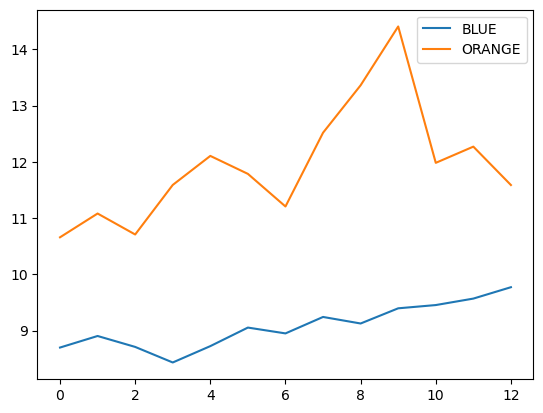

In [1183]:
prices.plot()

In [1184]:
returns=prices.pct_change()
returns.dropna()

BLUE    ORANGE
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

<AxesSubplot:>

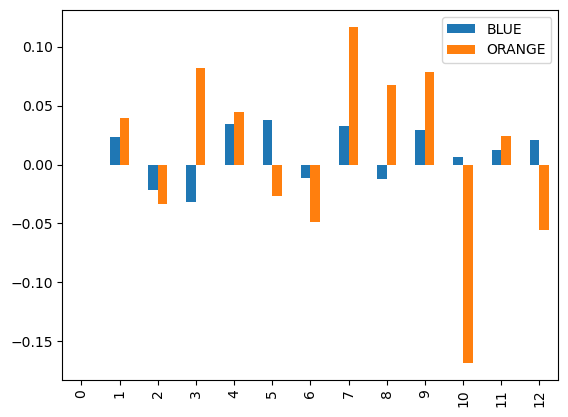

In [1185]:
returns.plot.bar()

### 1.c Mesure de risques

<font color="orange">La **variance** est une mesure de la dispersion des résultats possibles autour de l'espérance mathématique d'une variable aléatoire.</font>

<font color="orange">Le **risque d’un portefeuille**  peut être défini comme la **variabilité des rendements ou la chance de perdre** une partie de son investissement. Pour mesurer le risque d’un P on peut utiliser la  **volatilité** qui mesure la dispersion **des rendements d'un actif** calculé à partir de **l’écart type empirique**. Plus la dispersion autour de la moyenne est grande, plus le risque est élevé.</font>


La variance est la moyenne des carrés des écarts par rapport à la moyenne arithmétique des rendements :
$$
\sigma_R^2 = \frac{1}{N} \sum_{i=1}^{N} \left( R_i - \overline{R} \right)^2
$$
où $N$ est le nombre d'observations, $R_i$ est le rendement de l'observation $i$, et $\overline{R}$ est la moyenne arithmétique des rendements.

L'écart-type est la racine carrée de la variance :
$$
\sigma_R = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (R_i - \overline{R})^2}
$$

avec $$\overline{R} = \frac{1}{N} \sum_{i=1}^{N} R_i$$

Formule de l'écart-type empirique qui est une estimation de l'écart-type d'une population à partir d'un échantillon de données:

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})^2}
$$

où $n$ est la taille de l'échantillon, $x_i$ est la $i$-ème observation de l'échantillon, et $\overline{x}$ est l'espérance empirique (moyenne) de l'échantillon.

La volatilité est une mesure de la dispersion des rendements d'un actif financier,  mesurée par l'écart-type des rendements :

$$
\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (R_i - \overline{R})^2}
$$






In [1186]:
prices=pd.read_csv('data/sample_prices.csv')
returns=prices.pct_change().dropna()
returns

BLUE    ORANGE
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

In [1187]:
len(returns)

12

In [1188]:
returns.sum()/len(returns)

BLUE      0.01
ORANGE    0.01
dtype: float64

In [1189]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [1190]:
variance=((returns-returns.mean())**2).sum()/len(returns)
variance

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [1191]:
variance=((returns-returns.mean())**2).mean()
variance

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [1192]:
np.sqrt(variance)

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [1193]:
variance=((returns-returns.mean())**2).sum()/(len(returns)-1)
volatilite=np.sqrt(variance)
volatilite

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [1194]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

La volatilité annuelle est calculée à partir de la volatilité par période:

$$
\sigma_{ann} = \sigma_p \sqrt{p}
$$

où $p$ est le nombre de périodes dans une année (ici 12 pour des données mensuelles), $\sigma_p$ est la volatilité par période et $\sigma_{ann}$ est la volatilité annuelle.


In [1195]:
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [1196]:
returns=pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)
returns.head()

<= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
192607   NaN  -0.43    1.52   2.68  -0.57   0.59   1.60   1.47   3.33  -1.45   
192608   NaN   3.90    3.04   2.09   3.84   3.59   3.71   1.61   2.33   5.12   
192609   NaN  -1.08   -0.54   0.16  -0.48  -1.40   0.00  -0.50  -0.09   0.93   
192610   NaN  -3.32   -3.52  -3.06  -3.29  -4.10  -2.89  -3.36  -2.95  -4.84   
192611   NaN  -0.46    3.82   3.09  -0.55   2.18   3.41   3.39   3.16  -0.78   

        Dec 2  Dec 3  Dec 4  Dec 5  Dec 6  Dec 7  Dec 8  Dec 9  Hi 10  
192607   0.29  -0.15   1.33   1.24   1.98   1.55   1.38   3.38   3.29  
192608   2.59   4.03   3.15   2.72   4.72   1.60   1.63   0.98   3.70  
192609  -1.87  -2.27  -0.53   0.07  -0.07  -1.64   0.64  -0.86   0.67  
192610  -1.77  -3.36  -4.83  -2.98  -2.80  -3.45  -3.27  -3.47  -2.43  
192611  -0.32  -0.29   4.65   3.24   3.57   3.82   2.95   3.61   2.70

In [1197]:
columns=["Lo 10",'Hi 10']

returns=returns[columns]
returns.head()

Lo 10  Hi 10
192607  -1.45   3.29
192608   5.12   3.70
192609   0.93   0.67
192610  -4.84  -2.43
192611  -0.78   2.70

In [1198]:
returns.shape

(1110, 2)

In [1199]:
returns=returns/100
returns.columns=['SmallCap','LargeCap']
returns.head()

SmallCap  LargeCap
192607   -0.0145    0.0329
192608    0.0512    0.0370
192609    0.0093    0.0067
192610   -0.0484   -0.0243
192611   -0.0078    0.0270

<AxesSubplot:>

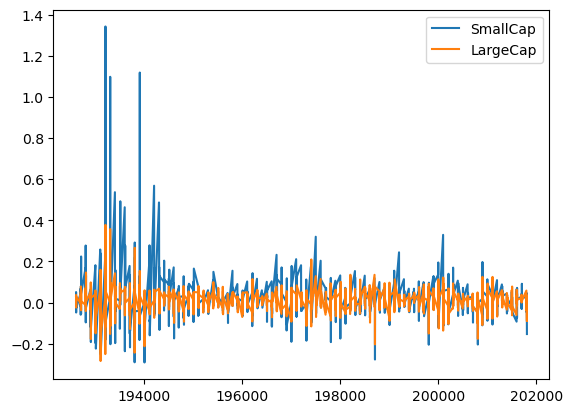

In [1200]:
returns.plot.line()

In [1201]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [1202]:
volatilite_ann=returns.std()*np.sqrt(12)
volatilite_ann

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

on place un capital initial $P$ investi pendant $t$ années avec $m$ compositions annuelles avec  $r$ est le taux d'intérêt annuel: $A = P \left( 1 + \frac{r}{m} \right)^{mt}$ $A$ représente le montant total après $t$ années, avec $m$ compositions annuelles, pour un investissement initial de $P$


$\text{Rendements composés} \quad R_{t,t+2} = (1 + R_{t,t+1})(1 + R_{t+1,t+2}) - 1$

In [1203]:
n_months=returns.shape[0]
return_per_month=(returns+1).prod()**(1/n_months)-1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

$$ R_{new} = (1 + R_{old})^{\frac{n_{new}}{n_{old}}} - 1 $$

Conversion de 3 mois en années : rendement de 2,5% sur une période de 3 mois et que nous voulons le convertir en un rendement annuel équivalent.

$$
\begin{aligned}
R_{new} &= (1 + 0.025)^{\frac{12}{3}} - 1 \\
&= (1.025)^4 - 1 \\
&= 0.0686 = 6.86\%
\end{aligned}
$$

Ainsi, un rendement de 2,5% sur une période de 3 mois équivaut à un rendement annuel de 6,86%.

Conversion de rendements mensuels en années :

$$ R_{annuel} = (1 + R_{mensuel})^{m} - 1 $$

Pour un rendement mensuel de 1\% avec une composition annuelle de 12 (pour des mois) nous avons :

$$ R_{annuel} = (1 + 0.01)^{12} - 1 = 0.1268 = 12.68\% $$

Ainsi, un rendement mensuel de 1\% équivaut à un rendement annuel de 12.68\%.




In [1204]:
annualized_return=(return_per_month+1)**12-1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [1205]:
annualized_return/volatilite_ann

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

<font color="orange">Le ratio de Sharpe mesure le rendement excédentaire d'un portefeuille par unité de risque, où le risque est mesuré par la volatilité. Plus le ratio de Sharpe est élevé, plus le portefeuille est considéré comme performant. Prend uniquement en compte le risque lié à la volatilité d'autres risques tels que le risque de crédit ou le risque de liquidité</font>

$\text{Sharpe Ratio}(P) = \frac{R_P - R_f}{\sigma_p}$

où $R_P$ est le rendement du portefeuille $P$, $R_f$ est le taux sans risque, et $\sigma_p$ est la volatilité du portefeuille $P$.




In [1206]:
riskfree_rate=0.03
sharpe_ratio=(annualized_return-riskfree_rate)/volatilite_ann
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

## 1.d Mesure du max drawdown

<font color="orange">Le Max Drawdown est la perte théorique maximale depuis le plus haut précédent jusqu'au plus bas suivant : le pire retour possible que l'on pourrait constater si on avait acheté au plus haut et vendu au plus bas.</font>


In [1207]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

<= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
192607   NaN  -0.43    1.52   2.68  -0.57   0.59   1.60   1.47   3.33  -1.45   
192608   NaN   3.90    3.04   2.09   3.84   3.59   3.71   1.61   2.33   5.12   
192609   NaN  -1.08   -0.54   0.16  -0.48  -1.40   0.00  -0.50  -0.09   0.93   
192610   NaN  -3.32   -3.52  -3.06  -3.29  -4.10  -2.89  -3.36  -2.95  -4.84   
192611   NaN  -0.46    3.82   3.09  -0.55   2.18   3.41   3.39   3.16  -0.78   

        Dec 2  Dec 3  Dec 4  Dec 5  Dec 6  Dec 7  Dec 8  Dec 9  Hi 10  
192607   0.29  -0.15   1.33   1.24   1.98   1.55   1.38   3.38   3.29  
192608   2.59   4.03   3.15   2.72   4.72   1.60   1.63   0.98   3.70  
192609  -1.87  -2.27  -0.53   0.07  -0.07  -1.64   0.64  -0.86   0.67  
192610  -1.77  -3.36  -4.83  -2.98  -2.80  -3.45  -3.27  -3.47  -2.43  
192611  -0.32  -0.29   4.65   3.24   3.57   3.82   2.95   3.61   2.70

In [1208]:
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets=rets/100
rets.head()

SmallCap  LargeCap
192607   -0.0145    0.0329
192608    0.0512    0.0370
192609    0.0093    0.0067
192610   -0.0484   -0.0243
192611   -0.0078    0.0270

In [1209]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [1210]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

SmallCap  LargeCap
1926-07-01   -0.0145    0.0329
1926-08-01    0.0512    0.0370
1926-09-01    0.0093    0.0067
1926-10-01   -0.0484   -0.0243
1926-11-01   -0.0078    0.0270

In [1211]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [1212]:
rets.index=rets.index.to_period('M')
rets.head()

SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270

In [1213]:
rets["1975"]

SmallCap  LargeCap
1975-01    0.3202    0.1286
1975-02    0.0657    0.0613
1975-03    0.0989    0.0414
1975-04    0.0288    0.0531
1975-05    0.0811    0.0610
1975-06    0.0779    0.0524
1975-07    0.0218   -0.0703
1975-08   -0.0525   -0.0177
1975-09   -0.0351   -0.0468
1975-10   -0.0009    0.0620
1975-11    0.0129    0.0323
1975-12   -0.0042   -0.0159

In [1214]:
wealth_index=1000*(1+rets["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

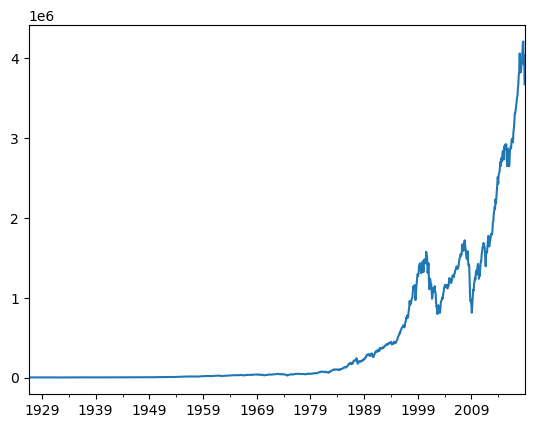

In [1215]:
wealth_index.plot.line()

In [1216]:
pic=wealth_index.cummax()
pic.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1078.293786
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

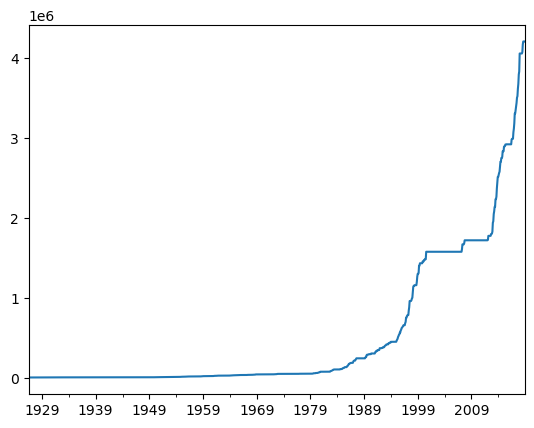

In [1217]:
pic.plot.line()

<AxesSubplot:>

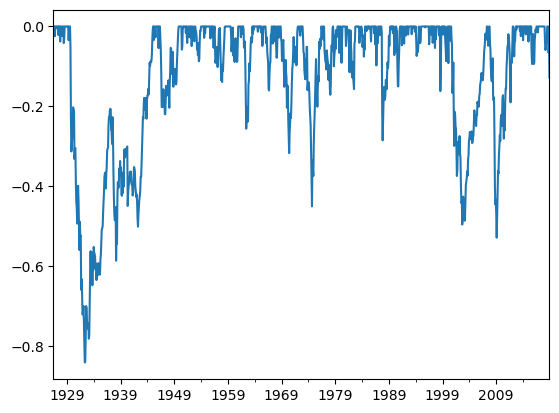

In [1218]:
drawdowns=(wealth_index-pic)/pic
drawdowns.plot.line()

In [1219]:
drawdowns.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [1220]:
drawdowns.min()

-0.8400375277943123

In [1221]:
drawdowns.idxmin()

Period('1932-05', 'M')

In [1222]:
drawdowns["1975":].idxmin()

Period('2009-02', 'M')

In [1223]:
def drawdown(returns_series: pd.Series):
    wealth_index=1000*(1+returns_series).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdowns=(wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdowns": drawdowns
    })

In [1224]:
drawdown(rets["LargeCap"]).head()

Wealth        Peaks  Drawdowns
1926-07  1032.900000  1032.900000     0.0000
1926-08  1071.117300  1071.117300     0.0000
1926-09  1078.293786  1078.293786     0.0000
1926-10  1052.091247  1078.293786    -0.0243
1926-11  1080.497711  1080.497711     0.0000

In [1225]:
drawdown(rets["LargeCap"])[["Wealth","Peaks"]].head()

Wealth        Peaks
1926-07  1032.900000  1032.900000
1926-08  1071.117300  1071.117300
1926-09  1078.293786  1078.293786
1926-10  1052.091247  1078.293786
1926-11  1080.497711  1080.497711

<AxesSubplot:>

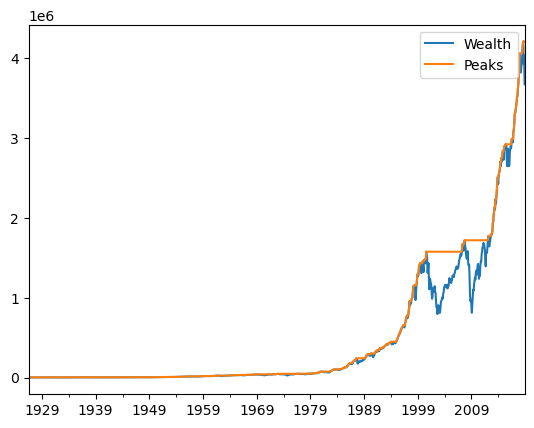

In [1226]:
drawdown(rets["LargeCap"])[["Wealth","Peaks"]].plot()

<AxesSubplot:>

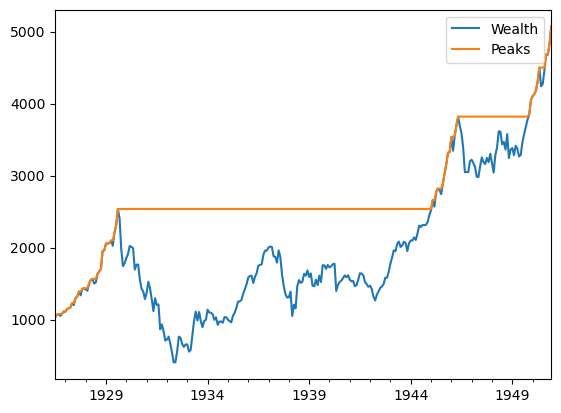

In [1227]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth","Peaks"]].plot()

In [1228]:
drawdown(rets[:"1950"]["LargeCap"])["Drawdowns"].min()

-0.8400375277943123

In [1229]:
drawdown(rets[:"1950"]["LargeCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

In [1230]:
drawdown(rets[:"1950"]["SmallCap"])["Drawdowns"].min()

-0.8330007793945303

In [1231]:
drawdown(rets[:"1950"]["SmallCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

In [1232]:

import functions as erk

drawdown(rets[:"1950"]["SmallCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

## 2 estimations des risques extrêmes


### 2.a Deviations from normality


<font color="orange">Analyser la distribution des rendements permet d’estimer les risques associés à chaque investissement ou encore à identifier les opportunités d'investissement potentielles.</font>

<font color="orange">Le skewness permet de mesurer l'asymétrie de la distribution des rendements d'un actif. Une skewness négative signifie alors que l’on obtient plus de rendements négatifs que ce à quoi on s’attendait si les rendements étaient distribués comme une distribution normale. Si la moyenne est supérieure à la médiane cela peut indiquer qu'il y a une petite proportion de rendements extrêmement élevés qui tirent la moyenne vers le haut. C'est un signe d'opportunité d'investissement, mais un risque plus élevé associé à l'investissement.</font>

La formule pour calculer la skewness est la suivante :

$$ S(R) = \frac{E[(R - E(R))^3]}{[\text{Var}(R)]^{3/2} }=\frac{E[(R - E(R))^3]}{ \sigma_R^3}  $$

où $E(R)$ est l'espérance de $R$, $Var(R)$ est la variance de $R$ et $\sigma_R$ est l'écart type de $R$.

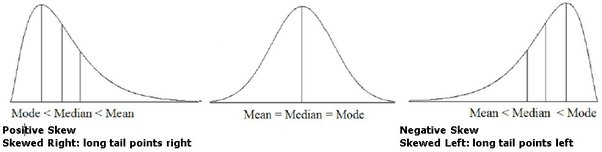

In [1233]:
from IPython.display import display, Image
jpeg_file = 'main-qimg-94a2e0699586f9f1d7a3a000bed0545f-lq.jpeg'
display(Image(filename=jpeg_file))

In [1234]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def get_hfi_returns():
    hfi = pd.read_csv("data/edhec-hedgefundindices.csv",header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period('M')
    return hfi

In [1235]:
hfi = erk.get_hfi_returns()
hfi.head()

Convertible Arbitrage  CTA Global  Distressed Securities  \
date                                                                
1997-01                 0.0119      0.0393                 0.0178   
1997-02                 0.0123      0.0298                 0.0122   
1997-03                 0.0078     -0.0021                -0.0012   
1997-04                 0.0086     -0.0170                 0.0030   
1997-05                 0.0156     -0.0015                 0.0233   

         Emerging Markets  Equity Market Neutral  Event Driven  \
date                                                             
1997-01            0.0791                 0.0189        0.0213   
1997-02            0.0525                 0.0101        0.0084   
1997-03           -0.0120                 0.0016       -0.0023   
1997-04            0.0119                 0.0119       -0.0005   
1997-05            0.0315                 0.0189        0.0346   

         Fixed Income Arbitrage  Global Macro  Long/Short Equity  \
date                                                               
1997-01                  0.0191        0.0573             0.0281   
1997-02                  0.0122        0.0175            -0.0006   
1997-03                  0.0109       -0.0119            -0.0084   
1997-04                  0.0130        0.0172             0.0084   
1997-05                  0.0118        0.0108             0.0394   

         Merger Arbitrage  Relative Value  Short Selling  Funds Of Funds  
date                                                                      
1997-01            0.0150          0.0180        -0.0166          0.0317  
1997-02            0.0034          0.0118         0.0426          0.0106  
1997-03            0.0060          0.0010         0.0778         -0.0077  
1997-04           -0.0001          0.0122        -0.0129          0.0009  
1997-05            0.0197          0.0173        -0.0737          0.0275

In [1236]:
hfi.shape

(263, 13)

In [1237]:
# negative si mean < mediane, positive si mediane si mean > mediane
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis=1)

0       1      2
Convertible Arbitrage   0.005508  0.0065  False
CTA Global              0.004074  0.0014   True
Distressed Securities   0.006946  0.0089  False
Emerging Markets        0.006253  0.0096  False
Equity Market Neutral   0.004498  0.0051  False
Event Driven            0.006344  0.0084  False
Fixed Income Arbitrage  0.004365  0.0055  False
Global Macro            0.005403  0.0038   True
Long/Short Equity       0.006331  0.0079  False
Merger Arbitrage        0.005356  0.0060  False
Relative Value          0.005792  0.0067  False
Short Selling          -0.001701 -0.0053   True
Funds Of Funds          0.004262  0.0052  False

In [1238]:
def skewness(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3
# skewness-> std de la population(/N-1) et non celle de l'échantillon (/N-1)=> ddof=0 car population

In [1239]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [1240]:
import scipy.stats
sorted(scipy.stats.skew(hfi))

[-3.940320291190085,
 -2.6395922251089274,
 -2.1244353839421204,
 -1.8154697489380174,
 -1.4091535635547947,
 -1.3200833333543787,
 -1.3008420437912207,
 -1.1670674947992332,
 -0.39022677418839474,
 -0.36178308368373274,
 0.1736986449903901,
 0.7679748443026674,
 0.9829218839470764]

La kurtosis mesure l'épaisseur des queues de la distribution. La distribution normale a une kurtosis de 3, donc si la kurtosis des rendements est inférieure à 3, cela indique que les queues sont moins épaisses que celles de la distribution normale. En revanche, si la kurtosis est supérieure à 3, cela signifie que les queues sont plus épaisses que celles de la distribution normale.

La kurtosis est donnée par :

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

Si la kurtosis est supérieure à 3 (appelée "leptokurtique"), cela indique que la distribution des rendements aura une forme plus pointue que la distribution normale, avec des queues plus épaisses. Cela signifie qu'il y aura une probabilité plus élevée de valeurs extrêmes (positives et négatives) que ce qui est prévu dans une distribution normale, en effet la concentration près de la moyenne peut conduire à des valeurs extrêmes plus fréquentes dans les deux sens (valeurs très positives ou très négatives), ce qui peut rendre les rendements plus risqués.

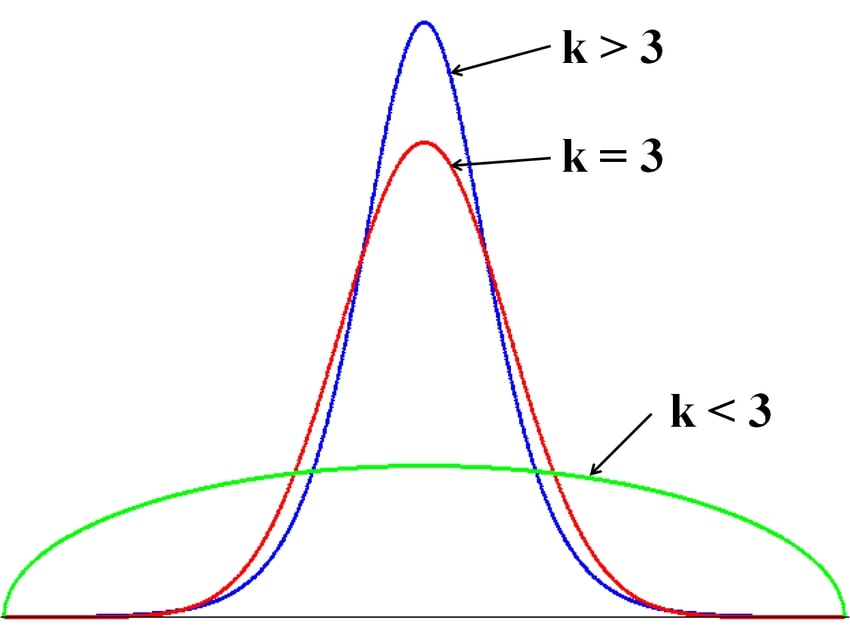

In [1241]:
from IPython.display import display, Image
jpeg_file = 'Illustration-of-the-skewness-and-the-kurtosis.jpg'
display(Image(filename=jpeg_file, width=500, height=300))

In [1242]:
def kurtosis(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

erk.kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [1243]:
sorted(scipy.stats.kurtosis(hfi))# différence de 3 -> retourne l'excès de kurtosis

[-0.047039631253480874,
 1.5238925822154128,
 2.74167944700001,
 3.1177717509697196,
 4.070152775555832,
 4.889983357716659,
 5.0358281663168345,
 5.738949791812582,
 6.250788406118144,
 9.121207865164642,
 14.21855525912839,
 20.280834455861278,
 26.842199278359704]

Le test de Jarque-Bera permet de déterminer si une distribution est normale ou non. $n$ est la taille de l'échantillon, $S$ est la skewness et $K$ est la kurtosis de l'échantillon. Si la p-value obtenue à partir du test de Jarque-Bera est inférieure à un certain niveau de signification (généralement 0,05 ou 0,01), nous rejetons l'hypothèse nulle et concluons que la distribution n'est pas normale.

$$JB = \frac{n}{6} \Bigg[\bigg(\frac{S^2}{2}+\frac{(K-3)^2}{4}\bigg)\Bigg]$$


In [1244]:
normal_rets = np.random.normal(0, 0.15, (263, 1))
normal_rets.mean(), normal_rets.std()

(-0.016308199629405332, 0.14930698327250333)

In [1245]:
scipy.stats.jarque_bera(normal_rets)
#>0.01=> distrbué normalement pour un intervalle de confiance de 1%

Jarque_beraResult(statistic=3.235493531044545, pvalue=0.1983451140053607)

In [1246]:
scipy.stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

In [1247]:
def is_normal(r, level=0.01):
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level

is_normal(normal_rets)

True

In [1248]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [1249]:
def get_ffme_returns():
    me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
    rets = me_m[['Lo 10', 'Hi 10']]
    rets.columns = ['SmallCap', 'LargeCap']
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets

In [1250]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [1251]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [1252]:
erk.is_normal(ffme)

SmallCap    False
LargeCap    False
dtype: bool

### 2.b Mesures de risques

<font color="orange">Les mesures de risque en gestion d'actifs permettent d'évaluer la probabilité de pertes financières d'un portefeuille d'actifs.</font>

<font color="orange">La semi-deviation permet de mesurer la volatilité des rendements "négatifs" et de quantifier le risque associé aux pertes potentielles. Plus la valeur de la semi-déviation est élevée, plus les rendements négatifs sont volatiles, plus le risque de pertes importantes est élevé. Pour le calcul de l’écart type on prend les rendements inférieurs à la moyenne ou inférieurs à 0.</font>

La <font color="red">semi-déviation</font> est la volatilité du sous-échantillon de rendements inférieurs à la moyenne ou inférieurs à zéro.

$$\sigma_{semi} = \sqrt{\frac{1}{N} \sum_{R_t\leq\bar{R}}^{N} \left(R_t -\bar{R}\right)^2}$$

où $N$ est le nombre de rendements qui sont inférieurs à la moyenne, $R_t$ est le rendement à la période $t$ et $ \bar{R}$ est le rendement moyen.


In [1253]:
def semideviation(r):
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [1254]:
hfi = erk.get_hfi_returns()
hfi.head()

Convertible Arbitrage  CTA Global  Distressed Securities  \
date                                                                
1997-01                 0.0119      0.0393                 0.0178   
1997-02                 0.0123      0.0298                 0.0122   
1997-03                 0.0078     -0.0021                -0.0012   
1997-04                 0.0086     -0.0170                 0.0030   
1997-05                 0.0156     -0.0015                 0.0233   

         Emerging Markets  Equity Market Neutral  Event Driven  \
date                                                             
1997-01            0.0791                 0.0189        0.0213   
1997-02            0.0525                 0.0101        0.0084   
1997-03           -0.0120                 0.0016       -0.0023   
1997-04            0.0119                 0.0119       -0.0005   
1997-05            0.0315                 0.0189        0.0346   

         Fixed Income Arbitrage  Global Macro  Long/Short Equity  \
date                                                               
1997-01                  0.0191        0.0573             0.0281   
1997-02                  0.0122        0.0175            -0.0006   
1997-03                  0.0109       -0.0119            -0.0084   
1997-04                  0.0130        0.0172             0.0084   
1997-05                  0.0118        0.0108             0.0394   

         Merger Arbitrage  Relative Value  Short Selling  Funds Of Funds  
date                                                                      
1997-01            0.0150          0.0180        -0.0166          0.0317  
1997-02            0.0034          0.0118         0.0426          0.0106  
1997-03            0.0060          0.0010         0.0778         -0.0077  
1997-04           -0.0001          0.0122        -0.0129          0.0009  
1997-05            0.0197          0.0173        -0.0737          0.0275

In [1255]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [1256]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [1257]:
erk.semideviation(hfi).sort_values()

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

<font color="orange">La VaR (Value at Risk) permet de quantifier le niveau de risque d'un P en estimant la perte maximale que le P peut subir avec un certain niveau de confiance, sur une période de temps donnée. </font>

La <font color="red">value at risk (VaR)</font> est un outil utile pour évaluer le risque financier dans un portefeuille d’actifs risqués, et elle est largement utilisée pour gérer le risque du portefeuille.

plusieurs façons de calculer la Var:
1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

 VaR est la perte maximale prévue qui ne sera pas dépassée avec une probabilité spécifiée sur un horizon de temps prédéterminé.

$$Prob\left(r_i \leq VaR\right) = \alpha$$

où $r_i$ est le rendement de l'actif $i$ et $\alpha$ est le niveau de confiance choisi.




<font color="red">La VaR historique</font><font color="orange"> utilise les données historiques des rendements d'un portefeuille pour estimer la perte maximale probable avec un certain niveau de confiance. VaR historique à un niveau de confiance de 95%, on prend le rendement correspond au 5ème percentile de la distribution des rendements (sépare les 5% plus bas rendements observés de la distribution des 95% restants). Ce rendement est considéré comme la perte maximale possible qui pourrait se produire avec une probabilité de 5% ou moins. Les avantages sont sa simplicité, sa transparence. Cependant, elle peut ne pas tenir compte des queues de distribution peut également être sensible à la période historique choisie, car les conditions de marché peuvent varier considérablement selon la période choisie.</font>


In [1258]:
def var_historic(r, level=5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [1259]:
import numpy as np
np.percentile(hfi, 5)

-0.0274

In [1260]:
erk.var_historic(hfi, level=1).sort_values(ascending=False)

Short Selling             0.113576
Emerging Markets          0.088466
Long/Short Equity         0.049558
CTA Global                0.049542
Event Driven              0.048612
Distressed Securities     0.046654
Fixed Income Arbitrage    0.041672
Funds Of Funds            0.039664
Convertible Arbitrage     0.031776
Relative Value            0.026660
Merger Arbitrage          0.025336
Global Macro              0.024316
Equity Market Neutral     0.018000
dtype: float64

In [1261]:
len(hfi["CTA Global"])*1/100#3 valeur

2.63

In [1262]:
r=hfi["CTA Global"].sort_values().values
r

array([-0.0568, -0.0543, -0.0532, -0.0473, -0.0445, -0.0438, -0.0376,
       -0.0362, -0.0354, -0.0354, -0.0343, -0.0339, -0.0333, -0.0317,
       -0.0316, -0.0314, -0.031 , -0.0296, -0.028 , -0.0278, -0.0273,
       -0.0272, -0.0261, -0.0257, -0.0253, -0.0248, -0.0241, -0.0239,
       -0.0232, -0.0225, -0.0224, -0.0222, -0.022 , -0.0216, -0.0208,
       -0.0204, -0.0202, -0.0201, -0.0194, -0.0192, -0.0186, -0.0184,
       -0.018 , -0.0176, -0.0175, -0.0171, -0.017 , -0.0167, -0.0164,
       -0.0164, -0.0157, -0.0153, -0.015 , -0.0147, -0.0147, -0.0146,
       -0.0144, -0.0142, -0.0141, -0.014 , -0.0139, -0.0138, -0.0137,
       -0.0131, -0.0124, -0.0122, -0.0119, -0.0119, -0.0118, -0.0114,
       -0.0104, -0.0104, -0.0102, -0.0099, -0.0098, -0.0092, -0.0091,
       -0.0089, -0.0084, -0.0082, -0.008 , -0.0078, -0.0077, -0.0076,
       -0.0074, -0.0072, -0.0066, -0.0065, -0.0065, -0.0063, -0.0058,
       -0.0057, -0.0057, -0.0056, -0.0055, -0.0054, -0.0054, -0.0053,
       -0.0053, -0.0

In [1263]:
pct1 = np.percentile(r, 1)
pct1

-0.049542

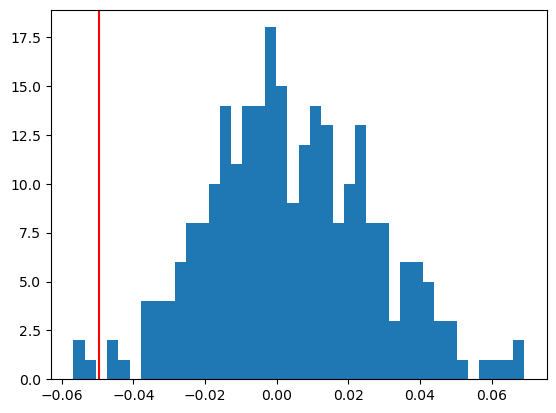

In [1264]:
import matplotlib.pyplot as plt
plt.hist(r, bins=40)
plt.axvline(x=pct1, color='r')

 <font color="red">CVaR</font>  est la moyenne des nombres qui sont tombés en dessous de la VaR

In [1265]:
def cvar_historic2(r, level=5):

    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        print(r[is_beyond])
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic2, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


In [1266]:
cvar_historic2(hfi["CTA Global"],1)


date
2001-11   -0.0543
2004-04   -0.0532
2018-02   -0.0568
Freq: M, Name: CTA Global, dtype: float64


0.054766666666666665

In [1267]:
erk.cvar_historic(hfi, level=1).sort_values()

Global Macro              0.029333
Equity Market Neutral     0.036100
Merger Arbitrage          0.036233
Relative Value            0.052367
CTA Global                0.054767
Funds Of Funds            0.061133
Long/Short Equity         0.061867
Distressed Securities     0.070967
Event Driven              0.071267
Fixed Income Arbitrage    0.072467
Convertible Arbitrage     0.086100
Short Selling             0.123867
Emerging Markets          0.141167
dtype: float64

 <font color="red">Parametric Gaussian VaR</font>  On suppose que les rendements sont normalements distribués, basé sur la volatilité du portefeuille, c'est-à-dire sur les volatilités et les corrélations des composants. On suppose une distribution gaussienne et on estime sa moyenne μ et sa volatilité σ.

$$Pr(R \leq \mu_p + z_{\alpha}\sigma_p) = \alpha$$

$z_{\alpha}$ est le quantile $\alpha$ unilatéral de la distribution normale standard du rendement, par exemple pour $Z_{\alpha}=-1.65$, la probabilité est d'environ $5\%$ de descendre en dessous de cette valeur $\alpha$. $$VaR_{\alpha} = -(\mu_p + z_{\alpha}\sigma_p)$$

Avantages: simplicité et peut être précise si les rendements du portefeuille suivent une distribution normal. En revanche peut être moins précise si ils ne suivent pas de distribution noramle</font>

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

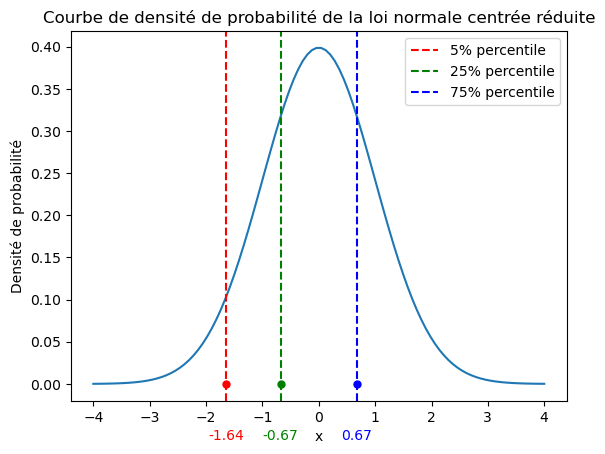

In [1268]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(-4, 4, num=100)
pdf = norm.pdf(x)

fig, ax = plt.subplots()
ax.plot(x, pdf)

ax.set_xlabel('x')
ax.set_ylabel('Densité de probabilité')
ax.set_title('Courbe de densité de probabilité de la loi normale centrée réduite')

pct_5 = norm.ppf(0.05)
pct_25 = norm.ppf(0.25)
pct_75 = norm.ppf(0.75)

ax.axvline(pct_5, color='r', linestyle='--', label='5% percentile')
ax.axvline(pct_25, color='g', linestyle='--', label='25% percentile')
ax.axvline(pct_75, color='b', linestyle='--', label='75% percentile')

ax.plot(pct_5, 0, marker='o', markersize=5, color='r')
ax.annotate(f'{pct_5:.2f}', xy=(pct_5, 0), xytext=(0, -40), textcoords='offset points', ha='center', color='r')

ax.plot(pct_25, 0, marker='o', markersize=5, color='g')
ax.annotate(f'{pct_25:.2f}', xy=(pct_25, 0), xytext=(0, -40), textcoords='offset points', ha='center', color='g')

ax.plot(pct_75, 0, marker='o', markersize=5, color='b')
ax.annotate(f'{pct_75:.2f}', xy=(pct_75, 0), xytext=(0, -40), textcoords='offset points', ha='center', color='b')


ax.legend()
plt.show()

In [1269]:
from scipy.stats import norm
norm.ppf(.05)

-1.6448536269514729

In [1270]:
from scipy.stats import norm
def var_gaussian(r, level=5):
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))

In [1271]:
erk.var_gaussian(hfi).sort_values(ascending=False)

Short Selling             0.080086
Emerging Markets          0.047164
CTA Global                0.034235
Long/Short Equity         0.026397
Convertible Arbitrage     0.021691
Funds Of Funds            0.021292
Event Driven              0.021144
Distressed Securities     0.021032
Global Macro              0.018766
Fixed Income Arbitrage    0.014579
Relative Value            0.013061
Merger Arbitrage          0.010435
Equity Market Neutral     0.008850
dtype: float64

<font color="red">Cornish-Fisher</font>, cadre non gaussien. Cornish-Fisher n'oblige pas à supposer une distribution de rendement particulière.

La formule pour le calcul de la quantile ajustée de Cornish-Fisher $z_{\tilde{\alpha}}$ est donnée par:

$$ z_{\tilde{\alpha}} = z_{\alpha} +\frac{1}{6}(z_{\alpha}^2-1)S + \frac{1}{24}(z_{\alpha}^3-3z_{\alpha})(K-3)-\frac{1}{36}(2z_{\alpha}^3-5z_{\alpha})S^2 $$
$$VaR_{mod(1-\alpha)} = -(\mu + z_{\tilde{\alpha}}\sigma)$$
où:

$z_{\tilde{\alpha}}$ : quantile $\tilde{\alpha}$ de la distribution non-gaussienne.
$z_{\alpha}$ : quantile $\alpha$ de la distribution gaussienne.
$S$ : obliquité (skewness)
$K-3$ : kurtosis excédentaire (excess kurtosis)

<font color="orange">Elle est plus flexible que la Parametric Gaussian car elle peut prendre en compte des distributions asymétriques et non normales. Elle est également plus précise que la VaR historique car elle utilise des informations sur les moments (S et K) de la distribution des rendements pour estimer la perte maximale probable.</font>


In [1272]:
def var_gaussian(r, level=5, modified=False):
    z = norm.ppf(level/100)
    if modified:
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )

    return -(r.mean() + z*r.std(ddof=0))

<AxesSubplot:title={'center':'Hedge Fund Indices: VaR at 5%'}>

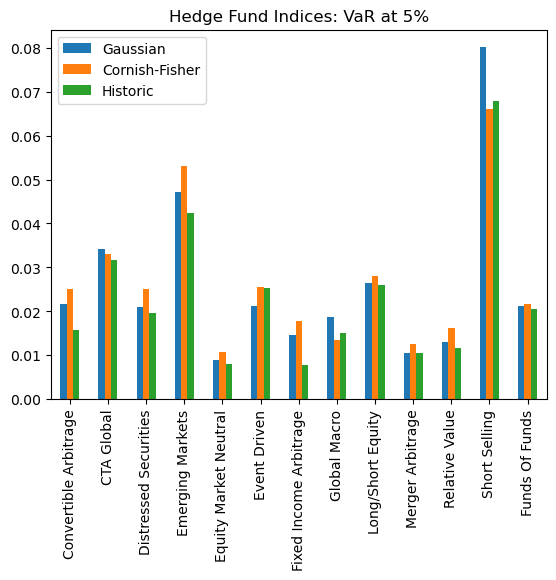

In [1273]:
var_table = [erk.var_gaussian(hfi),
             erk.var_gaussian(hfi, modified=True),
             erk.var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

## 3 Portfolio Optimisation et efficient frontier

### 3.a Ratio de sharpe

In [1274]:
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.head()

Food    Beer    Smoke   Games   Books   Hshld   Clths   Hlth   \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals   Fin     Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

In [1275]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [1276]:
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [1277]:
ind.shape

(1110, 30)

In [1278]:
#the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
def get_ind_returns():
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

In [1279]:
ind = erk.get_ind_returns()
ind.head()

Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals     Fin   Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

<AxesSubplot:>

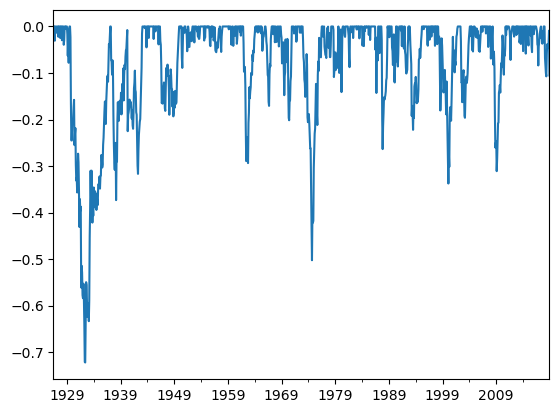

In [1280]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line()

In [1281]:
erk.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified=True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

<AxesSubplot:>

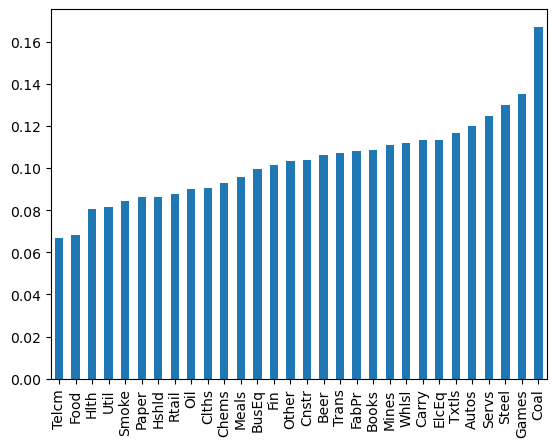

In [1282]:
erk.var_gaussian(ind).sort_values().plot.bar()

In [1283]:
def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]

    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)



$$\text{SharpeRatio(P)} = \frac{\text{Rp - Rf}}{\sigma_p}$$

où Rp est le rendement moyen du portefeuille P, Rf est le rendement de l'actif sans risque et σp est l'écart-type (volatilité) des rendements du portefeuille P.


In [1284]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    #r mensuel, rfr annuel
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1#rfr annuel->rfr mensuel
    excess_ret = r - rf_per_period#r mensuel
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)# r mensuel-> r annuel
    ann_vol = annualize_vol(r, periods_per_year)#
    return ann_ex_ret/ann_vol# annuel(r mensuel - rfr mensuel)/annuel(vol)

In [1285]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values(ascending=False)

Food     0.454770
Smoke    0.446361
Hlth     0.437783
Telcm    0.383294
Paper    0.364722
Rtail    0.364325
Beer     0.351780
Chems    0.344903
BusEq    0.342974
Meals    0.332717
Oil      0.330358
Hshld    0.307349
Util     0.306945
Clths    0.293105
ElcEq    0.293063
Carry    0.285916
Fin      0.282243
Servs    0.267263
FabPr    0.265297
Cnstr    0.229351
Autos    0.227548
Trans    0.214624
Txtls    0.194906
Games    0.194420
Books    0.192686
Mines    0.177109
Other    0.160862
Whlsl    0.143494
Steel    0.126052
Coal     0.084275
dtype: float64

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

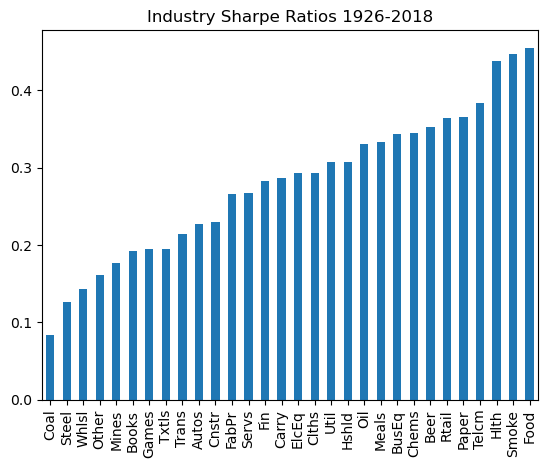

In [1286]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018")

<AxesSubplot:title={'center':'Industry Sharpe Ratios since 2000'}>

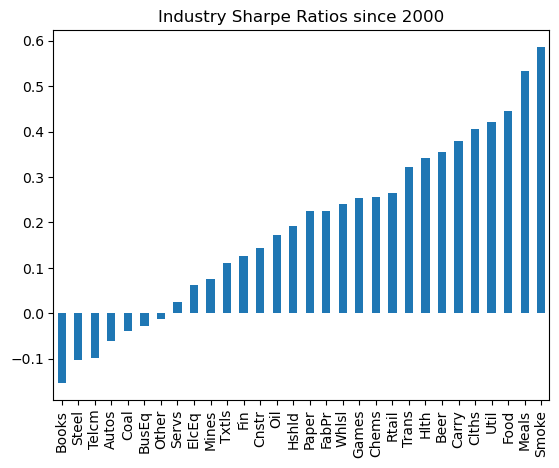

In [1287]:
erk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios since 2000')

### 3.b Efficient Portfolio without a risk-free asset

/
<font color="red">
La théorie de Markowitz</font> <font color="orange"> cherche à déterminer les portefeuilles optimums dans lesquels investir. L’objectif est de trouver l’ensemble des portefeuilles efficients c'est à dire ceux qui ont le plus grand E(r) pour chaque niveau de risque ou qui offrent le moins de risques pour chaque niveau de E(r). L’analyse de portefeuilles selon Markowitz requière plusieurs inputs comme le taux de rendement attendu, l’écart type des rendements et la corrélation entre chaque paire d’actifs candidat. On suppose ici que nous puissions estimer ces paramètres en regardant les données historiques et en supposant naïvement qu’ils se maintiendront à l’avenir.</font>

hypothèses :

- Chaque opportunité d'investissement est considérée par les investisseurs comme ayant une **distribution de probabilité** des rendements
- Les **estimations de risque** des investisseurs sont proportionnelles à la variabilité des rendements (mesurée par **l’écart-type ou la variance des rendements**).
- Les investisseurs sont prêts à fonder leurs décisions uniquement sur les **statistiques de rendement et de risque attendus**. Autrement dit, l’utilité des rendements pour les investisseurs U (r) = f [σ , E (r)]. Autrement dit, quel que soit le bonheur qu’un investisseur tire d’un investissement, il peut être complètement expliqué par σ et E (r).
- Pour un niveau de risque donné, les investisseurs préfèrent des rendements plus élevés à des rendements plus faibles, $\frac{\partial U(r)}{\partial E(r)} >0$. À l’inverse, pour un taux de rendement donné, les investisseurs préfèrent moins de risque plutôt que plus de risque. Symboliquement, $\frac{\partial U(r)}{\partial \sigma }  < 0$.

L’ensemble des portfeuilles efficients se trouvent sur la frontière efficiente qui est obtenu ici en combinant différents actifs risqués en faisant varier et trouver les bons poids des actifs dans le portefeuille pour ensuite ne sélectionner uniquement les portfeuilles qui ont le minimum de σ pour chaque E(r).

<AxesSubplot:>

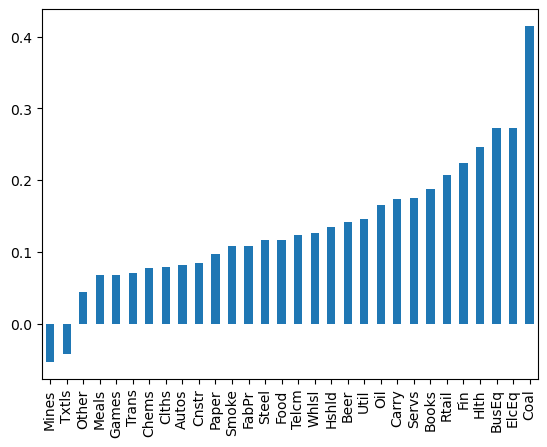

In [1288]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
er.sort_values().plot.bar()

$$\operatorname{Cov}(X,Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$
où $\bar{X}$ et $\bar{Y}$ sont les moyennes de X et Y respectivement, et n est le nombre d'observations.

$$\Sigma = \begin{bmatrix}
\operatorname{Var}(X_1) & \operatorname{Cov}(X_1, X_2) & \cdots & \operatorname{Cov}(X_1, X_n) \\
\operatorname{Cov}(X_2, X_1) & \operatorname{Var}(X_2) & \cdots & \operatorname{Cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\operatorname{Cov}(X_n, X_1) & \operatorname{Cov}(X_n, X_2) & \cdots & \operatorname{Var}(X_n) \\
\end{bmatrix}$$


In [1289]:
cov = ind["1996":"2000"].cov()
cov

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
Food   0.002609  0.002379  0.002061  0.000846  0.001035  0.001374  0.001733   
Beer   0.002379  0.005264  0.001359  0.001348  0.000865  0.002804  0.001704   
Smoke  0.002061  0.001359  0.008349  0.000379 -0.000128  0.001167  0.000950   
Games  0.000846  0.001348  0.000379  0.003773  0.001726  0.001206  0.002189   
Books  0.001035  0.000865 -0.000128  0.001726  0.002612  0.001025  0.002361   
Hshld  0.001374  0.002804  0.001167  0.001206  0.001025  0.003300  0.001320   
Clths  0.001733  0.001704  0.000950  0.002189  0.002361  0.001320  0.005655   
Hlth   0.001230  0.001955  0.001038  0.001433  0.000758  0.001473  0.000834   
Chems  0.001414  0.001460  0.000853  0.001775  0.001731  0.001413  0.002932   
Txtls  0.001216  0.002005  0.000779  0.001422  0.001459  0.001364  0.002472   
Cnstr  0.001487  0.002268  0.001446  0.002013  0.001753  0.002080  0.002937   
Steel  0.000070  0.000213  0.000322  0.003132  0.001992  0.001296  0.001895   
FabPr  0.000742  0.000769  0.000912  0.002848  0.001947  0.001343  0.002834   
ElcEq  0.001313  0.001236  0.000006  0.002386  0.002426  0.001675  0.002593   
Autos  0.000618  0.001520  0.000314  0.002371  0.001723  0.001760  0.002887   
Carry  0.001583  0.002015  0.001812  0.001874  0.001422  0.001975  0.003301   
Mines  0.000909  0.000278  0.001588  0.001777  0.001304  0.000687  0.002685   
Coal   0.000027  0.001728 -0.000733  0.001888  0.002426  0.002300  0.002792   
Oil    0.001079  0.000733  0.000984  0.001119  0.000988  0.000620  0.001924   
Util   0.000943  0.000643  0.001274  0.000036  0.000550  0.000373  0.000800   
Telcm  0.000667  0.001146  0.000062  0.001922  0.001918  0.001060  0.001436   
Servs  0.000237  0.000438 -0.000218  0.002848  0.002367  0.001310  0.001625   
BusEq -0.000315  0.000007 -0.000120  0.003434  0.001944  0.001102  0.000834   
Paper  0.001429  0.001710  0.001327  0.001852  0.001638  0.001873  0.003165   
Trans  0.001534  0.002284  0.000396  0.001578  0.001776  0.001582  0.002862   
Whlsl  0.000740  0.000697  0.001707  0.001966  0.001392  0.000683  0.001934   
Rtail  0.001363  0.001690  0.000105  0.001872  0.002223  0.001378  0.003013   
Meals  0.001230  0.001822  0.000703  0.001561  0.001189  0.001202  0.002721   
Fin    0.002132  0.002571  0.001312  0.002416  0.002261  0.001912  0.003210   
Other  0.001057  0.001383  0.001741  0.002382  0.001442  0.001580  0.002299   

           Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
Food   0.001230  0.001414  0.001216  ...  0.000667  0.000237 -0.000315   
Beer   0.001955  0.001460  0.002005  ...  0.001146  0.000438  0.000007   
Smoke  0.001038  0.000853  0.000779  ...  0.000062 -0.000218 -0.000120   
Games  0.001433  0.001775  0.001422  ...  0.001922  0.002848  0.003434   
Books  0.000758  0.001731  0.001459  ...  0.001918  0.002367  0.001944   
Hshld  0.001473  0.001413  0.001364  ...  0.001060  0.001310  0.001102   
Clths  0.000834  0.002932  0.002472  ...  0.001436  0.001625  0.000834   
Hlth   0.002565  0.000474  0.000608  ...  0.001204  0.001651  0.001535   
Chems  0.000474  0.003276  0.001868  ...  0.001004  0.001203  0.001031   
Txtls  0.000608  0.001868  0.003117  ...  0.000907  0.000666  0.000702   
Cnstr  0.001399  0.002088  0.001860  ...  0.001732  0.002543  0.002310   
Steel  0.001019  0.002588  0.001322  ...  0.002390  0.004607  0.005890   
FabPr  0.000896  0.002536  0.001691  ...  0.001708  0.003056  0.004275   
ElcEq  0.001260  0.001755  0.001222  ...  0.002429  0.004001  0.003618   
Autos  0.001019  0.002034  0.001982  ...  0.001856  0.002125  0.002668   
Carry  0.000784  0.002592  0.002035  ...  0.000945  0.001171  0.001393   
Mines  0.001223  0.002425  0.001291  ...  0.001683  0.002565  0.002536   
Coal   0.001902  0.002213  0.000732  ...  0.001118  0.003013  0.003240   
Oil    0.000597  0.002077  0.001274  ...  0.000488  0.001220  0.001158   
Util   0.000572  0.000673  0.000926  ...  0.000107 -0.000624 -0.001087   
Telcm  

Le rendement du portefeuille Rp est la somme pondérée wi des rendements Ri des actifs dans le portefeuille :

$$ R_p = \sum_{i=1}^k w_i R_i $$

L'expression matricielle du rendement du portefeuille est :

$$ R_p = w^T R $$

où R est le vecteur de dimension 1*k des rendements des actifs dans le portefeuille et w est le vecteur de dimension k*1 des poids.


In [1290]:
def portfolio_return(weights, returns):
    return weights.T @ returns

L'expression de la variance du portefeuille σ² est une généralisation de la formule que nous avons déjà vue dans le cas de deux actifs :

$$ \sigma_p^2 = \sum_{i=1}^k \sum_{j=1}^k w_i w_j \sigma_i \sigma_j \rho_{ij} $$

La covariance entre les actifs i et j est notée $$Cov(i,j)=σij = σi σj ρij$$.

La matrice de covariance Σ est une matrice carrée symétrique de dimension k*k,σij, la covariance entre i et j, qui est égale à σi σj ρij. Chaque élément diagonal de Σ est σii = σi σi ρii.

L'expression de la variance du portefeuille σ² est donnée par :

$$ \sigma_p^2 = w^T \Sigma w $$

où w est le vecteur de dimension k*1 des poids et Σ est la matrice de covariance de dimension k*k.

In [1291]:
def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5

In [1292]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [1293]:
cov.loc[l,l]

Food      Beer     Smoke      Coal
Food   0.002609  0.002379  0.002061  0.000027
Beer   0.002379  0.005264  0.001359  0.001728
Smoke  0.002061  0.001359  0.008349 -0.000733
Coal   0.000027  0.001728 -0.000733  0.018641

In [1294]:
ew = np.repeat(0.25, 4)
erk.portfolio_return(ew,er[l])

0.19511097196038385

In [1295]:
erk.portfolio_vol(ew, cov.loc[l,l])

0.055059195776437045

<font color="orange">Combinaison de 2 actifs A et B, dans le cas de 2 actifs:</font> $$w_b=1-w_a$$
\begin{equation*}
\sigma^2(w_A, w_B) = \sigma_A^2w_A^2 + \sigma_B^2w_B^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{A,B}
\end{equation*}

où :

$w_A$ : le poids de l'actif A
$w_B$ : le poids de l'actif B
$\sigma_A$ : la volatilité de l'actif A
$\sigma_B$ : la volatilité de l'actif B
$\rho_{A,B}$ : le coefficient de corrélation de A et B.

In [1296]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<font color="orange">Games et finance </font>

In [1297]:
l = ["Games", "Fin"]
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

In [1298]:
cov.loc[l,l]

Games       Fin
Games  0.003773  0.002416
Fin    0.002416  0.003982

In [1299]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef

R         V
0   0.223371  0.063100
1   0.215205  0.061845
2   0.207039  0.060699
3   0.198873  0.059666
4   0.190706  0.058753
5   0.182540  0.057965
6   0.174374  0.057308
7   0.166207  0.056786
8   0.158041  0.056403
9   0.149875  0.056161
10  0.141708  0.056063
11  0.133542  0.056110
12  0.125376  0.056300
13  0.117209  0.056633
14  0.109043  0.057106
15  0.100877  0.057715
16  0.092710  0.058457
17  0.084544  0.059326
18  0.076378  0.060316
19  0.068212  0.061423

<AxesSubplot:xlabel='V', ylabel='R'>

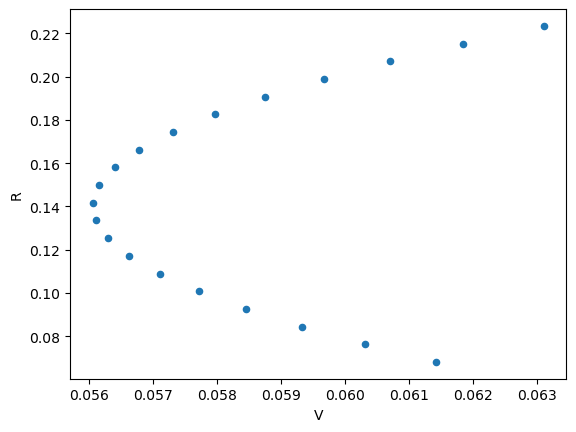

In [1300]:
ef.plot.scatter(x="V", y="R")

<AxesSubplot:xlabel='Volatility'>

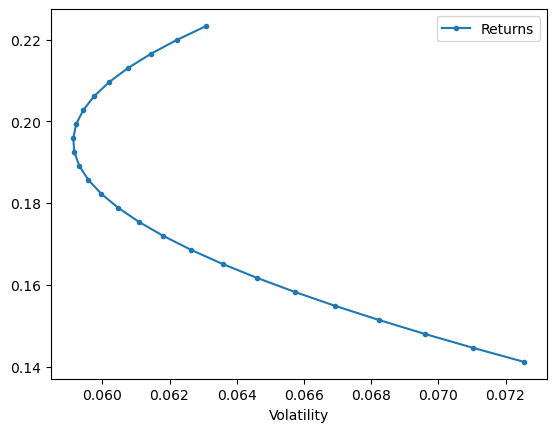

In [1301]:
def plot_ef2(n_points, er, cov):
    if er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l])

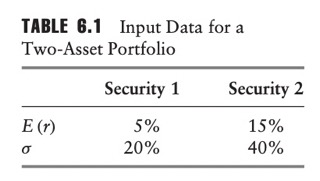

In [1302]:
jpeg_file = '1.jpeg'
display(Image(filename=jpeg_file))

<font color="orange">correlation =0</font>

In [1303]:

cov_p=[
    [(0.2)**2,0],
    [0,(0.4)**2]
]
cov_p = pd.DataFrame(cov_p, columns=['Actif 1', 'Actif 2'], index=['Actif 1', 'Actif 2'])
cov_p

Actif 1  Actif 2
Actif 1     0.04     0.00
Actif 2     0.00     0.16

In [1304]:
er[l].shape

(2,)

In [1305]:
e_p=np.array([0.05,0.15])
e_p.shape

(2,)

In [1306]:
weights = [
           np.array([1.2,-0.2]),
           np.array([1,0]),
           np.array([5/6,1/6]),
           np.array([4/5,1/5]),
           np.array([2/3,1/3]),
           np.array([1/2,1/2]),
           np.array([1/3,2/3]),
           np.array([1/6,5/6]),
           np.array([0,1]),
           np.array([-0.2,1.2]),]

rets = [portfolio_return(w, e_p) for w in weights]
vols = [portfolio_vol(w, cov_p) for w in weights]
rets=[rest*100 for rest in rets]
vols=[vol*100 for vol in vols]
rets

[3.0,
 5.0,
 6.666666666666667,
 7.000000000000001,
 8.333333333333332,
 10.0,
 11.666666666666666,
 13.333333333333334,
 15.0,
 17.0]

In [1307]:
vols

[25.298221281347033,
 20.0,
 17.950549357115015,
 17.888543819998322,
 18.85618083164127,
 22.360679774997898,
 27.487370837451074,
 33.499585403736305,
 40.0,
 48.16637831516918]

In [1308]:
df = pd.DataFrame({'w1': [w[0] for w in weights],
                   'w2': [w[1] for w in weights],
                   'Returns': rets,
                   'Volatility': vols},index=['A', 'B', 'C', 'D (MVP)', 'E', 'F', 'G', 'H', 'I', 'J'])

In [1309]:
df

w1        w2    Returns  Volatility
A        1.200000 -0.200000   3.000000   25.298221
B        1.000000  0.000000   5.000000   20.000000
C        0.833333  0.166667   6.666667   17.950549
D (MVP)  0.800000  0.200000   7.000000   17.888544
E        0.666667  0.333333   8.333333   18.856181
F        0.500000  0.500000  10.000000   22.360680
G        0.333333  0.666667  11.666667   27.487371
H        0.166667  0.833333  13.333333   33.499585
I        0.000000  1.000000  15.000000   40.000000
J       -0.200000  1.200000  17.000000   48.166378

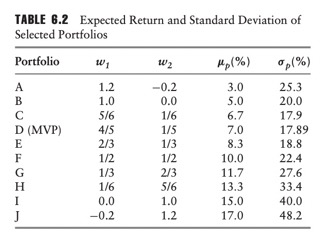

In [1310]:
jpeg_file = '2.jpeg'
display(Image(filename=jpeg_file))

Text(0.5, 1.0, 'Rendement en fonction de la volatilité')

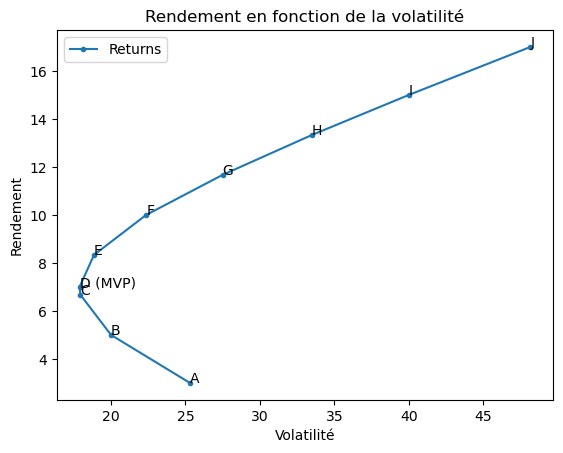

In [1311]:
df[["Volatility","Returns"]].plot.line(x="Volatility", y="Returns", style=".-")
import matplotlib.pyplot as plt
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df["Volatility"][i], df["Returns"][i]))
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.title('Rendement en fonction de la volatilité')

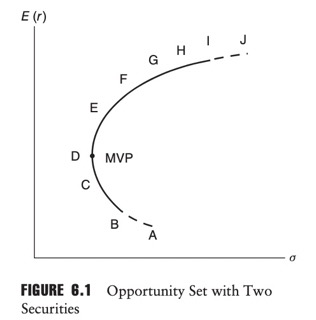

In [1312]:
jpeg_file = '3.jpeg'
display(Image(filename=jpeg_file))

<font color="orange">Diversification selon Markowitz repose sur l'idée que l’on peut réduire le risque global d'un portefeuille sans nécessairement sacrifier par combinaison d’actifs dont les rendements sont peu ou faiblement corrélés. Plus les corrélations des actifs d’un portefeuille sont faibles ⇒ moins le portefeuille sera risqué.</font>

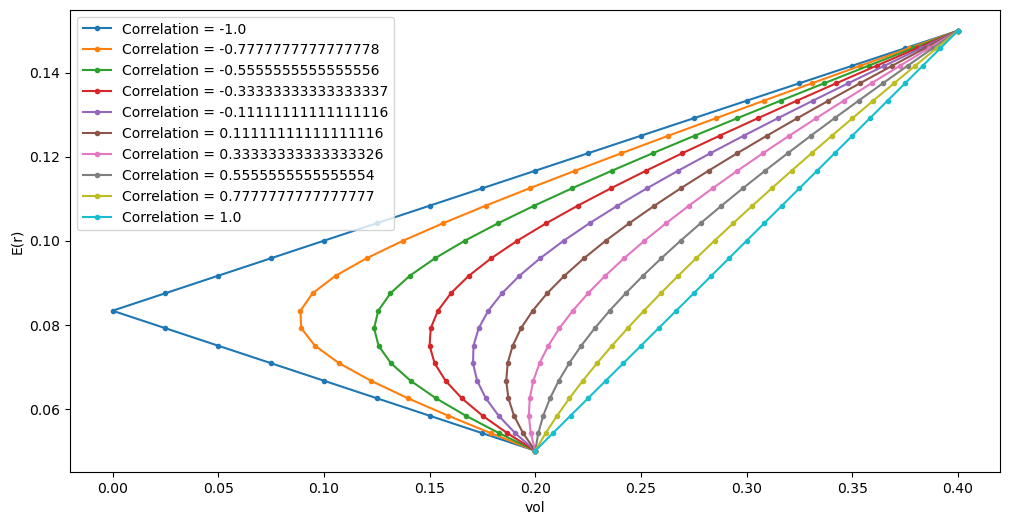

In [1313]:
def plot_efs(n_points, er, std1, std2, cor):
    cov = np.array([
        [std1**2, cor*std1*std2],
        [cor*std1*std2, std2**2]
    ])
    if er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")

    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]

    plt.plot(vols, rets, ".-", label=f"Correlation = {cor}")

    plt.ylabel("E(r)")
    plt.xlabel("vol")
    plt.legend(fontsize='small')
    plt.legend()

std1 = 0.2
std2 = 0.4
cors = np.linspace(-1, 1, 10)
fig, ax = plt.subplots(figsize=(12, 6))
for cor in cors:
    plot_efs(25, e_p, std1, std2, cor)


<font color="orange">En pratique pour trouver les poids optimaux qui minimisent la variance du portefeuille pour un rendement donné, on va minimiser la fonction cout qui mesure la variance du portefeuille en respectant les contraintes suivantes.</font>

<font color="orange">La **contrainte budgétaire** stipule que l'investisseur doit donc allouer **tout son capital à l'investissement**. Cela signifie que la somme des poids des différents actifs dans le portefeuille doit être égale à 1 **(∑ Wi = 1)**. C'est-à-dire que l'investisseur ne peut pas **dépenser plus que ce qu'il ne possède**. Mais elle ne signifie pas nécessairement que tous les actifs financiers doivent être inclus dans le portefeuille. Il peut conserver une partie de sa richesse sous forme de **liquidités**, c'est-à-dire en gardant de l'argent en **espèces ou en dépôt** sur un compte en banque, plutôt que de l'investir dans des actifs financiers.</font>

<font color="orange">$E^T w = E(r_p)$, permet de fixer le rendement espéré du portefeuille, où  $E(r_p)$ est le rendement espéré attendu du portefeuille. Cette contrainte permet de construire un portefeuille efficient qui a un rendement espéré souhaité pour un certain niveau de risque.
</font>

combinaisons avec n actifs:

objectif Minimiser $\frac{1}{2} w^T \Sigma w$  pour trouver les poretfeuilles efficients
$\text{sous contraintes } E^T w = E(r_p),  \ 1^T w = 1$
donc $E(r_p)-Ew^T=0,  \ 1-w^T1 =0$

 Les contraintes sont que le rendement du portefeuille $E(r_p)$ doit être atteint, et que la somme de tous les poids doit être égale à un.

$\text{Minimize } L =  \frac{1}{2} w^T \Sigma w+ \lambda(E(r_p) - w^T E) + \gamma(1 - w^T \mathbf{1}) \quad $

avec $\lambda$ et $\gamma$ multiplicateur lagrangien


$\frac{\partial L}{\partial w} = \Sigma w - \lambda E - \gamma\mathbf{1} = 0$\
$\frac{\partial L}{\partial \lambda} = E(r_p) - w^T E = 0$\
$\frac{\partial L}{\partial \gamma} = 1 - w^T \mathbf{1} = 0$

Les conditions de première ordre pour la solution de ce problème nécessitent que les dérivées partielles de L par rapport aux trois variables inconnues, w, λ et γ, soient égales à zéro.

$w = \lambda\Sigma^{-1}E + \gamma\Sigma^{-1}1$\
$E(r_p) = w^T E = E^T w = \lambda (E^T\Sigma^{-1}E) + \gamma (E^T\Sigma^{-1}1)$\
$1 = w^T  = {1}^T w = \lambda(1^T\Sigma^{-1}E)+ \gamma (1^T\Sigma^{-1}1)$

on obtient:
$$\lambda = \frac{CE(rp) - A}{D} \qquad \gamma = \frac{B - AE(rp)}{D}$$

où

$A = \mathbf{1}^T\Sigma^{-1}E \qquad C = \mathbf{1}^T\Sigma^{-1}1$

$B = E^T\Sigma^{-1}E \qquad D = BC - A^2$

$$w_p=\frac{CE(rp) - A}{D}\Sigma^{-1}E+\frac{B - AE(rp)}{D}\Sigma^{-1}1$$
$$= g+hE(r_p)$$


$$g = \frac{1}{D}(B\Sigma^{-1}1 - A\Sigma^{-1}E)$$
$$g = \frac{1}{D}(C\Sigma^{-1}E - A\Sigma^{-1}\mathbf{1})$$




In [1314]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()
er.head()

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
dtype: float64

In [1315]:
cov.head()

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
Food   0.002609  0.002379  0.002061  0.000846  0.001035  0.001374  0.001733   
Beer   0.002379  0.005264  0.001359  0.001348  0.000865  0.002804  0.001704   
Smoke  0.002061  0.001359  0.008349  0.000379 -0.000128  0.001167  0.000950   
Games  0.000846  0.001348  0.000379  0.003773  0.001726  0.001206  0.002189   
Books  0.001035  0.000865 -0.000128  0.001726  0.002612  0.001025  0.002361   

           Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
Food   0.001230  0.001414  0.001216  ...  0.000667  0.000237 -0.000315   
Beer   0.001955  0.001460  0.002005  ...  0.001146  0.000438  0.000007   
Smoke  0.001038  0.000853  0.000779  ...  0.000062 -0.000218 -0.000120   
Games  0.001433  0.001775  0.001422  ...  0.001922  0.002848  0.003434   
Books  0.000758  0.001731  0.001459  ...  0.001918  0.002367  0.001944   

          Paper     Trans     Whlsl     Rtail     Meals       Fin     Other  
Food   0.001429  0.001534  0.000740  0.001363  0.001230  0.002132  0.001057  
Beer   0.001710  0.002284  0.000697  0.001690  0.001822  0.002571  0.001383  
Smoke  0.001327  0.000396  0.001707  0.000105  0.000703  0.001312  0.001741  
Games  0.001852  0.001578  0.001966  0.001872  0.001561  0.002416  0.002382  
Books  0.001638  0.001776  0.001392  0.002223  0.001189  0.002261  0.001442  

[5 rows x 30 columns]

contraintes:
weights_sum_to_1: $1^T w-1=0$
return_is_target: $R_p-E^T w=0$

In [1316]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n

    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - erk.portfolio_return(weights,er)
    }
    weights = minimize(erk.portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',# cov necessaire pour calculer la vol
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x

<AxesSubplot:xlabel='Volatility'>

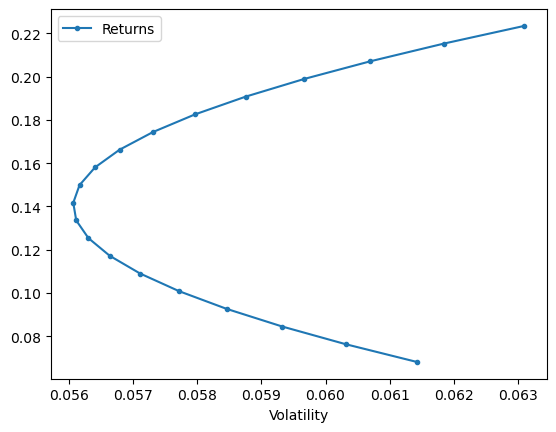

In [1317]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [1318]:
weights_15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol_15 = erk.portfolio_vol(weights_15, cov.loc[l,l])
vol_15

0.056163669406706564

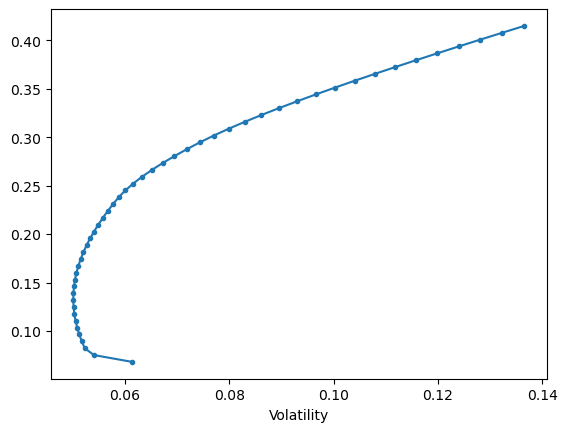

In [1319]:
def optimal_weights(n_points, er, cov):

    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):

    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style='.-')

l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(50, er[l], cov.loc[l,l])

<font color="orange">3 actifs: </font>

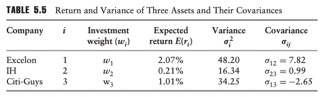

In [1320]:
from IPython.display import display, Image
jpeg_file = '5.jpeg'
display(Image(filename=jpeg_file))

In [1321]:
cov_p3=[
    [48.20,7.82,-2.65],
    [7.82,16.34,0.99],
    [-2.65,0.99,34.25]
]
cov_p3= pd.DataFrame(cov_p3, columns=['Excelon', 'IH','City-Guys'], index=['Excelon', 'IH','City-Guys'])
cov_p3

Excelon     IH  City-Guys
Excelon      48.20   7.82      -2.65
IH            7.82  16.34       0.99
City-Guys    -2.65   0.99      34.25

In [1322]:
e_p3=np.array([2.07,0.21,1.10])
e_p3=e_p3
e_p3

array([2.07, 0.21, 1.1 ])

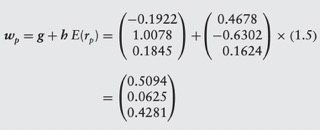

In [1323]:
from IPython.display import display, Image
jpeg_file = '7.jpeg'
display(Image(filename=jpeg_file))

In [1324]:
weights_p3=minimize_vol(1.5,e_p3,cov_p3)
weights_p3

array([0.48425326, 0.07834344, 0.43740331])

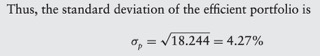

In [1325]:
from IPython.display import display, Image
jpeg_file = '8.jpeg'
display(Image(filename=jpeg_file))

In [1326]:
erk.portfolio_vol(weights_p3,cov_p3)

4.182654948348591

In [1327]:

def minimize_vol2(targen_return,er,cov):
    one=np.ones(er.shape[0])
    A=one.T.dot(np.linalg.inv(cov).dot(er))
    B=er.T.dot(np.linalg.inv(cov).dot(er))
    C=one.T.dot(np.linalg.inv(cov).dot(one))
    D=B*C-A*A
    g=(1/D)*(B*(np.linalg.inv(cov).dot(one))-A*(np.linalg.inv(cov).dot(er)))
    h=(1/D)*(C*(np.linalg.inv(cov).dot(er))-A*(np.linalg.inv(cov).dot(one)))
    weights=g+h*targen_return
    print(weights)
    std=np.sqrt(weights.T.dot(cov.dot(weights)))
    print(std)
    print()

minimize_vol2(1.5,e_p3,cov_p3)


[0.48425325 0.07834343 0.43740332]
4.18265494834799



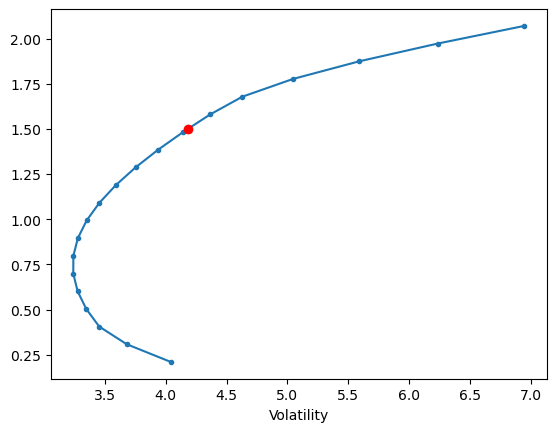

In [1328]:
def minimize_vol3(targen_return,er,cov):
    one=np.ones(er.shape[0])
    A=one.T.dot(np.linalg.inv(cov).dot(er))
    B=er.T.dot(np.linalg.inv(cov).dot(er))
    C=one.T.dot(np.linalg.inv(cov).dot(one))
    D=B*C-A*A
    g=(1/D)*(B*(np.linalg.inv(cov).dot(one))-A*(np.linalg.inv(cov).dot(er)))
    h=(1/D)*(C*(np.linalg.inv(cov).dot(er))-A*(np.linalg.inv(cov).dot(one)))
    weights=g+h*targen_return
    std=np.sqrt(weights.T.dot(cov.dot(weights)))
    return [std,targen_return]

std1,e1=minimize_vol3(1.5,e_p3,cov_p3)
erk.plot_ef(20,e_p3,cov_p3)
plt.plot(std1,e1, 'o',color="red")

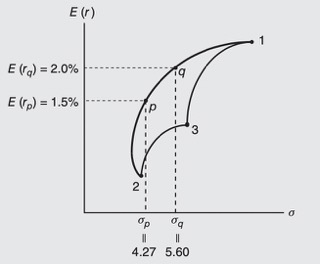

In [1329]:
from IPython.display import display, Image
jpeg_file = '9.jpeg'
display(Image(filename=jpeg_file))

## 3.c Efficient Portfolio with a risk-free asset

<font color="orange">On peut également inclure un actif sans risque, La présence d'un actif sans risque modifie la contrainte budgétaire car elle permet de prêter ou emprunter de l'argent à un taux sans risque, l’objectif est de trouver la combinaison optimale entre l'actif sans risque et les actifs risqués qui permet minimiser le risque pour un niveau de rendement donné. Cette méthode permet d’obtenir la CML qui représente la relation linéaire entre le rendement attendu et le risque des portefeuilles, obtenue en traçant une droite qui part de l'actif sans risque et qui est tangente à la frontière efficiente.</font>

Pour trouver les poids optimaux des portefeuilles efficients lorsque l'actif sans risque existe, nous formulons l'énoncé de l'objectif suivant :

$$Minimiser L = \frac{1}{2} w^T \Sigma w \ $$
avec$$   w^TE + w_f r_f = E(r_p)$$

où L représente une fonction objective lagrangienne, et$$ w_f = 1 - w^T \textbf{1}$$ est le poids pour l'actif sans risque.

la variance du portefeuille formé à partir de n + 1 actifs (n actifs risqués plus l'actif sans risque):

$$\sigma_p^2 = w^T \Sigma w + w_f \sigma_f^2 + 2 w_f w^T \sigma_{1f} = w^T \Sigma w $$

où $\sigma_f^2$ est la variance du taux de rendement sans risque qui est égal à zéro, et $\sigma_{1f}$ est le vecteur de covariance n-covariance entre n actifs risqués et l'actif sans risque qui est également égal à zéro.

$$Min L = \frac{1}{2} w^T \Sigma w + \lambda \left[E(r_p) - w^TE - (1 - w^T \textbf{1}) r_f \right]$$

où $\lambda$ est un multiplicateur lagrangien. Les conditions de premier ordre pour la solution de ce problème exigent que les dérivées partielles de L par rapport aux deux inconnues w et $\lambda$ soient mises à zéro. C'est-à-dire,

$$\frac{\partial L}{\partial w} = \Sigma w - \lambda(E - r_f \textbf{1}) = 0 $$
$$\frac{\partial L}{\partial \lambda} = E(r_p) - w^TE - (1 - w^T \textbf{1}) r_f = 0 $$

Parce que $\Sigma$ est une matrice de covariance définie positive, les conditions de premier ordre sont nécessaires et suffisantes pour un optimum global. À partir des équations nous avons:

$$w = \lambda \Sigma^{-1} (E- r_f \textbf{1}) $$
$$ E(r_p)= r_f + w^T (E - r_f \textbf{1}) $$\
$$ E(r_p)= r_f + \lambda (E- r_f \textbf{1})^T \Sigma^{-1} (E - r_f \textbf{1}) $$\
$$ \lambda= [E(r_p) - r_f ]/H $$
$$H=(E- r_f \textbf{1})^T \Sigma^{-1} (E - r_f \textbf{1})$$\
$$ w_p= \Sigma^{-1} (E- r_f \textbf{1})[E(r_p) - r_f /H]$$
$$ w_f=1-w_p^T\textbf{1}$$\

$$ w_p=u+vE(r_p)$$
$$u=-\Sigma^{-1}(R-r_f\textbf{1})(r_f/H)$$
$$v=\Sigma^{-1}(R-r_f\textbf{1})(1/H)$$

In [1330]:
cov_p3=[
    [48.20,7.82,-2.65],
    [7.82,16.34,0.99],
    [-2.65,0.99,34.25]
]
cov_p3= pd.DataFrame(cov_p3, columns=['Excelon', 'IH','City-Guys'], index=['Excelon', 'IH','City-Guys'])
cov_p3

Excelon     IH  City-Guys
Excelon      48.20   7.82      -2.65
IH            7.82  16.34       0.99
City-Guys    -2.65   0.99      34.25

In [1331]:
e_p3=np.array([2.07,0.21,1.10])
e_p3=e_p3
e_p3

array([2.07, 0.21, 1.1 ])

In [1332]:
def minimize4(target_return,er,cov,rfr):
    one=np.ones(er.shape[0])
    H=(er-rfr*one).T.dot(np.linalg.inv(cov).dot(er-rfr*one))
    u=-np.linalg.inv(cov).dot((er-rfr*one))*(rfr/H)
    v=np.linalg.inv(cov).dot((er-rfr*one))*(1/H)
    w_p=u+v*target_return
    w_f=1-w_p.dot(one)
    #weigts={
     #   'risky weights':w_p,
     #   'risk-free assets':w_f
    #}
    #w_p.append(w_f)
    #weights=np.append(w_p,w_f)
    weights=w_p
    return weights

weights=minimize4(1.5,e_p3,cov_p3,0.18)
print(weights)

[ 0.52451305 -0.2514552   0.36544999]


In [1333]:
std2=erk.portfolio_vol(weights,cov_p3)
std2

3.9505979062039223

en introduisant l'actif sans risque on peut espérer un rendement de 1.5% pour une variance de 3.9% au lieu de 4.18% avec uniquement des actifs risqués

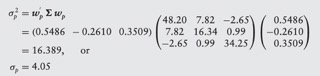

In [1334]:
from IPython.display import display, Image
jpeg_file = '10.jpeg'
display(Image(filename=jpeg_file))

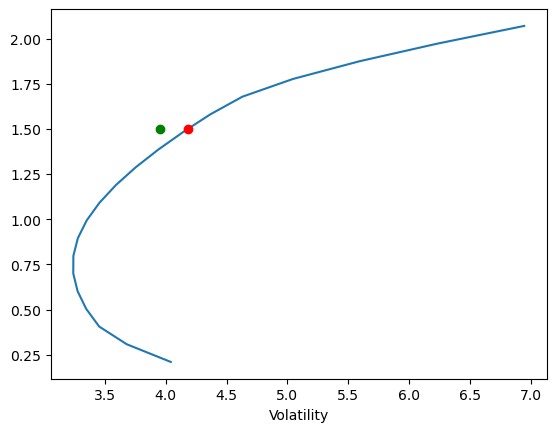

In [1335]:
erk.plot_ef(20, e_p3, cov_p3, style='-', riskfree_rate=0.18)
std1,e1=minimize_vol3(1.5,e_p3,cov_p3)
plt.plot(std1,e1, 'o',color="red")
plt.plot(std2,1.5, 'o',color="green")

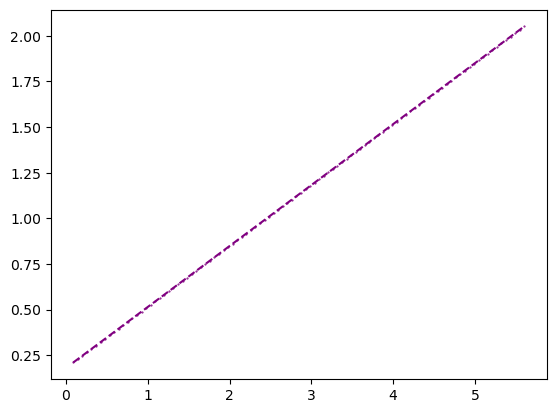

In [1336]:
def CML(er,cov,rfr):
    min = er.min()
    max = er.max()
    stds = []
    for e in np.arange(min, max, (max-min)/100):
        weights = minimize4(e, er, cov, rfr)
        std = erk.portfolio_vol(weights, cov)

        stds.append(std)
    plt.plot(stds, np.arange(min, max, (max-min)/100),color='purple', marker='o', linestyle='dashed',markersize=0.5)

CML(e_p3,cov_p3,0.18)


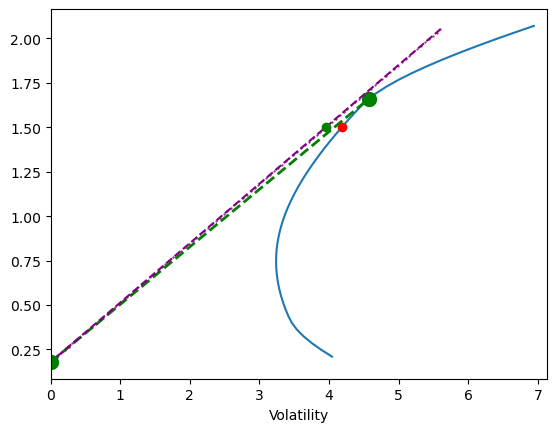

In [1337]:
erk.plot_ef(50, e_p3, cov_p3, style='-', riskfree_rate=0.18,show_cml=True)
CML(e_p3,cov_p3,0.18)
std1,e1=minimize_vol3(1.5,e_p3,cov_p3)
plt.plot(std1,e1, 'o',color="red")
plt.plot(std2,1.5, 'o',color="green")

### 3.d Maximum sharpe ratio et Capital Market Line (CML)

<font color="orange">Le **Tengancy portfolio** qui **maximise** le ratio de Sharpe, il est sur la **frontière efficiente** et est **tangent** à la CML. Le portefeuille tangent est considéré comme le **portefeuille optimal** pour un investisseur donné, car il offre le **meilleur rendement ajusté au risque** pour son niveau d'aversion au risque.</font>

<font color="orange">la pente de la CML est égale au ratio de Sharpe du portefeuille tangent, elle mesure la prime de risque attendue pour chaque unité de risque supplémentaire que l'investisseur accepte de prendre.</font>

Le tengancy portfolio est le portefeuille qui maximise le ratio de Sharpe, autrement dit c'est le point où la ligne qui commence au taux sans risque touche l'efficient frontier:

$SR_p = \frac{\mu_p - r_f}{ \sigma_p}$=$ \frac{\sum\limits_{i=1}^Nw_i \mu_i-r_f}{\sqrt{\sum\limits_{i=1}^N\sum\limits_{j=1}^N w_i w_j \sigma_{ij} }}$

où :

$\mu_p$ est le rendement moyen espéré du portefeuille,

$r_f$ est le taux sans risque,

$N$ est le nombre d'actifs dans le portefeuille,

$w_i$ est le poids de l'actif $i$ dans le portefeuille,

$\sigma_p$ est l'écart type du portefeuille,

$\mu_i$ est le rendement de l'actif $i$,

et $\sigma_{ij}$ est la covariance entre les rendements des actifs $i$ et $j$.





In [1338]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

er

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

In [1339]:
cov

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
Food   0.002609  0.002379  0.002061  0.000846  0.001035  0.001374  0.001733   
Beer   0.002379  0.005264  0.001359  0.001348  0.000865  0.002804  0.001704   
Smoke  0.002061  0.001359  0.008349  0.000379 -0.000128  0.001167  0.000950   
Games  0.000846  0.001348  0.000379  0.003773  0.001726  0.001206  0.002189   
Books  0.001035  0.000865 -0.000128  0.001726  0.002612  0.001025  0.002361   
Hshld  0.001374  0.002804  0.001167  0.001206  0.001025  0.003300  0.001320   
Clths  0.001733  0.001704  0.000950  0.002189  0.002361  0.001320  0.005655   
Hlth   0.001230  0.001955  0.001038  0.001433  0.000758  0.001473  0.000834   
Chems  0.001414  0.001460  0.000853  0.001775  0.001731  0.001413  0.002932   
Txtls  0.001216  0.002005  0.000779  0.001422  0.001459  0.001364  0.002472   
Cnstr  0.001487  0.002268  0.001446  0.002013  0.001753  0.002080  0.002937   
Steel  0.000070  0.000213  0.000322  0.003132  0.001992  0.001296  0.001895   
FabPr  0.000742  0.000769  0.000912  0.002848  0.001947  0.001343  0.002834   
ElcEq  0.001313  0.001236  0.000006  0.002386  0.002426  0.001675  0.002593   
Autos  0.000618  0.001520  0.000314  0.002371  0.001723  0.001760  0.002887   
Carry  0.001583  0.002015  0.001812  0.001874  0.001422  0.001975  0.003301   
Mines  0.000909  0.000278  0.001588  0.001777  0.001304  0.000687  0.002685   
Coal   0.000027  0.001728 -0.000733  0.001888  0.002426  0.002300  0.002792   
Oil    0.001079  0.000733  0.000984  0.001119  0.000988  0.000620  0.001924   
Util   0.000943  0.000643  0.001274  0.000036  0.000550  0.000373  0.000800   
Telcm  0.000667  0.001146  0.000062  0.001922  0.001918  0.001060  0.001436   
Servs  0.000237  0.000438 -0.000218  0.002848  0.002367  0.001310  0.001625   
BusEq -0.000315  0.000007 -0.000120  0.003434  0.001944  0.001102  0.000834   
Paper  0.001429  0.001710  0.001327  0.001852  0.001638  0.001873  0.003165   
Trans  0.001534  0.002284  0.000396  0.001578  0.001776  0.001582  0.002862   
Whlsl  0.000740  0.000697  0.001707  0.001966  0.001392  0.000683  0.001934   
Rtail  0.001363  0.001690  0.000105  0.001872  0.002223  0.001378  0.003013   
Meals  0.001230  0.001822  0.000703  0.001561  0.001189  0.001202  0.002721   
Fin    0.002132  0.002571  0.001312  0.002416  0.002261  0.001912  0.003210   
Other  0.001057  0.001383  0.001741  0.002382  0.001442  0.001580  0.002299   

           Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
Food   0.001230  0.001414  0.001216  ...  0.000667  0.000237 -0.000315   
Beer   0.001955  0.001460  0.002005  ...  0.001146  0.000438  0.000007   
Smoke  0.001038  0.000853  0.000779  ...  0.000062 -0.000218 -0.000120   
Games  0.001433  0.001775  0.001422  ...  0.001922  0.002848  0.003434   
Books  0.000758  0.001731  0.001459  ...  0.001918  0.002367  0.001944   
Hshld  0.001473  0.001413  0.001364  ...  0.001060  0.001310  0.001102   
Clths  0.000834  0.002932  0.002472  ...  0.001436  0.001625  0.000834   
Hlth   0.002565  0.000474  0.000608  ...  0.001204  0.001651  0.001535   
Chems  0.000474  0.003276  0.001868  ...  0.001004  0.001203  0.001031   
Txtls  0.000608  0.001868  0.003117  ...  0.000907  0.000666  0.000702   
Cnstr  0.001399  0.002088  0.001860  ...  0.001732  0.002543  0.002310   
Steel  0.001019  0.002588  0.001322  ...  0.002390  0.004607  0.005890   
FabPr  0.000896  0.002536  0.001691  ...  0.001708  0.003056  0.004275   
ElcEq  0.001260  0.001755  0.001222  ...  0.002429  0.004001  0.003618   
Autos  0.001019  0.002034  0.001982  ...  0.001856  0.002125  0.002668   
Carry  0.000784  0.002592  0.002035  ...  0.000945  0.001171  0.001393   
Mines  0.001223  0.002425  0.001291  ...  0.001683  0.002565  0.002536   
Coal   0.001902  0.002213  0.000732  ...  0.001118  0.003013  0.003240   
Oil    0.000597  0.002077  0.001274  ...  0.000488  0.001220  0.001158   
Util   0.000572  0.000673  0.000926  ...  0.000107 -0.000624 -0.001087   
Telcm  

In [1340]:
def msr(riskfree_rate, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe(weights, riskfree_rate, er, cov):

        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol

    weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

In [1341]:
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

r_msr,vol_msr

(0.26473948183896634, 0.04571973202200668)

In [1342]:
print(w_msr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.59439189e-14
 0.00000000e+00 0.00000000e+00 1.74724897e-14 4.55961437e-01
 0.00000000e+00 2.75321033e-14 2.20008243e-14 1.22160059e-14
 6.55880758e-15 2.33810857e-01 1.01113916e-14 0.00000000e+00
 4.52298513e-14 1.38704167e-01 0.00000000e+00 8.94091880e-02
 0.00000000e+00 8.51251901e-15 1.55177074e-02 0.00000000e+00
 7.99396367e-15 0.00000000e+00 6.65966436e-02 1.97961053e-15
 0.00000000e+00 1.77589317e-14]


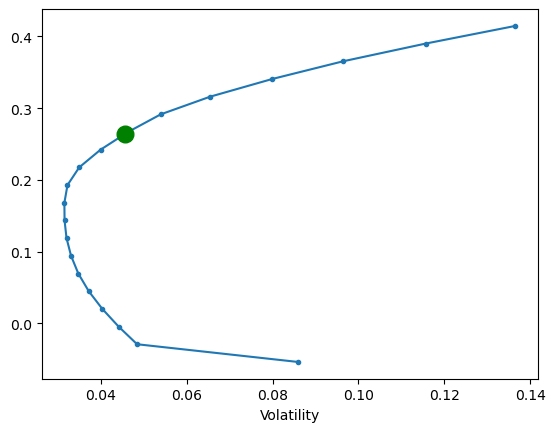

In [1343]:
erk.plot_ef(20, er, cov)
plt.plot(vol_msr, r_msr, color='green', marker='o', linewidth=2, markersize=12)

 La CML est une droite qui représente la relation linéaire entre le rendement attendu et le risque pour un portefeuille qui combine un actif sans risque et un portefeuille optimal sur la frontière efficiente.

 poids de l'actif risqué et l'actif sans risque par $w_1$ et $1 - w_1$, on a :
$$E(r_p) = (1-w_1)r_f + w_1E(r_1)$$
$r_f$ le taux de rendement sans risque et $E_r$ rendement attendu sur l'actif risqué 1.
 La variance de ce portefeuille à deux actifs :
$$\sigma_p^2 = w_1^2\sigma_1^2 + (1-w_1)^2\sigma_f^2 + 2w_1(1-w_1)\sigma_{1f}$$
 $\sigma_f^2$ variance du taux de rendement de l'actif sans risque et $\sigma_{1f}$ covariance entre les rendements de l'actif risqué et de l'actif sans risque. Par définition, $\sigma_f^2=0$. La covariance est également égale à zéro, $\sigma_{1f}=0$, car il n'y a pas de corrélation entre une série de rendements sans risque et risqués. On a :
$$\sigma_p^2 = w_1^2\sigma_1^2$$
 on obtient $w_1 = \sigma_p/\sigma_1$. En substituant:
$$E(r_p) = r_f + \frac{E_r-r_f}{\sigma_p}\sigma_p$$

l'espérence de chaque portfeuille formé d'un actif sans risque et d'un risqué sera sur la CML, rq si $w_1=0$ donc pas d'actif risqué on a $\sigma_p=0$ donc $E(r_p)=r_f$


In [1344]:
from IPython.display import display, Image
jpeg_file = '6.jpeg'
#display(Image(filename=jpeg_file))

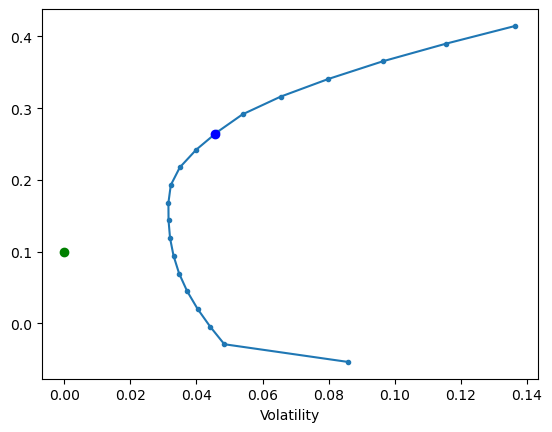

In [1345]:
erk.plot_ef(20, er, cov)
plt.plot(0,rf,color="green",marker="o")
plt.plot(vol_msr, r_msr, color='blue', marker='o')

In [1346]:
cml_x = [0, vol_msr]
cml_x

[0, 0.04571973202200668]

In [1347]:
cml_y = [rf, r_msr]
cml_y

[0.1, 0.26473948183896634]

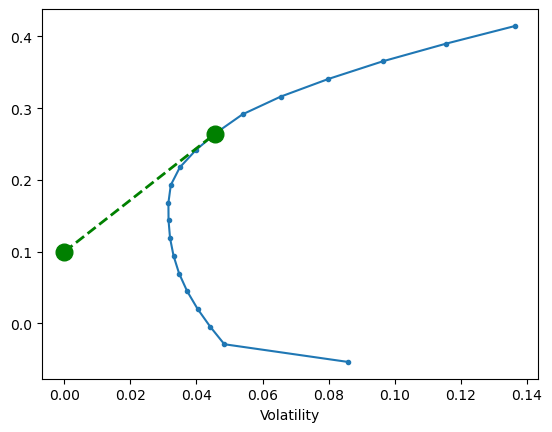

In [1348]:
erk.plot_ef(20, er, cov)
plt.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

rajouté à plotef
```python
    if show_cml:
        ax.set_xlim(left = 0)
        # get MSR
        w_msr = msr(riskfree_rate, er, cov)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        # add CML
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
```

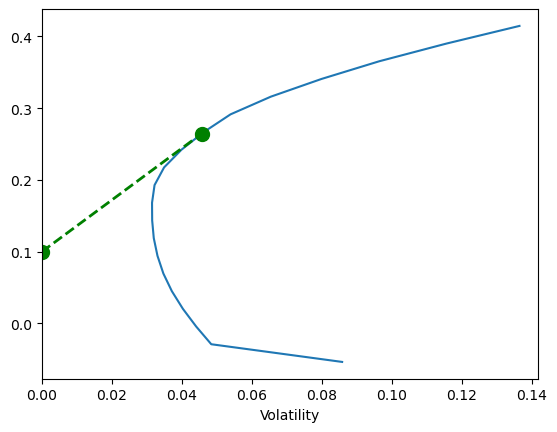

In [1349]:
erk.plot_ef(20, er, cov, style='-', show_cml=True, riskfree_rate=0.1)

### 3.e Global Minimum Variance (GMV) portfolio

<font color="orange">On ne connait pas les rendements, la covariance future. Les estimations contiennent presque certainement des erreurs d’estimation. Le GMV est portefeuille le moins sensible aux erreurs dans les estimations de paramètres. Nécessitant aucune estimation du rendement attendu il est sensible qu’aux erreurs dans les estimations des paramètres de risque. En effet La pondération des actifs du portefeuille varie beaucoup si les rendements attendus des actifs changent. Pour calculer le GMV on suppose que tous les rendements sont les mêmes, l’optimiseur ne peut pas améliorer le SR en augmentant les rendements⇒baisser la volatilité.</font>

In [1350]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

l = ["Food", "Steel"]
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

une variation faible dans les estimations peut faire changer fortement les weigts du portfeuille

In [1351]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])# approximativement 11 et 12% de rendements pour food et steel

array([0.57930354, 0.42069646])

In [1352]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

Une façon d’éviter ce jeu d’estimation on peut réaliser une diversification naive, ce qui signifie détenir tous les titres avec un poids égal.

```python
    if show_ew:
        n = er.shape[0]
        w_ew = np.repeat(1/n, n)
        r_ew = portfolio_return(w_ew, er)
        vol_ew = portfolio_vol(w_ew, cov)
        # add EW
        ax.plot([vol_ew], [r_ew], color='goldenrod', marker='o', markersize=10)
```

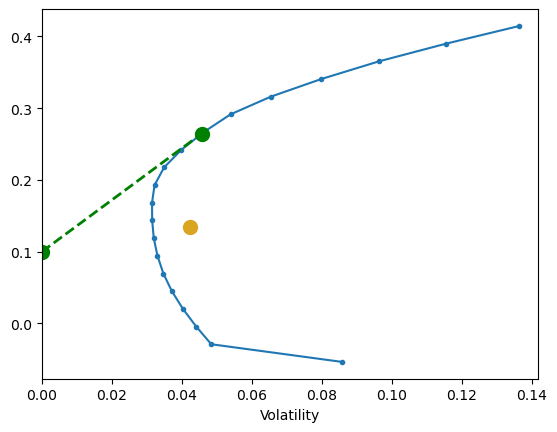

In [1353]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)


```python
def gmv(cov):

    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)
```
maximiser le SP=> minimiser la variance

dans efplot:
```python
    if show_gmv:
        w_gmv = gmv(cov)
        r_gmv = portfolio_return(w_gmv, er)
        vol_gmv = portfolio_vol(w_gmv, cov)
        ax.plot([vol_gmv], [r_gmv], color='midnightblue', marker='o', markersize=10)
```

<AxesSubplot:xlabel='Volatility'>

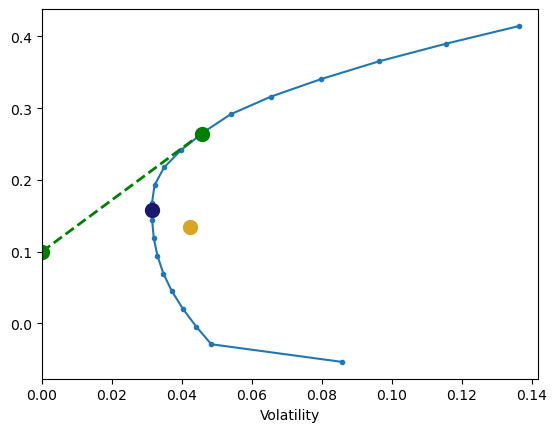

In [1354]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

In [1355]:
cov_p3=[
    [48.20,7.82,-2.65],
    [7.82,16.34,0.99],
    [-2.65,0.99,34.25]
]
cov_p3= pd.DataFrame(cov_p3, columns=['Excelon', 'IH','City-Guys'], index=['Excelon', 'IH','City-Guys'])


In [1356]:
cov_p3
e_p3=np.array([2.07,0.21,1.10])
e_p3=e_p3
e_p3

array([2.07, 0.21, 1.1 ])

$$w_{mvp} = \frac{1}{C}(\Sigma^{-1}1)=\frac{\Sigma^{-1}1}{1\Sigma^{-1}1}$$

In [1357]:
def gmv2(cov):
    one=np.ones(cov.shape[0])
    C=one.dot(np.linalg.inv(cov).dot(one))
    return (1/C)*np.linalg.inv(cov).dot(one)

w=gmv2(cov_p3)
e=erk.portfolio_return(w,e_p3)
std=erk.portfolio_vol(w,cov_p3)
e,std

(0.7463075675291153, 3.238313773255225)

In [1358]:
w=erk.gmv(cov_p3)
e=erk.portfolio_return(w,e_p3)
std=erk.portfolio_vol(w,cov_p3)
e,std

(0.7462771342211869, 3.2383137801977617)

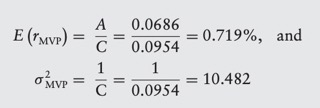

In [1359]:
from IPython.display import display, Image
jpeg_file = '11.jpeg'
display(Image(filename=jpeg_file))# 3.237

<AxesSubplot:xlabel='Volatility'>

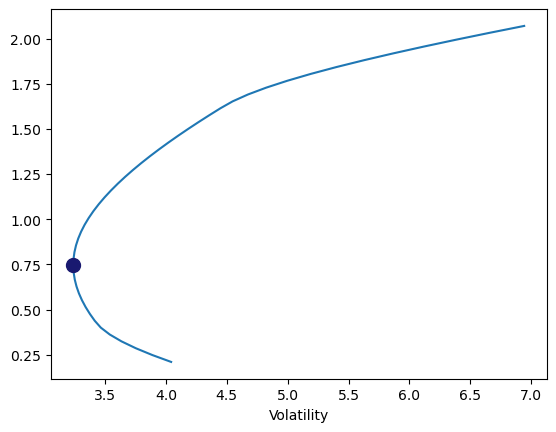

In [1360]:
erk.plot_ef(50, e_p3, cov_p3, style='-', riskfree_rate=0.18,show_gmv=True)

<font color="orange">les limites du modèle sont :</font>

<font color="orange">- Impose qu’on ait des **anticipations** pour tous les actifs de l’univers d’investissement μ = (μ1 μ2,...,μn)′ et Σ
<font color="orange">- **Sensibilité aux données d'entrée** : sensible aux données d'entrée, telles que les prévisions de rendement et les mesures de risque. Des prévisions de rendement inexactes ou des mesures de risque incorrectes peuvent conduire à des résultats suboptimaux.</font>

### 3.f limites de la diversification

<font color="orange">la diversification a des limites et ne peut garantir des gains ou éviter des pertes en toutes circonstances. La diversification peut ne pas aider pendant les périodes de crise de marché car les corrélations entre les actifs augmentent lorsque le marché baisse.

In [1361]:
%matplotlib inline
ind_return = erk.get_ind_returns()

ind_return.head()

Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals     Fin   Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

In [1362]:
def get_ind_nfirms():#30 Industry Portfolios Average number of Firms, chaque mois

    ind = pd.read_csv("data/ind30_m_nfirms.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_size():# 30 Industry Portfolios Average size (market cap), chaque mois
    ind = pd.read_csv("data/ind30_m_size.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

ind_nfirms = get_ind_nfirms()
ind_size = get_ind_size()

In [1363]:
ind_nfirms.head()

Food  Beer  Smoke  Games  Books  Hshld  Clths  Hlth  Chems  Txtls  \
1926-07    43     3     16      7      2      8     12     7     17     13   
1926-08    43     3     16      7      2      8     12     7     17     13   
1926-09    43     3     16      7      2      8     12     7     17     13   
1926-10    43     3     16      7      2      8     12     7     17     13   
1926-11    43     3     16      7      2      8     12     7     17     13   

         ...  Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  Meals  Fin  \
1926-07  ...      5      3      7      6     74      2     33      6   12   
1926-08  ...      5      3      7      6     74      2     33      6   12   
1926-09  ...      5      3      7      6     74      2     33      6   12   
1926-10  ...      5      3      7      6     74      2     33      6   12   
1926-11  ...      5      3      7      6     74      2     33      6   12   

         Other  
1926-07      4  
1926-08      4  
1926-09      4  
1926-10      4  
1926-11      4  

[5 rows x 30 columns]

In [1364]:
ind_size.head()

Food  Beer  Smoke  Games  Books  Hshld  Clths   Hlth  Chems  Txtls  \
1926-07  35.98  7.12  59.72  26.41  12.02  22.27  18.36  25.52  57.59   6.18   
1926-08  36.10  6.75  60.47  27.17  13.33  22.13  19.83  25.80  62.13   6.20   
1926-09  37.00  8.58  64.03  27.30  14.67  21.18  19.29  26.73  65.53   6.71   
1926-10  37.14  8.92  64.42  28.76  14.42  21.23  19.03  26.87  68.47   6.82   
1926-11  35.88  8.62  65.08  27.38  15.79  20.14  19.03  26.54  65.06   6.84   

         ...   Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  Meals    Fin  \
1926-07  ...  350.36  13.60  56.70  35.35  66.91   1.19  46.65  10.82  18.83   
1926-08  ...  353.27  14.75  57.74  37.86  67.99   0.90  46.57  11.00  18.88   
1926-09  ...  360.96  15.05  59.61  36.82  71.02   0.95  46.11  10.94  19.67   
1926-10  ...  364.16  15.30  59.52  34.77  70.83   0.88  46.15  10.80  19.36   
1926-11  ...  363.74  14.89  58.74  32.80  68.75   0.74  45.03  10.33  18.35   

         Other  
1926-07  24.25  
1926-08  25.51  
1926-09  27.21  
1926-10  26.16  
1926-11  23.94  

[5 rows x 30 columns]

In [1365]:
ind_return.shape

(1110, 30)

In [1366]:
ind_size.shape

(1110, 30)

In [1367]:
ind_nfirms.shape

(1110, 30)

In [1368]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.head()

Food   Beer    Smoke   Games  Books   Hshld   Clths    Hlth  \
1926-07  1547.14  21.36   955.52  184.87  24.04  178.16  220.32  178.64   
1926-08  1552.30  20.25   967.52  190.19  26.66  177.04  237.96  180.60   
1926-09  1591.00  25.74  1024.48  191.10  29.34  169.44  231.48  187.11   
1926-10  1597.02  26.76  1030.72  201.32  28.84  169.84  228.36  188.09   
1926-11  1542.84  25.86  1041.28  191.66  31.58  161.12  228.36  185.78   

           Chems  Txtls  ...    Telcm  Servs   BusEq   Paper    Trans  Whlsl  \
1926-07   979.03  80.34  ...  1751.80  40.80  396.90  212.10  4951.34   2.38   
1926-08  1056.21  80.60  ...  1766.35  44.25  404.18  227.16  5031.26   1.80   
1926-09  1114.01  87.23  ...  1804.80  45.15  417.27  220.92  5255.48   1.90   
1926-10  1163.99  88.66  ...  1820.80  45.90  416.64  208.62  5241.42   1.76   
1926-11  1106.02  88.92  ...  1818.70  44.67  411.18  196.80  5087.50   1.48   

           Rtail  Meals     Fin   Other  
1926-07  1539.45  64.92  225.96   97.00  
1926-08  1536.81  66.00  226.56  102.04  
1926-09  1521.63  65.64  236.04  108.84  
1926-10  1522.95  64.80  232.32  104.64  
1926-11  1485.99  61.98  220.20   95.76  

[5 rows x 30 columns]

In [1369]:
total_mktcap = ind_mktcap.sum(axis=1)
total_mktcap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

<AxesSubplot:>

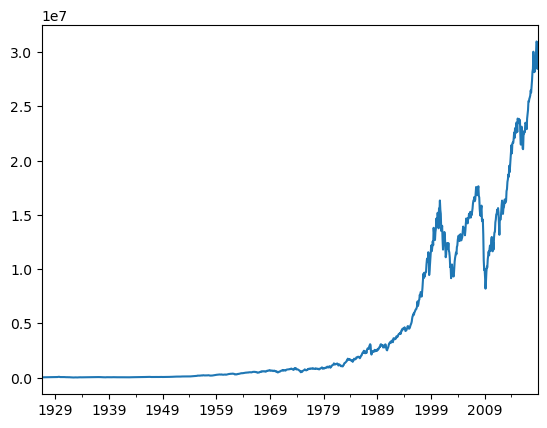

In [1370]:
total_mktcap.plot()

In [1371]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")# poids de chaque industrie
ind_capweight

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
1926-07  0.058037  0.000801  0.035844  0.006935  0.000902  0.006683  0.008265   
1926-08  0.056578  0.000738  0.035264  0.006932  0.000972  0.006453  0.008673   
1926-09  0.056699  0.000917  0.036510  0.006810  0.001046  0.006038  0.008249   
1926-10  0.056920  0.000954  0.036736  0.007175  0.001028  0.006053  0.008139   
1926-11  0.056725  0.000951  0.038285  0.007047  0.001161  0.005924  0.008396   
...           ...       ...       ...       ...       ...       ...       ...   
2018-08  0.021873  0.008309  0.008222  0.011997  0.001168  0.014569  0.009720   
2018-09  0.021005  0.007873  0.007515  0.011923  0.001076  0.014427  0.009874   
2018-10  0.020661  0.007862  0.007831  0.011851  0.001052  0.014606  0.010000   
2018-11  0.022649  0.008403  0.009178  0.010810  0.001066  0.015702  0.009761   
2018-12  0.022832  0.008763  0.008291  0.010589  0.001083  0.016477  0.009510   

             Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
1926-07  0.006701  0.036726  0.003014  ...  0.065714  0.001531  0.014889   
1926-08  0.006583  0.038497  0.002938  ...  0.064380  0.001613  0.014732   
1926-09  0.006668  0.039700  0.003109  ...  0.064318  0.001609  0.014870   
1926-10  0.006704  0.041486  0.003160  ...  0.064896  0.001636  0.014850   
1926-11  0.006831  0.040665  0.003269  ...  0.066868  0.001642  0.015118   
...           ...       ...       ...  ...       ...       ...       ...   
2018-08  0.103549  0.017596  0.000616  ...  0.039896  0.161042  0.108402   
2018-09  0.104324  0.016954  0.000618  ...  0.039669  0.163597  0.114947   
2018-10  0.106363  0.014954  0.000580  ...  0.040434  0.163111  0.114711   
2018-11  0.105080  0.014176  0.000467  ...  0.043476  0.160187  0.114465   
2018-12  0.109930  0.014630  0.000474  ...  0.043953  0.159804  0.106189   

            Paper     Trans     Whlsl     Rtail     Meals       Fin     Other  
1926-07  0.007956  0.185736  0.000089  0.057748  0.002435  0.008476  0.003639  
1926-08  0.008280  0.183379  0.000066  0.056014  0.002406  0.008258  0.003719  
1926-09  0.007873  0.187292  0.000068  0.054227  0.002339  0.008412  0.003879  
1926-10  0.007436  0.186812  0.000063  0.054280  0.002310  0.008280  0.003730  
1926-11  0.007236  0.187051  0.000054  0.054635  0.002279  0.008096  0.003521  
...           ...       ...       ...       ...       ...       ...       ...  
2018-08  0.010090  0.023453  0.010987  0.076225  0.014317  0.164637  0.047815  
2018-09  0.009675  0.023248  0.010992  0.080234  0.014275  0.162556  0.047549  
2018-10  0.009650  0.023535  0.010681  0.080886  0.014663  0.159464  0.048158  
2018-11  0.009333  0.023064  0.010674  0.078849  0.015642  0.161024  0.049159  
2018-12  0.009919  0.023915  0.010849  0.077102  0.016251  0.163053  0.050073  

[1110 rows x 30 columns]

In [1372]:
all(abs(ind_capweight.sum(axis=1) - 1) < 1E-10)

True

<AxesSubplot:>

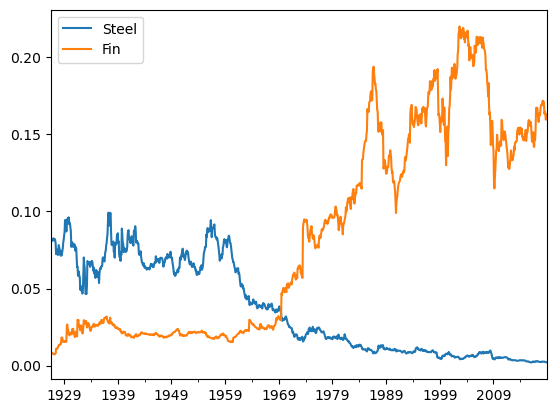

In [1373]:
ind_capweight[["Steel", "Fin"]].plot()

In [1374]:
(ind_capweight * ind_return).head()

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
1926-07  0.000325 -0.000042  0.000462  0.000203  0.000099 -0.000032  0.000668   
1926-08  0.001465  0.000200  0.002292  0.000038  0.000097 -0.000231 -0.000218   
1926-09  0.000658  0.000037  0.000460  0.000448 -0.000010  0.000044 -0.000042   
1926-10 -0.001742 -0.000032  0.000389 -0.000342  0.000097 -0.000283  0.000010   
1926-11  0.003602  0.000069  0.001742  0.000117 -0.000067 -0.000032  0.000157   

             Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
1926-07  0.000119  0.002989  0.000012  ...  0.000545  0.000141  0.000307   
1926-08  0.000280  0.002117  0.000239  ...  0.001397  0.000033  0.000647   
1926-09  0.000046  0.002116  0.000072  ...  0.001550  0.000036  0.000028   
1926-10 -0.000038 -0.001975  0.000032  ... -0.000071 -0.000033 -0.000162   
1926-11  0.000370  0.002115  0.000102  ...  0.001090  0.000062  0.000550   

            Paper     Trans     Whlsl     Rtail     Meals       Fin     Other  
1926-07  0.000613  0.003585 -0.000021  0.000040  0.000046  0.000031  0.000189  
1926-08 -0.000197  0.008949  0.000004 -0.000420 -0.000003  0.000368  0.000251  
1926-09 -0.000436  0.000094 -0.000005  0.000136 -0.000013 -0.000103 -0.000150  
1926-10 -0.000378 -0.004932 -0.000010 -0.001194 -0.000095 -0.000427 -0.000317  
1926-11  0.000278  0.002993  0.000003  0.003562  0.000099  0.000181  0.000141  

[5 rows x 30 columns]

In [1375]:
total_market_return = (ind_capweight * ind_return).sum(axis="columns")# somme des rendements des rendements de chaque industrie pondereres de sa capitalisation boursiere
total_market_return.head()

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
Freq: M, dtype: float64

In [1376]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.head()

1926-07    1031.375211
1926-08    1061.241004
1926-09    1067.147901
1926-10    1036.729633
1926-11    1065.798400
Freq: M, Name: Wealth, dtype: float64

<AxesSubplot:title={'center':'Total Market Cap Weighted Index 1926-2018'}>

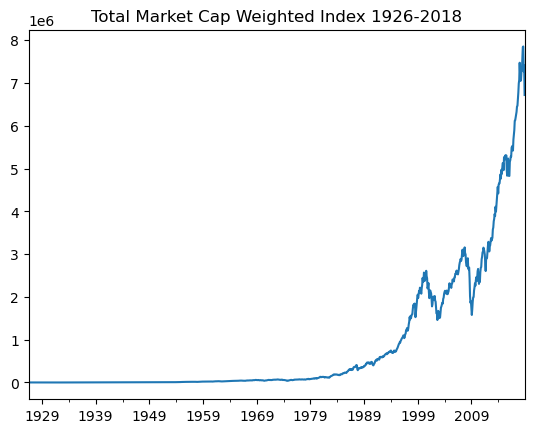

In [1377]:
total_market_index.plot(title="Total Market Cap Weighted Index 1926-2018")

```python
def get_total_market_index_returns():

    ind_nfirms = get_ind_nfirms()
    ind_size = get_ind_size()
    ind_return = get_ind_returns()
    ind_mktcap = ind_nfirms * ind_size
    total_mktcap = ind_mktcap.sum(axis=1)
    ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
    total_market_return = (ind_capweight * ind_return).sum(axis="columns")
    return total_market_return
```

<AxesSubplot:title={'center':'Total Market Cap Weighted Index 1926-2018'}>

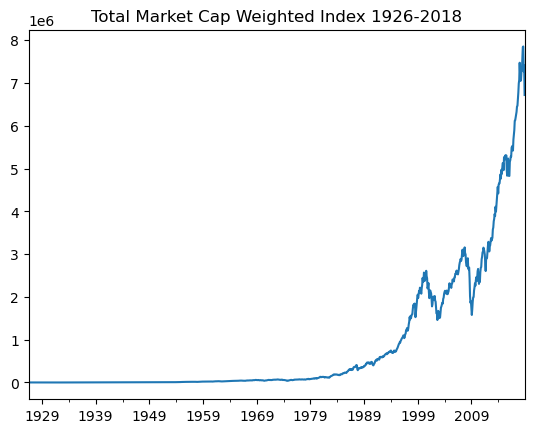

In [1378]:
total_market_return = erk.get_total_market_index_returns()
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(title="Total Market Cap Weighted Index 1926-2018")

Rolling Window sur 36 mois

<AxesSubplot:>

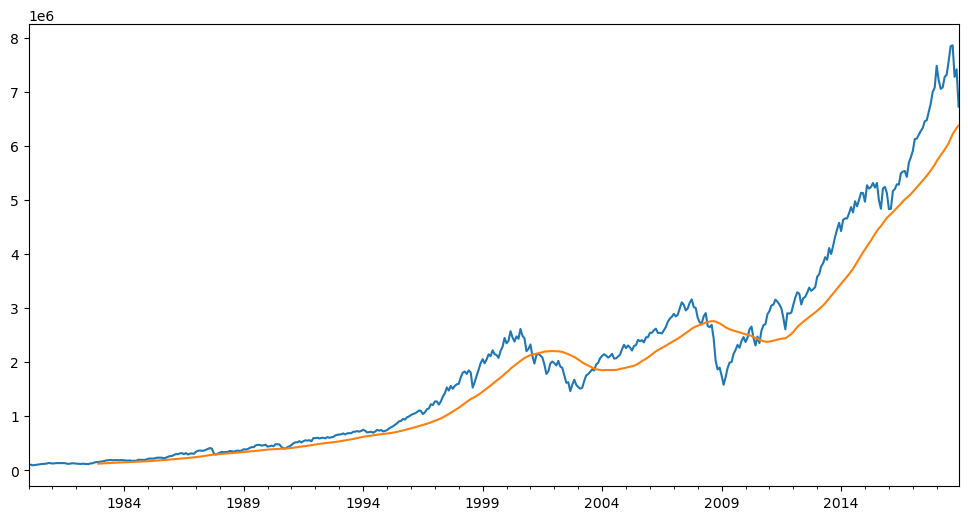

In [1379]:
total_market_index["1980":].plot(figsize=(12, 6))
total_market_index["1980":].rolling(window=36).mean().plot()

<AxesSubplot:>

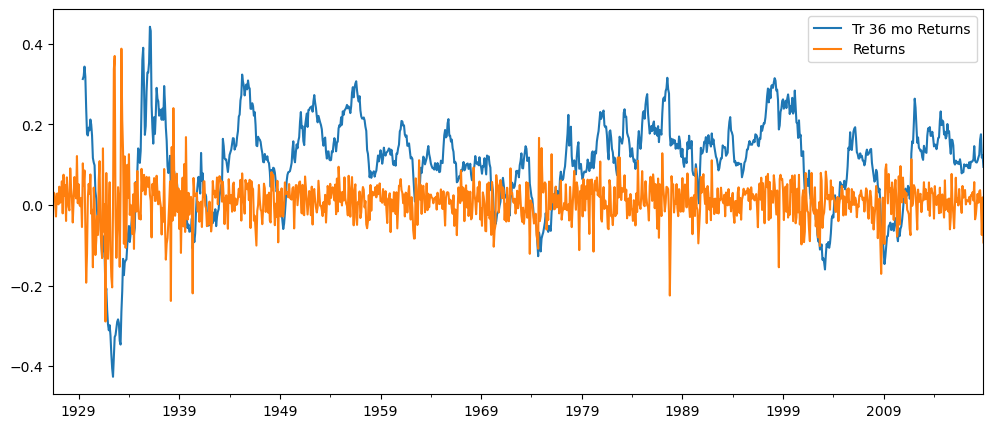

In [1380]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
#periode glissante de 3 ans ,a rendement annuel moyen sur les 3 ans,
tmi_tr36rets.plot(figsize=(12,5), label="Tr 36 mo Returns", legend=True)
total_market_return.plot(label="Returns", legend=True)

Corrélations moyennes entre toutes les industries pendant la même période de trois ans

In [1381]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

#corrélation entre chaque paire de portefeuilles d'industries au cours des 3 dernières annees,evolution des rendements des différentes industries ont évolué les unes par rapport aux autres sur cette période.

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [1382]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [1383]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())# par date->moyenne

corrélations roulantes: regrouper toutes les lignes pour la même date, puis calculer la moyenne

<AxesSubplot:xlabel='date'>

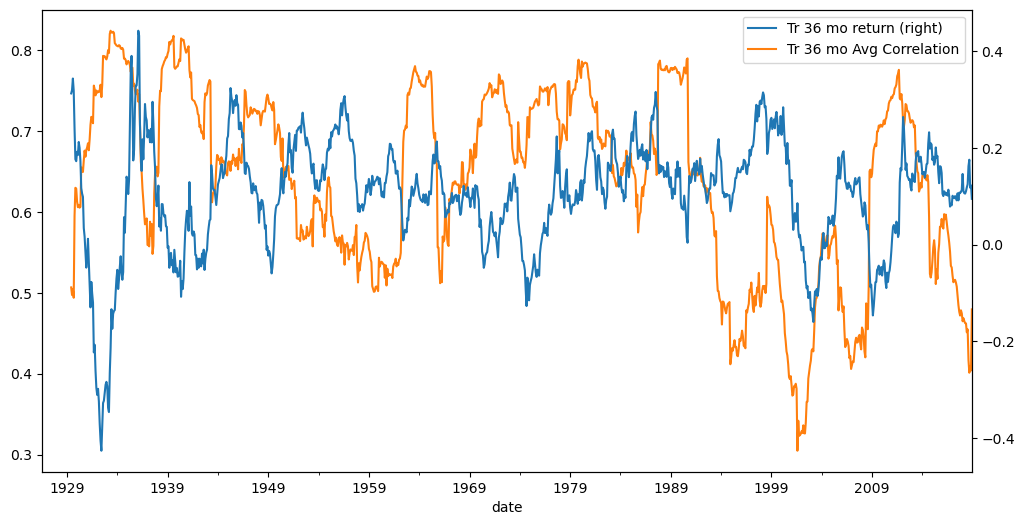

In [1384]:
tmi_tr36rets.plot(secondary_y=True, legend=True, label="Tr 36 mo return", figsize=(12,6))
ind_tr36corr.plot(legend=True, label="Tr 36 mo Avg Correlation")

augmentation de la correlation quand chute du marché, 2009

## 4 CPPI

<font color="orange">Le Constant Proportion Portfolio Insurance (CPPI) est une stratégie d'investissement qui permet aux investisseurs de limiter leur risque de perte de capital tout en conservant la possibilité de réaliser des gains. Le CPPI repose sur une allocation dynamique des actifs, qui permet d'adapter le portefeuille aux conditions de marché changeantes.</font>

<font color="orange">Dans la stratégie CPPI, l'investisseur investit une partie de son capital dans un actif sans risque  et une autre partie dans un actif risqué. La partie investie dans l'actif sans risque est ajustée régulièrement pour maintenir un certain niveau de protection contre les pertes de capital.</font>



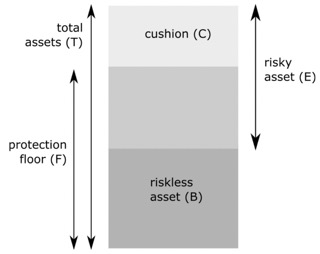

In [1385]:
from IPython.display import display, Image
jpeg_file = '4.jpeg'
display(Image(filename=jpeg_file))

• $T$ montant total d'actifs

• Protection floor F est le niveau d'actifs que l'on souhaite protéger contre les risques de baisse

• cushion est La différence entre les actifs totaux $T$ et le niveau de protection souhaité $F$
$C=T-F$

• Le montant d'actif risqué $E$ est $E = M ∗ C$, où M est un multiplicateur (pas encore déterminé)

• Le reste est investi dans un actif sans risque $B = T-E$

Si l'actif risqué $E$ perd de la valeur, le coussin $C$ devient plus petit et l'actif risqué doit être remplacé par un actif sans risque. $E = M ∗ C$ doit être respecté. Si le coussin devient nul, seul l'actif sans risque reste.

In [1386]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]
risky_r.head()


Steel     Fin    Beer
2000-01 -0.0277 -0.0442 -0.0228
2000-02  0.0684 -0.0849 -0.1164
2000-03  0.0349  0.1669  0.0013
2000-04 -0.0084 -0.0425  0.0368
2000-05 -0.0492  0.0506  0.1187

In [1387]:
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()
tmi_return.head()

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
Freq: M, dtype: float64

In [1555]:
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r.head()

Steel  Fin  Beer
2000-01    NaN  NaN   NaN
2000-02    NaN  NaN   NaN
2000-03    NaN  NaN   NaN
2000-04    NaN  NaN   NaN
2000-05    NaN  NaN   NaN

In [1556]:
safe_r.values[:] = 0.03/12
safe_r.head()

Steel     Fin    Beer
2000-01  0.0025  0.0025  0.0025
2000-02  0.0025  0.0025  0.0025
2000-03  0.0025  0.0025  0.0025
2000-04  0.0025  0.0025  0.0025
2000-05  0.0025  0.0025  0.0025

CPPI algo inputs: les rendements actif, actif sûr, investissement initial, plancher à ne pas violer.

Backtesting de la stratégie, du début jusqu'à la fin:
    1. Calculer le coussin (valeur de l’actif moins plancher)
    2. Calculer l’allocation (en fonction du multiplicateur)
    3. Calculer la nouvelle valeur de l’actif

In [1390]:
def compound1(r):
    return np.expm1(np.log1p(r).sum())

def compound2(r):
    return (r+1).prod()-1

compound1(ind_return[["Steel", "Fin", "Beer"]])

Steel      435.580153
Fin       5778.433650
Beer     35820.527452
dtype: float64

In [1391]:
compound2(ind_return[["Steel", "Fin", "Beer"]])

Steel      435.580153
Fin       5778.433650
Beer     35820.527452
dtype: float64

In [1392]:
#%timeit compound1(ind_return)

In [1393]:
#%timeit compound2(ind_return)

In [1394]:
start = 1000
floor = 0.80

In [1395]:
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3

print(risky_r.shape)
print(n_steps)
print(floor_value)

(228, 3)
228
800.0


In [1396]:
account_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)

In [1397]:
start = 1000
floor = 0.80
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start * floor
m = 3
print("valeur du compte: "+str(account_value)+"€ valeur du plancher: "+str(floor_value)+"€")
cushion = (account_value - floor_value)/account_value
print("% de coussin: "+str(cushion))
risky_w = m*cushion
print("% alloué aux actifs risqués(M*C): "+str(round(risky_w,2))+" avec m= "+str(m))
risky_w = np.minimum(risky_w, 1)
risky_w = np.maximum(risky_w, 0)# on s'assure que c'est bien compris entre 0 et 1
safe_w = 1-risky_w
print("% alloué aux actifs sans risques: "+str(round(safe_w,2)))
risky_alloc = account_value*risky_w
print("montant alloué aux actifs risqués: "+str(round(risky_alloc,2))+"€")
safe_alloc = account_value*safe_w
print("montant alloué aux actifs sans risques: "+str(round(safe_alloc,2))+"€"+"\n")

print("rendements actifs risqués le: "+risky_r.index[0].strftime("%Y-%m"))
print(risky_r.iloc[0])
print()

risky_account_value=risky_alloc*(1+risky_r.iloc[0])
print("valeurs du compte alloué aux actifs risqués: \n"+str(round(risky_account_value,2))+"€"+"\n")


print("rendements actifs sans risques le: "+safe_r.index[0].strftime("%Y-%m"))
print(safe_r.iloc[0])
print()

safe_account_value=safe_alloc*(1+safe_r.iloc[0])
print("valeurs du compte alloué aux actifs sans risques: \n"+str(round(safe_account_value,2))+"€"+"\n")

account_value=risky_account_value+safe_account_value
print("valeur du compte: \n"+str(round(account_value,2))+"€\n")
cushion = (account_value - floor_value)/account_value
print("% de coussin: \n"+str(cushion)+"\n")
risky_w = m*cushion
print("% alloué aux actifs risqués(M*C): \n"+str(round(risky_w,2))+" avec m= "+str(m))

valeur du compte: 1000€ valeur du plancher: 800.0€
% de coussin: 0.2
% alloué aux actifs risqués(M*C): 0.6 avec m= 3
% alloué aux actifs sans risques: 0.4
montant alloué aux actifs risqués: 600.0€
montant alloué aux actifs sans risques: 400.0€

rendements actifs risqués le: 2000-01
Steel   -0.0277
Fin     -0.0442
Beer    -0.0228
Name: 2000-01, dtype: float64

valeurs du compte alloué aux actifs risqués: 
Steel    583.38
Fin      573.48
Beer     586.32
Name: 2000-01, dtype: float64€

rendements actifs sans risques le: 2000-01
Steel    0.0025
Fin      0.0025
Beer     0.0025
Name: 2000-01, dtype: float64

valeurs du compte alloué aux actifs sans risques: 
Steel    401.0
Fin      401.0
Beer     401.0
Name: 2000-01, dtype: float64€

valeur du compte: 
Steel    984.38
Fin      974.48
Beer     987.32
Name: 2000-01, dtype: float64€

% de coussin: 
Steel    0.187306
Fin      0.179049
Beer     0.189726
Name: 2000-01, dtype: float64

% alloué aux actifs risqués(M*C): 
Steel    0.56
Fin      0.54


In [1398]:
start = 1000
floor = 0.80
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start * floor
m = 3
for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()

account_history.head()

Steel          Fin        Beer
2000-01   984.380000   974.480000  987.320000
2000-02  1023.292876   931.167544  922.971256
2000-03  1047.555176   998.187296  924.835988
2000-04  1042.079009   973.927479  939.993701
2000-05  1007.137753  1001.460033  991.145489

In [1399]:
cushion_history.head()# baisse du compte => baisse du coussin => baisse de l'allocation dans l'actif risqué

Steel       Fin      Beer
2000-01  0.200000  0.200000  0.200000
2000-02  0.187306  0.179049  0.189726
2000-03  0.218210  0.140864  0.133234
2000-04  0.236317  0.198547  0.134982
2000-05  0.232304  0.178584  0.148930

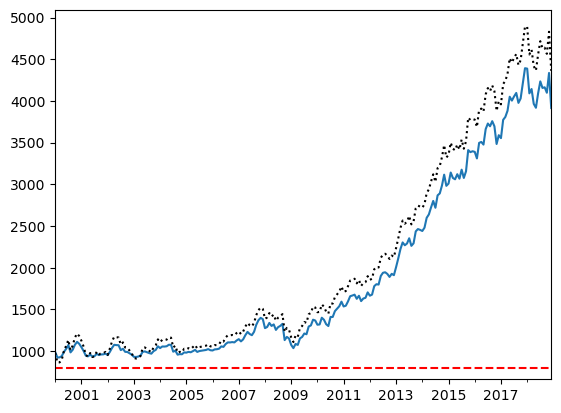

In [1400]:
ind = "Beer"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

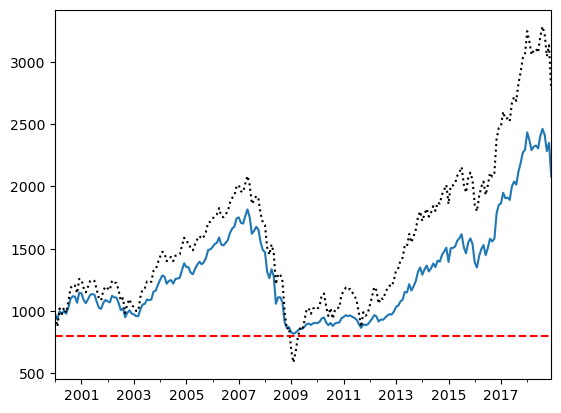

In [1401]:
ind = "Fin"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

<AxesSubplot:>

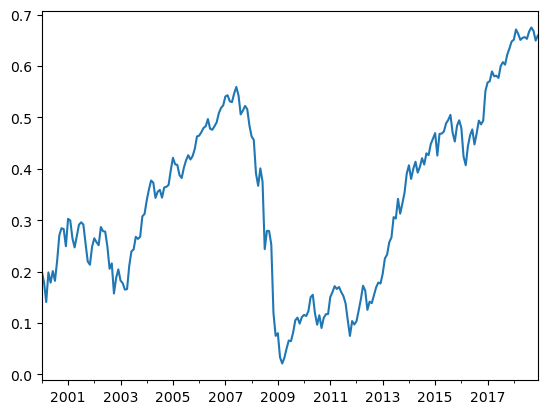

In [1402]:
cushion_history["Fin"].plot()# quasiment aucun actif risqué en 2009

<AxesSubplot:>

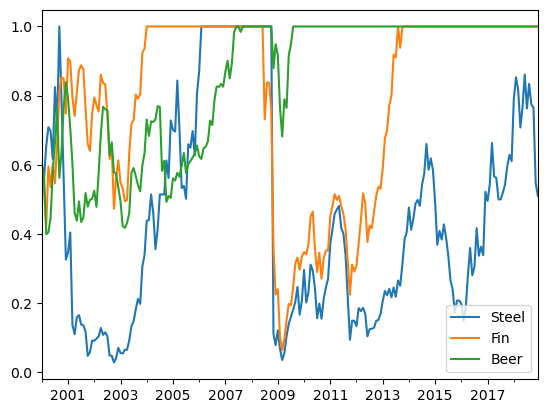

In [1403]:
risky_w_history.plot()

In [1404]:
def run_cppi(risky_r, safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03):

    dates = risky_r.index
    n_steps = len(dates)
    account_value = start
    floor_value = start*floor

    if isinstance(risky_r, pd.Series):
        risky_r = pd.DataFrame(risky_r, columns=["R"])

    if safe_r is None:
        safe_r = pd.DataFrame().reindex_like(risky_r)
        safe_r.values[:] = riskfree_rate/12

    account_history = pd.DataFrame().reindex_like(risky_r)
    risky_w_history = pd.DataFrame().reindex_like(risky_r)
    cushion_history = pd.DataFrame().reindex_like(risky_r)

    for step in range(n_steps):
        cushion = (account_value - floor_value)/account_value
        risky_w = m*cushion
        risky_w = np.minimum(risky_w, 1)
        risky_w = np.maximum(risky_w, 0)
        safe_w = 1-risky_w
        risky_alloc = account_value*risky_w
        safe_alloc = account_value*safe_w

        account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])

        cushion_history.iloc[step] = cushion
        risky_w_history.iloc[step] = risky_w
        account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()
    backtest_result = {
        "Wealth": account_history,
        "Risky Wealth": risky_wealth,
        "Risk Budget": cushion_history,
        "Risky Allocation": risky_w_history,
        "m": m,
        "start": start,
        "floor": floor,
        "risky_r":risky_r,
        "safe_r": safe_r
    }
    return backtest_result

In [1405]:
def summary_stats(r, riskfree_rate=0.03):

    ann_r = r.aggregate(annualize_rets, periods_per_year=12)
    ann_vol = r.aggregate(annualize_vol, periods_per_year=12)
    ann_sr = r.aggregate(sharpe_ratio, riskfree_rate=riskfree_rate, periods_per_year=12)
    dd = r.aggregate(lambda r: drawdown(r).Drawdown.min())
    skew = r.aggregate(skewness)
    kurt = r.aggregate(kurtosis)
    cf_var5 = r.aggregate(erk.var_gaussian, modified=True)
    hist_cvar5 = r.aggregate(erk.cvar_historic)
    return pd.DataFrame({
        "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Skewness": skew,
        "Kurtosis": kurt,
        "Cornish-Fisher VaR (5%)": cf_var5,
        "Historic CVaR (5%)": hist_cvar5,
        "Sharpe Ratio": ann_sr,
        "Max Drawdown": dd
    })


<AxesSubplot:>

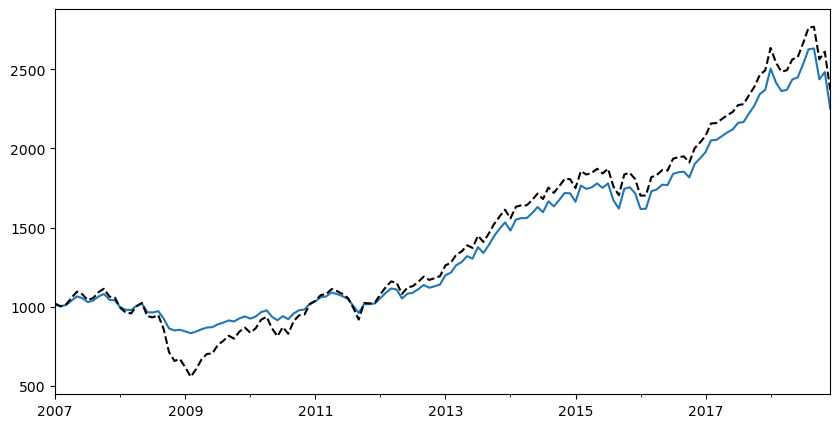

In [1406]:
btr = erk.run_cppi(tmi_return["2007":])
ax = btr["Wealth"].plot(legend=False, figsize=(10, 5))
btr["Risky Wealth"].plot(ax = ax, style="k--", legend=False)

<AxesSubplot:>

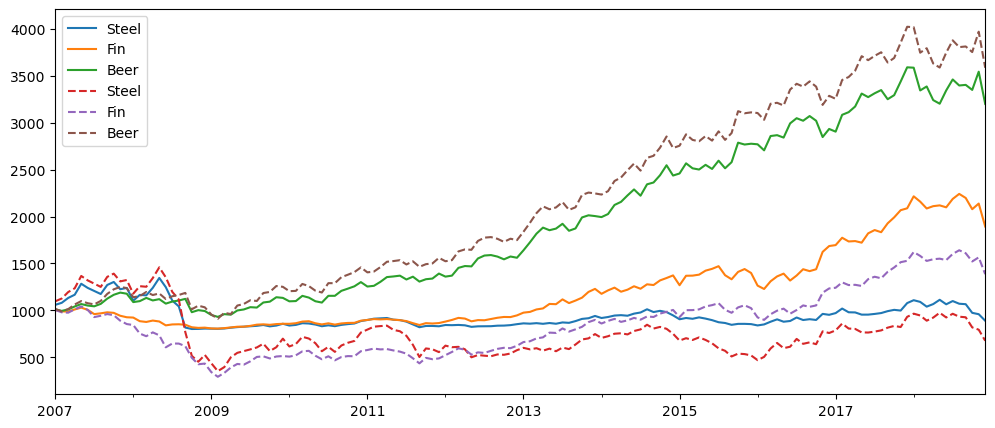

In [1407]:
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]])
ax = btr["Wealth"].plot(figsize=(12,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [1408]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]# vol et max drowdown plus faible

Annualized Return  Annualized Vol  Sharpe Ratio  Max Drawdown
Steel          -0.014490        0.126906     -0.341351     -0.404132
Fin             0.054690        0.109579      0.219159     -0.216868
Beer            0.101518        0.114363      0.608531     -0.217280

In [1409]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]

Annualized Return  Annualized Vol  Sharpe Ratio  Max Drawdown
Steel          -0.039660        0.306407     -0.221642     -0.758017
Fin             0.027364        0.212204     -0.012370     -0.718465
Beer            0.111554        0.127971      0.620132     -0.271368

La contrainte de perte maximale (Maximum drawdown constraint) est définie comme suit : $V_t$ > $αM_t$, où :
• $V_t$ est la valeur du portefeuille à l'instant t
• $M_t$ est la valeur maximale du portefeuille entre le temps 0 et le temps $t$ (un processus de maximum courant)
• $1-α$ est la perte maximale acceptable. La perte maximale autorisée est un pourcentage de la valeur de portefeuille la plus élevée atteinte.

En d'autres termes, la contrainte de perte maximale exige que la valeur du portefeuille à tout moment t doit être supérieure à un certain pourcentage $(1-α)$ de la valeur la plus élevée atteinte par le portefeuille jusqu'à présent ($M_t$). Le paramètre α représente le pourcentage maximum de perte que l'investisseur est prêt à accepter.

Par exemple, si le portefeuille a atteint une valeur maximale de 100 000 € à un moment donné, et que l'investisseur a défini une limite de perte maximale de 20 % (soit $α$ = 0,2), alors la contrainte de perte maximale exige que la valeur du portefeuille ne doit pas tomber en dessous de 80 000 € (soit 100 000 € x (1 - 0,2)).

```python
        if drawdown is not None:
            peak = np.maximum(peak, account_value)
            floor_value = peak*(1-drawdown)
```

<AxesSubplot:>

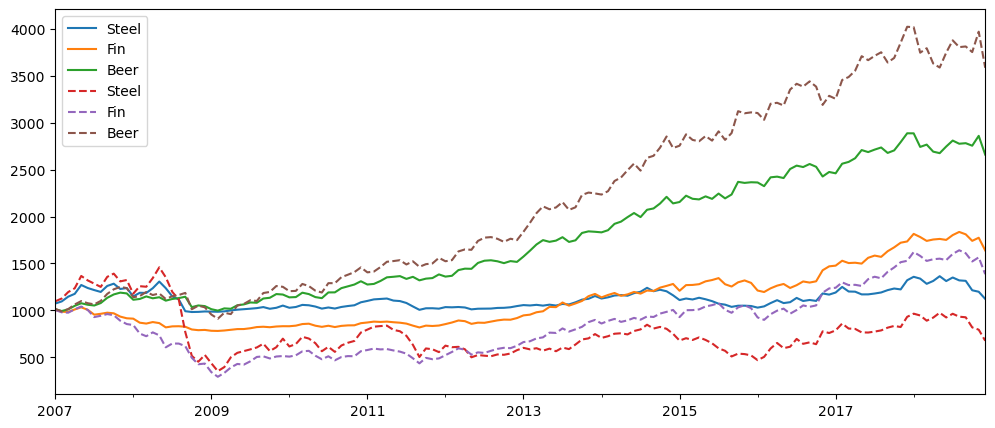

In [1410]:
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown=0.25)
ax = btr["Wealth"].plot(figsize=(12,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [1573]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]# drawdown=0.25, meilleur drowdonw et vol

Annualized Return  Annualized Vol  Sharpe Ratio  Max Drawdown
R           0.052391        0.078951      0.275935     -0.220824

In [1412]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]

Annualized Return  Annualized Vol  Sharpe Ratio  Max Drawdown
Steel          -0.039660        0.306407     -0.221642     -0.758017
Fin             0.027364        0.212204     -0.012370     -0.718465
Beer            0.111554        0.127971      0.620132     -0.271368

<AxesSubplot:>

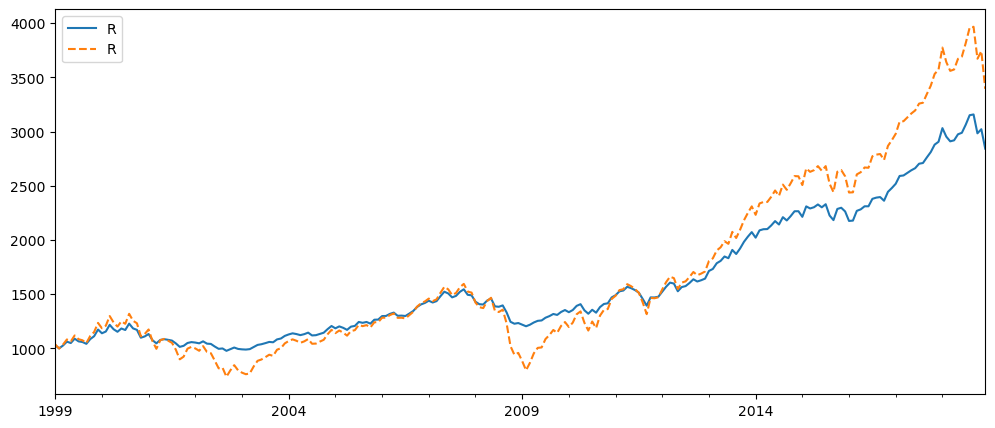

In [1413]:
btr = erk.run_cppi(tmi_return["1999":], drawdown=0.25)
ax = btr["Wealth"].plot(figsize=(12,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [1414]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]

Annualized Return  Annualized Vol  Sharpe Ratio  Max Drawdown
R           0.052391        0.078951      0.275935     -0.220824

In [1415]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]

Annualized Return  Annualized Vol  Sharpe Ratio  Max Drawdown
R            0.06137        0.148571      0.205314     -0.499943

## 5 Monte Carlo Simulation

### 5.a Simulating asset returns

Un <font color="red">processus d'Itô</font>  peut être défini en permettant à $\mu$ et $\sigma$ d'être des fonctions de la variable $X$ et du temps $t$. Cela donne comme EDS : $dX_t = \mu(t, X_t) dt + \sigma(t, X_t) dW_t$




Un  <font color="red">Mouvement brownien géométrique</font>(MBG) est un processus $X$ obéissant à l'EDS suivante : $dX_t = \mu X_t dt + \sigma X_t dW_t$

avec $ dW_t$  <font color="red">Mouvement Brownien</font> qui suit une distribution normale avec une moyenne de zéro et une variance de $\mathrm{d}t$.

$$dW_t \sim \mathcal{N}(0, dt)$$



Les coefficients $\mu$ et $\sigma $ sont deux constantes.
Cette EDS est un cas particulier d’un processus d’Itô.

 L'évolution du prix d'un actif financier est décrite par $$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

 $\mu$ est le taux de croissance attendu du prix de l'actif, $\sigma$ la volatilité du prix de l'actif, $dt$ est une petite variation de temps, et $\xi_t$ est une variable aléatoire gaussienne centrée réduite (c'est-à-dire une variable aléatoire gaussienne avec une moyenne nulle et une variance de 1) qui représente les fluctuations aléatoires du marché.

$\frac{S_{t+dt}-S_t}{S_t}$, représente le rendement de l'actif entre le temps $t$ et le temps $t+dt$. Ce terme mesure la variation relative du prix de l'actif pendant une période très courte de temps $dt$.



In [1416]:
n_years = 10
steps_per_year=12
n_scenarios=1000

dt = 1/steps_per_year
n_steps = int(n_years*steps_per_year)

xi = np.random.normal(size=(n_steps, n_scenarios))#120*1000
print(xi.shape)
xi

(120, 1000)


array([[-0.20730523,  0.29260287,  1.06640064, ...,  0.30599468,
         0.50592477, -0.89737917],
       [-0.28289766, -0.63942984,  0.87701324, ...,  0.93295953,
        -0.92165755,  0.9042071 ],
       [ 1.24790787, -0.49735774,  1.03825184, ...,  1.97564626,
         0.38120532, -2.49993078],
       ...,
       [ 0.41505006,  0.43649863,  0.16091957, ..., -0.64597259,
        -2.66341716, -1.0147412 ],
       [ 1.13324285, -1.18379628, -0.85427171, ...,  1.50420808,
         1.05500708,  0.62172622],
       [-0.42945446,  1.99385294,  0.8929352 , ..., -1.77326407,
         2.09143899,  0.57735771]])

In [1417]:
def gbm0(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):

    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi

    rets = pd.DataFrame(rets)

    prices = s_0*(rets+1).cumprod()
    return prices

In [1418]:
p = gbm0(n_years=10, n_scenarios=10000, mu=0.07)

p.head()

0           1          2           3           4           5     \
0  105.651456  102.447357  94.236512   97.372630  100.969766  103.762263   
1  108.623653   92.324863  93.806924  103.369244   98.019823  103.666214   
2  108.593971   84.516649  94.855878  100.277395  106.013490  101.053264   
3  111.629294   80.983117  94.565525  108.599280  112.044087  101.817521   
4  115.239118   79.964362  86.187708  105.668521  105.779949  105.182784   

         6           7          8           9     ...        9990        9991  \
0  106.856889  102.924095  96.829045   96.993289  ...  105.669311   99.695473   
1  106.041257  107.944326  87.377917   99.848016  ...  107.594995  103.847057   
2  109.016956  100.639124  81.598933  100.922209  ...  106.120843  110.043800   
3  116.092835  105.448871  80.703079  102.784043  ...  103.033845  114.407180   
4  123.191094   98.194661  78.500445  108.491590  ...  103.999869  112.725473   

         9992        9993        9994        9995        9996        9997  \
0  100.438730  106.870404   98.484912   96.697499   98.705562   98.431204   
1  100.323805  101.780125  101.692875  107.674740   96.254866   99.705188   
2  100.721700  100.377692  114.408640  105.672264   95.373451  102.255638   
3  105.093075  100.612464  111.649753  106.049939   99.149099   98.747300   
4  101.807792   95.459096  114.240742  105.340513  106.624958   97.489259   

         9998        9999  
0  101.310234  100.160503  
1   99.868698  100.263533  
2   98.909840   98.228632  
3   96.443446  103.231827  
4  100.198097  113.118843  

[5 rows x 10000 columns]

In [1419]:
p.iloc[-1].shape

(10000,)

In [1420]:
p.iloc[-1].mean(), 100*1.07**10

(199.95597852549733, 196.71513572895665)

<AxesSubplot:>

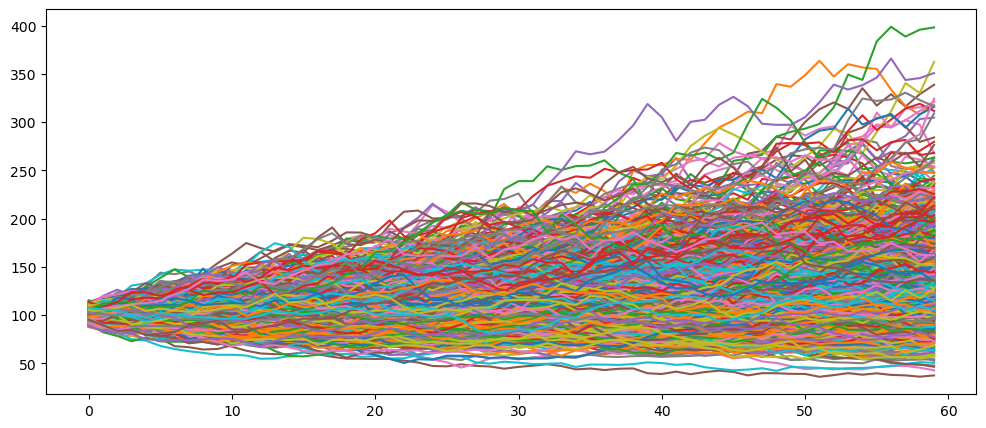

In [1421]:
gbm0(n_years=5, n_scenarios=1000, mu=0.07).plot(figsize=(12,5), legend=False)

In [1422]:
%timeit gbm0(n_years=5, n_scenarios=1000, mu=0.07)

1.95 ms ± 40.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1423]:
def gbm1(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):

    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(mu*dt+1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [1424]:
gbm1(n_years=10, n_scenarios=10000, mu=0.07).iloc[-1].mean(), 100*1.07**10

(201.99183961179014, 196.71513572895665)

In [1425]:
%timeit gbm1(n_years=5, n_scenarios=1000, mu=0.07)

2.54 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<AxesSubplot:>

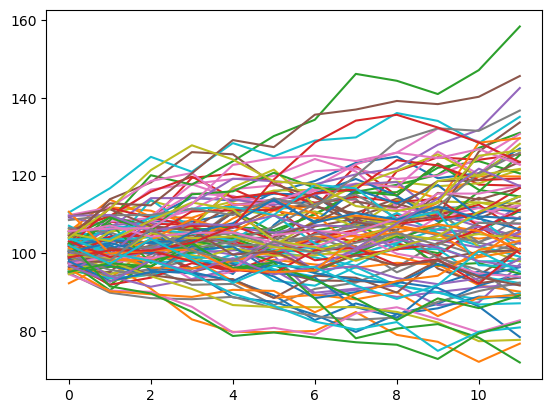

In [1426]:
gbm1(n_years=1, n_scenarios=100, mu=0.07).plot(legend=False)

In [1427]:
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) + 1
    rets_plus_1 = np.random.normal(loc=(mu*dt+1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [1428]:
%timeit erk.gbm(n_years=5, n_scenarios=1000, mu=0.07)

1.94 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot:>

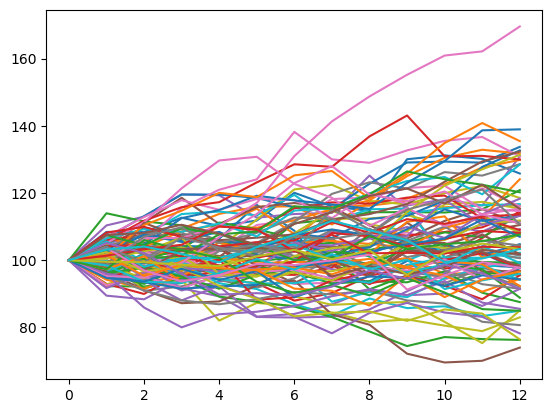

In [1429]:
erk.gbm(n_years=1, n_scenarios=100, mu=0.07).plot(legend=False)

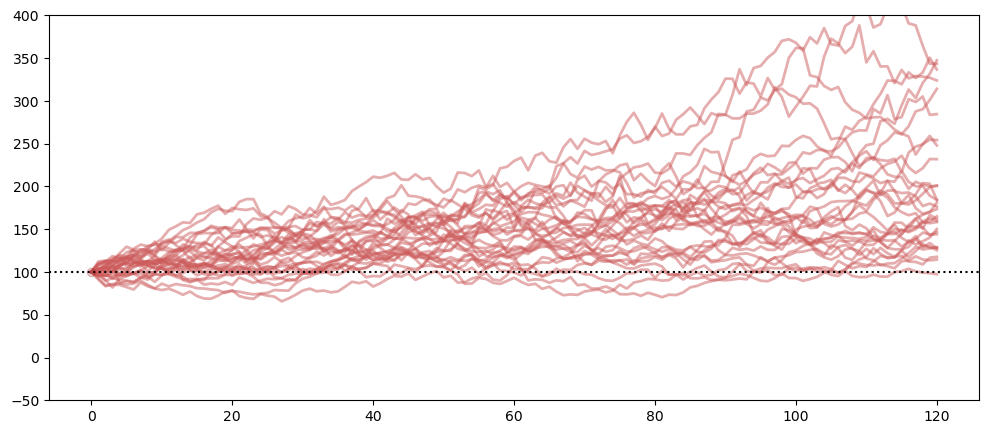

In [1430]:
def show_gbm(n_scenarios, mu, sigma):
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha = 0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=100, ls=":", color="black")
    ax.set_ylim(top=400)
    ax.set_ylim(bottom=-50)
    ax.plot(0,s_0, marker='o',color='darkred', alpha=0.2)

show_gbm(30,0.07,0.15)

In [1431]:
import ipywidgets as widgets
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=1, value=30),
                                   mu=(-0.2, +.2,.01),
                                   sigma=(0, .3, .01),
                                   continuous_update=False,
                                   layout=widgets.Layout(width='50%'))

display(gbm_controls)

interactive(children=(IntSlider(value=30, description='n_scenarios', max=1000, min=1), FloatSlider(value=0.0, …

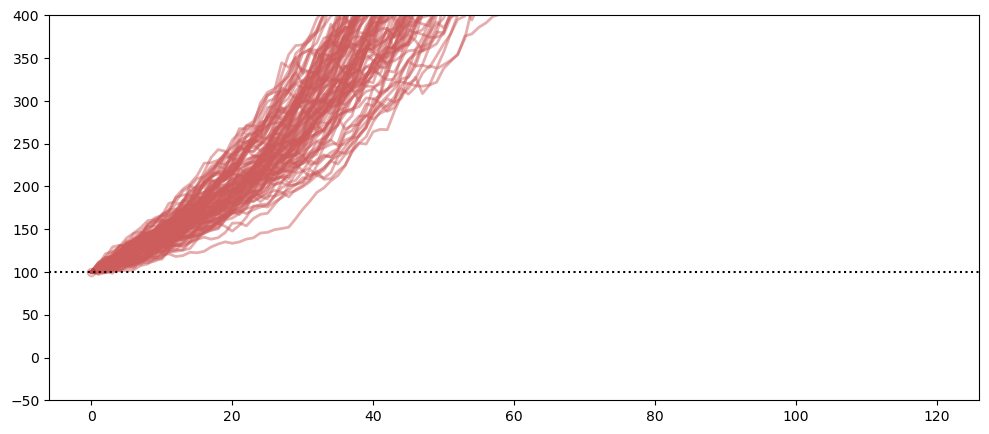

In [1432]:
show_gbm(100,0.50,0.10)

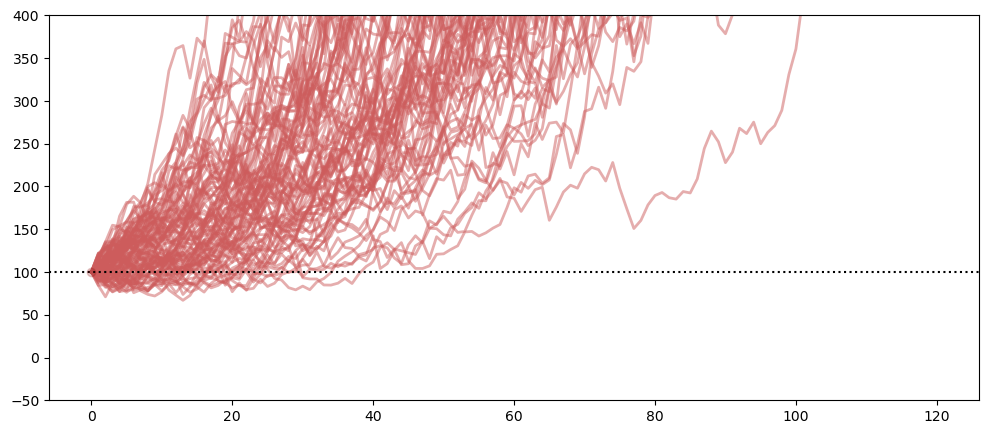

In [1433]:
show_gbm(100,0.50,0.30)

In [1434]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    #Monte Carlo Simulation of CPPI
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)

    #back-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                   mu=(0., +.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

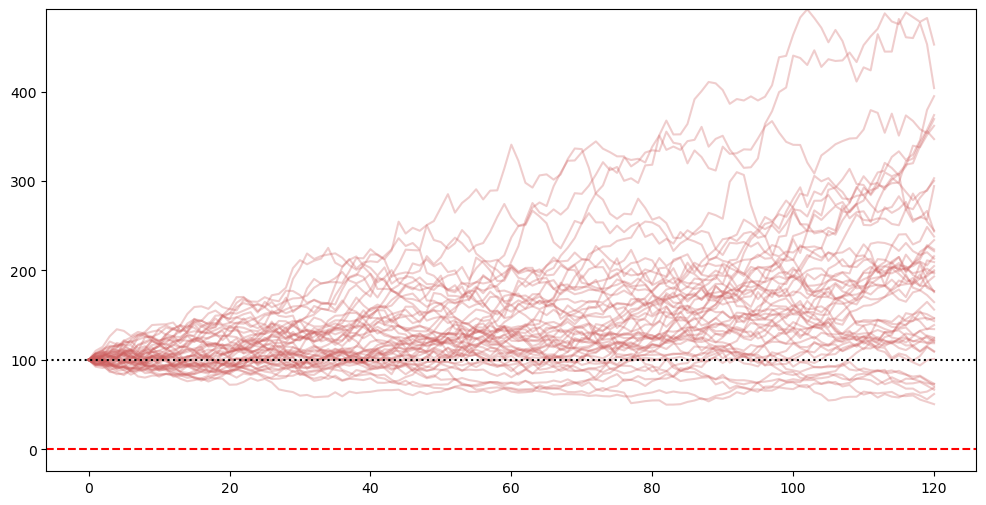

In [1435]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
    plt.plot()

show_cppi()

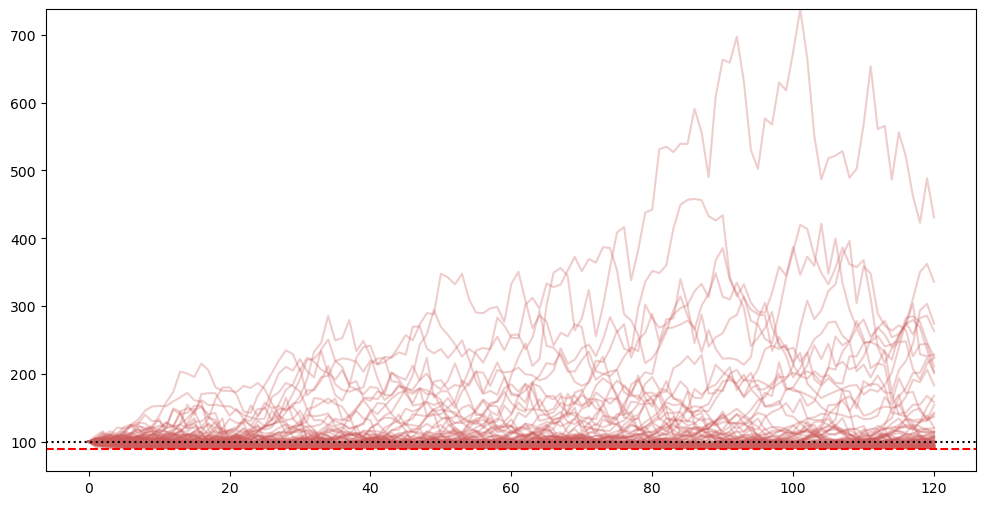

In [1436]:
show_cppi(n_scenarios=100, mu=0.01, sigma=0.35, m=3, floor=0.90, riskfree_rate=0.03)

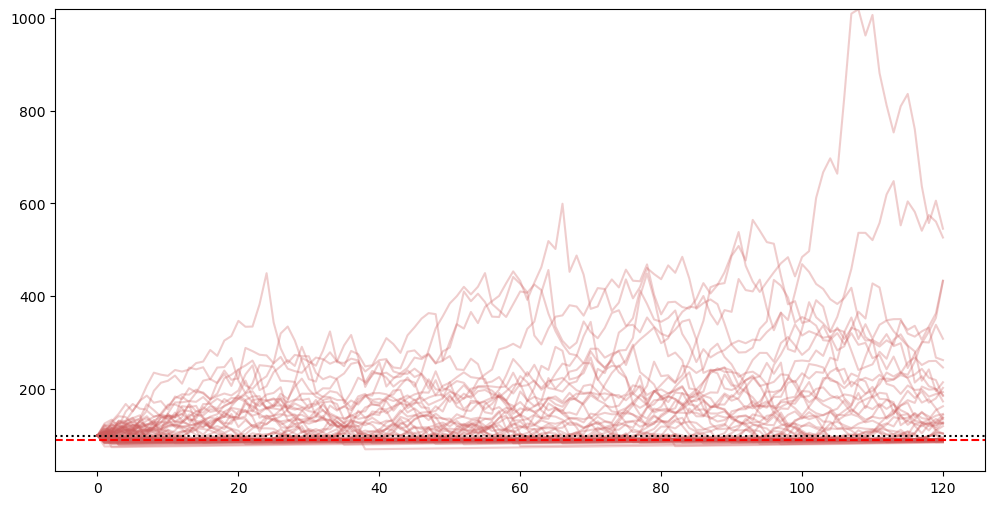

In [1437]:
show_cppi(n_scenarios=100, mu=0.01, sigma=0.35, m=9, floor=0.90, riskfree_rate=0.03)

In [1438]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)

    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]

    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]

    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)

    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85),xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)

cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                   mu=(0., +.2, .01),
                                   sigma=(0, .3, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

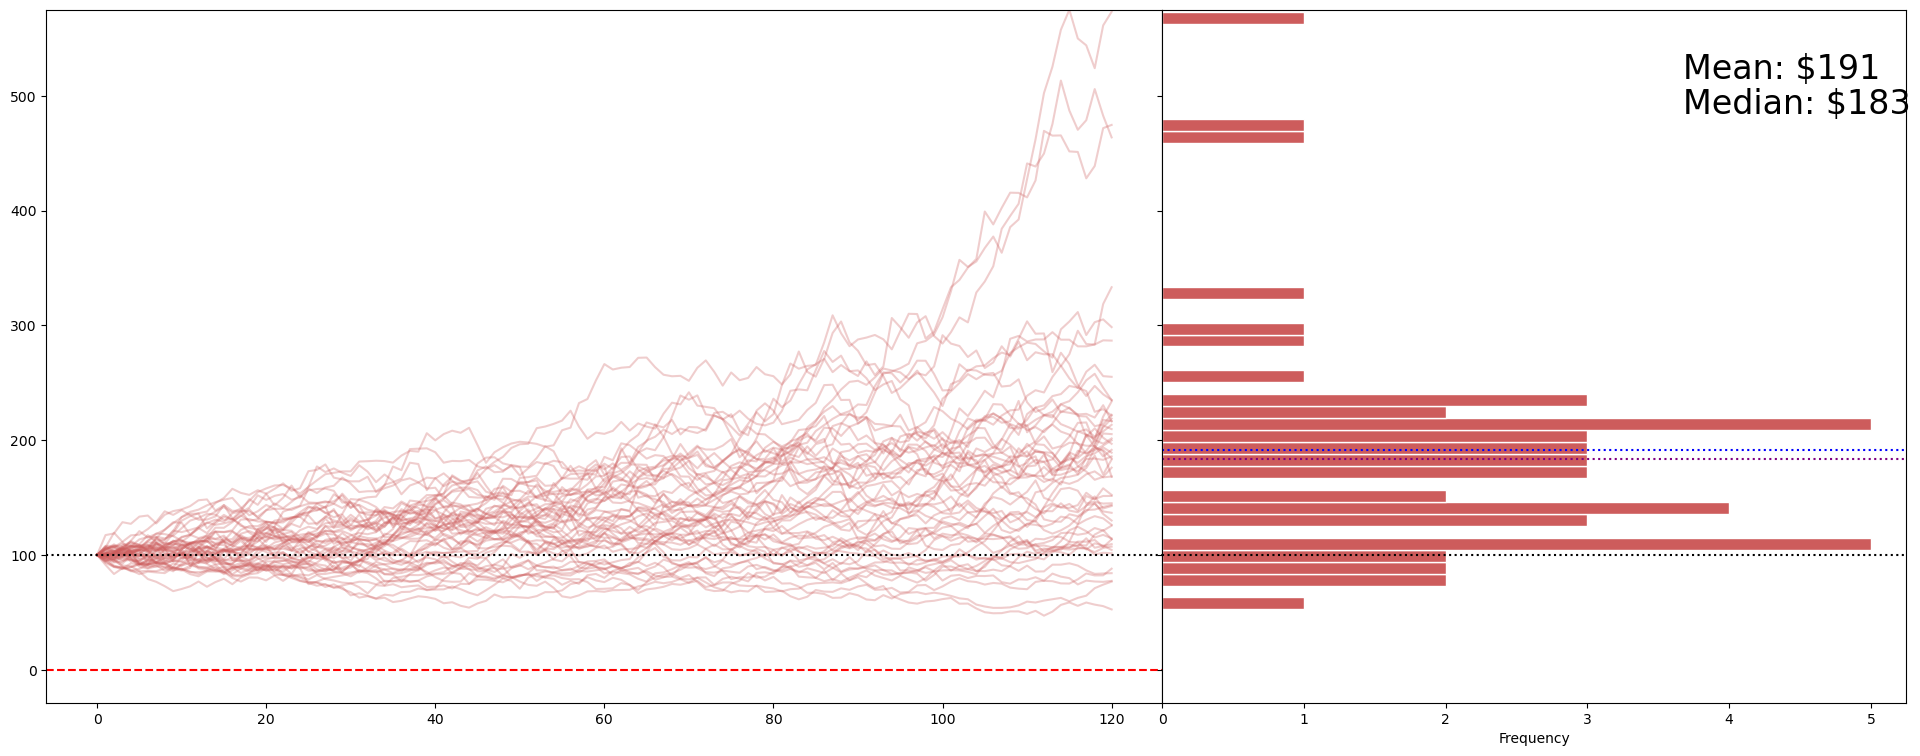

In [1439]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)

    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]

    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]

    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)#valeur final < floor*start
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)

    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85),xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)

    plt.show()


show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100)

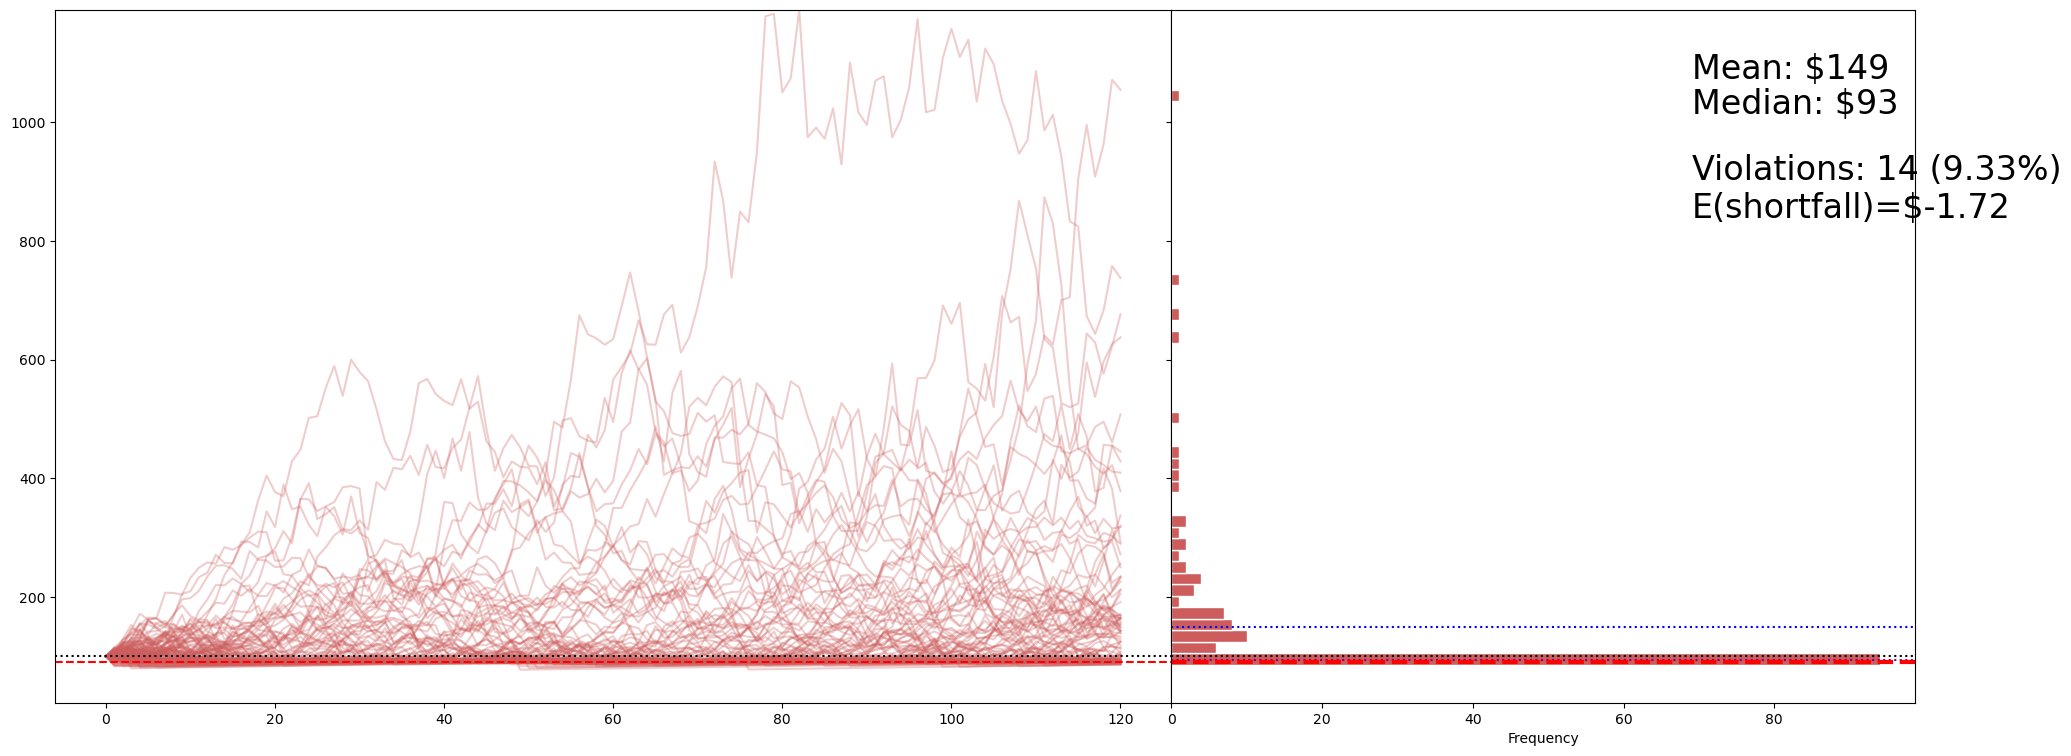

In [1440]:
show_cppi(n_scenarios=150, mu=0.07, sigma=0.35, m=6, floor=0.9, riskfree_rate=0.03, steps_per_year=12, y_max=100)#m=6

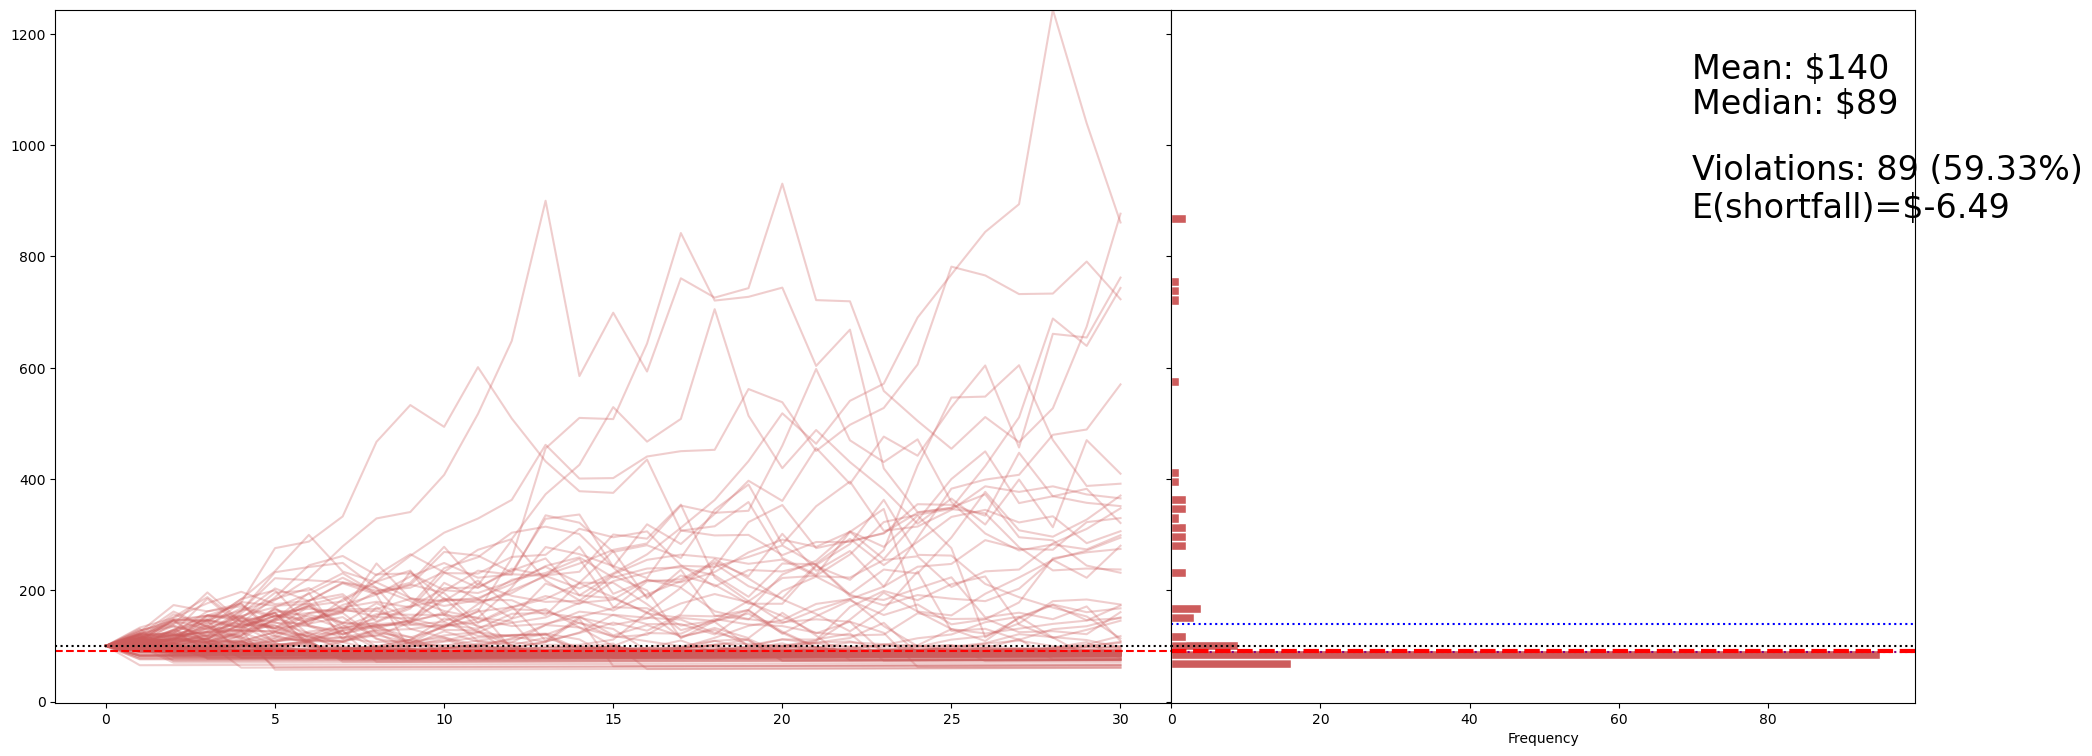

In [1441]:
show_cppi(n_scenarios=150, mu=0.07, sigma=0.35, m=6, floor=0.9, riskfree_rate=0.03, steps_per_year=3, y_max=100)#steps_per_year=3

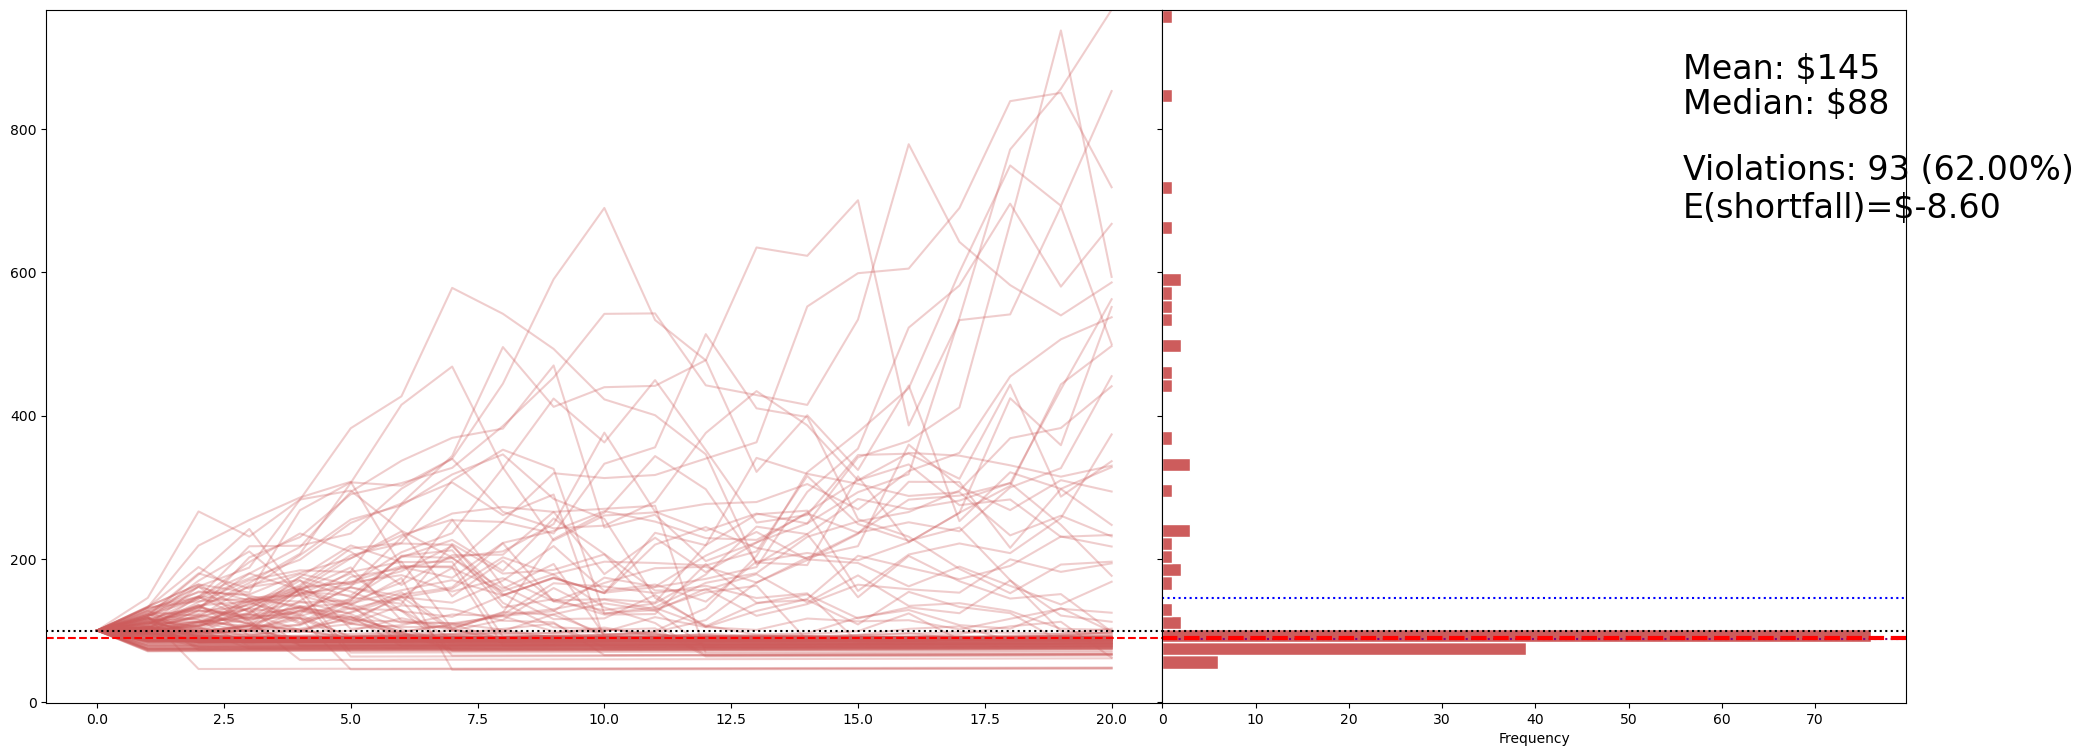

In [1442]:
show_cppi(n_scenarios=150, mu=0.07, sigma=0.35, m=6, floor=0.9, riskfree_rate=0.03, steps_per_year=2, y_max=100)#steps_per_year=2

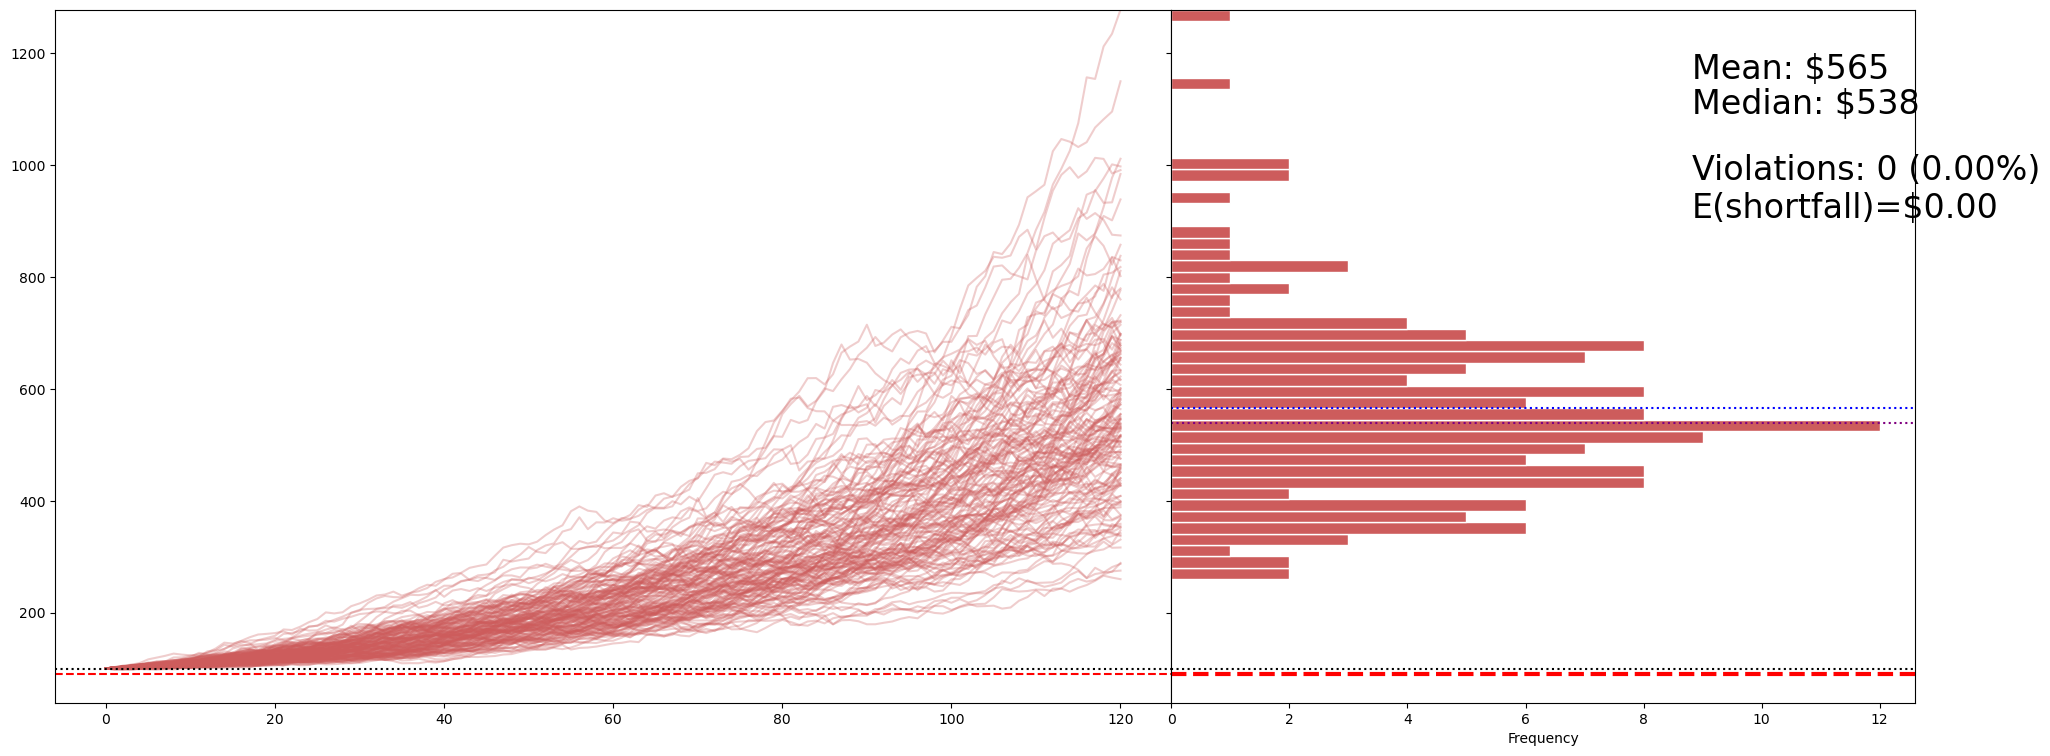

In [1443]:
show_cppi(n_scenarios=150, mu=0.20, sigma=0.10, m=3, floor=0.9, riskfree_rate=0.05, steps_per_year=12, y_max=100)# mu=0.20, steps_per_year=12

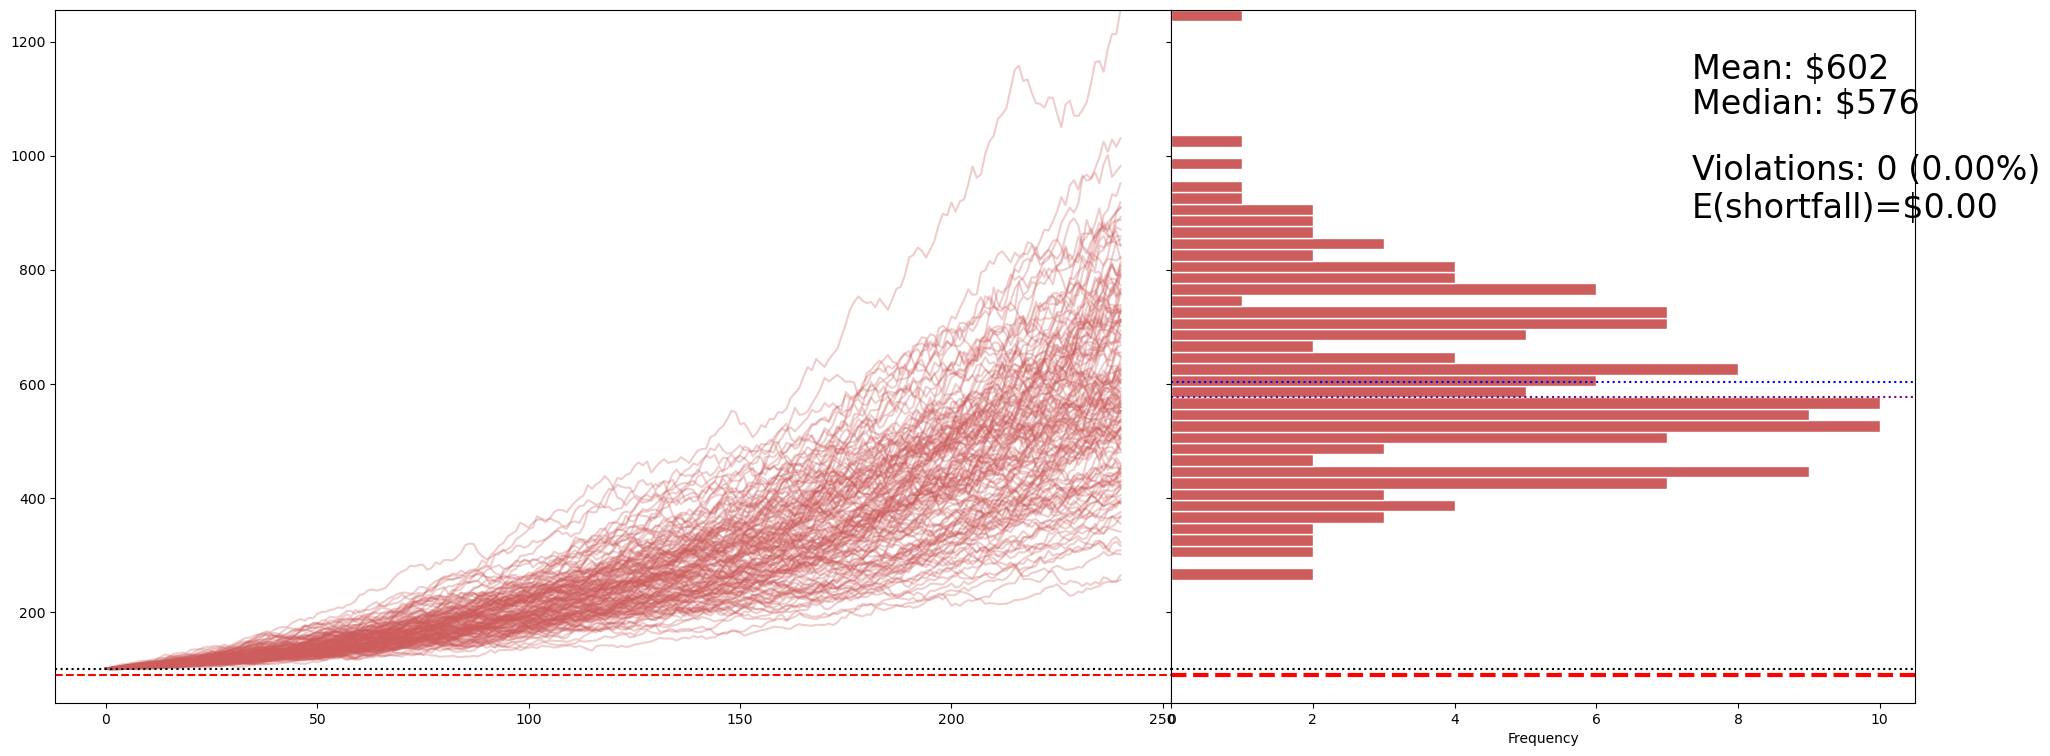

In [1444]:
show_cppi(n_scenarios=150, mu=0.20, sigma=0.10, m=3, floor=0.9, riskfree_rate=0.05, steps_per_year=24, y_max=100)#mu=0.20, steps_per_year=24

### 5.b Present Value of Liabilities and Funding Ratio

Dans la gestion actif-passif, nous mesurons le ratio entre les valeurs actuels des actifs et des passifs. Le funding ratio mesure les actifs par rapport aux passifs. S'il est égal à 100\%, cela signifie que les actifs sont suffisants pour couvrir les passifs.

La formule pour le ratio de financement est :
$$ F_t = \frac{A_t}{L_t} $$

en assumant que les taux sont constants
$$ PV(L) = \sum_{i=1}^{k} B(t_i) L_i$$

où $B(t_i)$ est le prix d'une obligation à taux zéro qui paie 1 dollar à l'instant $t_i$.

Si l'on souhaite savoir combien coûterait un dollar à l'instant $t_i$ dans le futur en l'achetant aujourd'hui (obligation ZC), ou combien coûterait un dollar dans le futur aujourd'hui, on a:

$$B(t) = \frac{1}{(1+r)^t}$$

De plus, si nous multiplions $B(t)$ par $(1+r)^t$, cela nous donne la valeur actuelle d'un dollar à l'instant $t$. Autrement dit, $B(t)$ est la quantité d'argent telle que lorsqu'elle est composée $t$ fois au taux d'intérêt actuel, elle nous donne un dollar.


Le surplus $S_t$ est la différence entre les actifs $A_t$ et les passifs $L_t$.
$$ S_t = A_t - L_t $$


In [1445]:
def discount(t, r):
    return (1+r)**(-t)

b = discount(10, .03)
b

0.7440939148967249

si on achete cette obligation aujourd’hui et on la garde pendant 10 ans à un taux d’intérêt de 3% par année, nous serons payés 1$

In [1446]:
b*(1+3/100)**10

1.0

 passif de 1, 1,5, 2 et 2,5 millions de dollars dans 3, 3,5, 4 et 4,5 ans respectivement, r=3%.

In [1447]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
liabilities

3.0    1.0
3.5    1.5
4.0    2.0
4.5    2.5
dtype: float64

In [1448]:
def pv(l, r):
    dates = l.index

    discounts = discount(dates, r)
    return (discounts*l).sum()

pv(liabilities, 0.03)

6.233320315080045

In [1449]:
def funding_ratio(assets, liabilities, r):
    return assets/pv(liabilities, r)

funding_ratio(5, liabilities, 0.03)

0.8021407126958777

In [1450]:
funding_ratio(5, liabilities, 0.02)

0.7720304366941648

### 5.c modèle de Cox Ingersoll Ross (CIR)


l'objectif est de simuler des changements de taux d'intérêt en utilisant le <font color="red">modèle de Cox-Ingersoll-Ross (CIR)</font>, le modèle de réversion à la moyenne comporte des paramètres pour contrôler la vitesse de réversion à la moyenne ainsi que le taux moyen à long terme.

$$
dr_{t}=a(b-r_{t})\,dt+\sigma {\sqrt  {r_{t}}}\,dW_{t}
$$

où $a$ est la vitesse de réversion à la moyenne et $b$ est le taux moyen à long terme et $\sigma$ est le paramètre de volatilité.

Cela peut être interprété comme décrivant le changement du taux d'intérêt à n'importe quel moment comme un multiple de la distance entre le taux actuel et son taux moyen à long terme plus une valeur aléatoire qui dépend du paramètre de volatilité.

Ainsi, nous pouvons commencer à un taux $r_0$ et générer une séquence de taux au fil du temps en utilisant la variation de taux définie par l'équation différentielle stochastique ci-dessus. Si nous éliminons le terme ${\sqrt  {r_{t}}}$, nous obtenons le modèle de Vasicek plus simple, mais le modèle CIR élimine la possibilité de taux d'intérêt négatifs en désactivant le terme de volatilité lorsque les taux d'intérêt approchent de zéro.

 Taux d'intérêt à court terme vs taux annuel
$$
1 + r_{annuel} = e^{r_{inst}}
$$


In [1451]:
def inst_to_ann(r):
    return np.expm1(r)# r_ann=e^r_inst-1

def ann_to_inst(r):# r_inst=ln(1+r_an)

    return np.log1p(r)

<AxesSubplot:>

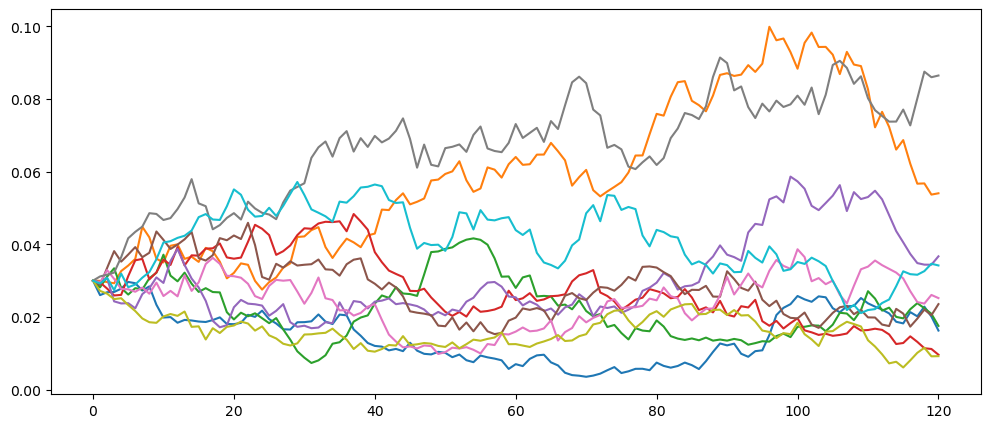

In [1452]:
def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):

    if r_0 is None: r_0 = b
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1

    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)

    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))

cir(n_scenarios=10).plot(legend=False, figsize=(12,5))

#### Générer l'évolution aléatoire des prix d'une obligation zéro-coupon

on utilise Le modèle pour générer les mouvements des prix d'une obligation zéro-coupon en utilisant les équations suivantes : ici P(t,T) est le prix d'une obligation zéro-coupon à l'instant t qui expire(mature) en T.

$$P(t,T)=A(t,T)e^{-B(t,T)r_{t}}\!$$

où

$$A(t,T)=\left({\frac  {2h e^{(a+h)\tau/2}}{2h+(a+h)(e^{\tau h}-1)}}\right)^{{2ab/\sigma ^{2}}} $$
et
$$B(t,T)={\frac  {2(e^{\tau h}-1)}{2h+(a+h)(e^{\tau h}-1)}} $$
et
$$h={\sqrt  {a^{2}+2\sigma ^{2}}} $$
et
$$\tau = T-t $$


In [1453]:
import math


def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    #b/r_0 annualisé pareil pour les taux générés

    if r_0 is None: r_0 = b
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1 # because n_years might be a float

    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0

    h = math.sqrt(a**2 + 2*sigma**2)
    prices = np.empty_like(shock)

    def price(ttm, r):
        _A = ((2*h*math.exp((h+a)*ttm/2))/(2*h+(h+a)*(math.exp(h*ttm)-1)))**(2*a*b/sigma**2)
        _B = (2*(math.exp(h*ttm)-1))/(2*h + (h+a)*(math.exp(h*ttm)-1))
        _P = _A*np.exp(-_B*r)
        return _P
    prices[0] = price(n_years, r_0)

    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)

        prices[step] = price(n_years-step*dt, rates[step])

    rates = pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))
    prices = pd.DataFrame(data=prices, index=range(num_steps))
    return rates, prices

    #1) A,B=>price
    #2) r_t-1 ,shock(random), a,b,std,dt =>dr_t=>rates
    #3) prices(T-t,rates)

In [1454]:
def show_cir_prices(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1].plot(legend=False, figsize=(12,5))

controls = widgets.interactive(show_cir_prices,
                              r_0 = (0, .15, .01),
                              a = (0, 1, .1),
                               b = (0, .15, .01),
                               sigma= (0, .1, .01),
                               n_scenarios = (1, 100))
display(controls)

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

<AxesSubplot:>

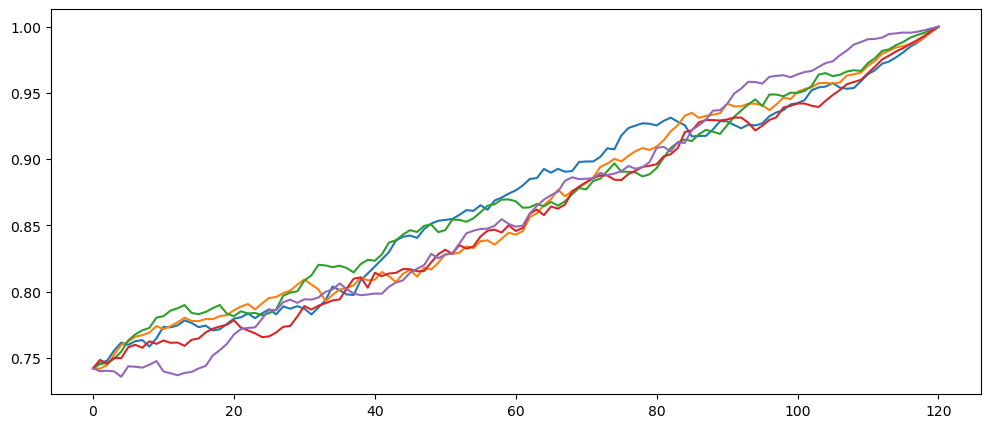

In [1455]:
cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5)[1].plot(legend=False, figsize=(12,5))

<AxesSubplot:>

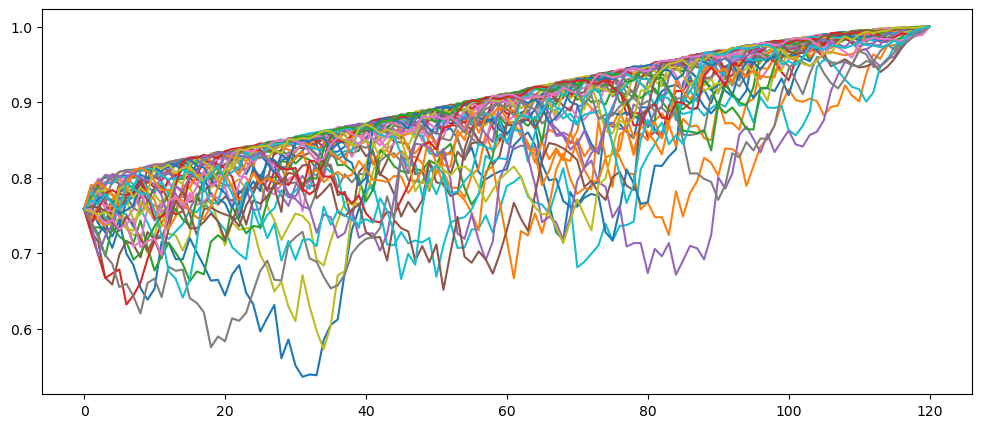

In [1456]:
cir(r_0=0.03, a=0.5, b=0.03, sigma=0.25, n_scenarios=40)[1].plot(legend=False, figsize=(12,5))

In [1557]:
#a_0 = 0.75 #actif
#rates, bond_prices = erk.cir(r_0=0.03, b=0.03, n_scenarios=10)
#liabilities = bond_prices
#liabilities
#prévoir de disposer de X$ pour payer une obligation zéro-coupon
#faudrait payer X$ en t pour recevoir 1$ à l'échéance.
#120 -> investisseur recupère son capital

In [1558]:
#zc_0 = erk.pv(pd.Series(data=[1], index=[10]), 0.03)
#zc_0# valeur aujourd'hui de 1€ dans 10 ans

In [1559]:
#nb d'oblig ZC qu'un investisseur peut acheter à partir de son budget initial et du prix actuel de l'obligation ZC zc_0.
#n_bonds = a_0/zc_0
#n_bonds

### 5.d Bond Pricing

In [1473]:
def bond_cash_flows(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12):

    n_coupons = round(maturity*coupons_per_year)
    coupon_amt = principal*coupon_rate/coupons_per_year
    coupon_times = np.arange(1, n_coupons+1)
    cash_flows = pd.Series(data=coupon_amt, index=coupon_times)
    cash_flows.iloc[-1] += principal # add the principal to the last payment
    return cash_flows

def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):

    cash_flows = bond_cash_flows(maturity, principal, coupon_rate, coupons_per_year)
    return pv(cash_flows, discount_rate/coupons_per_year)

In [1474]:
def bond_cash_flows2(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12):

    n_coupons = round(maturity*coupons_per_year)
    print("maturite de l'obligation: "+str(maturity)+"\nnombre de coupons par ans de l'obligation : "+str(coupons_per_year)+"\nnombre total de coupons de l'obligation :"+str(n_coupons)+"\n")
    coupon_amt = principal*coupon_rate/coupons_per_year
    print("principal: "+str(principal)+"\ntaux de coupons de l'obligation:"+str(coupon_rate)+"\nmontant des coupons de l'obligation: "+str(coupon_amt)+"\n")

    coupon_times = np.arange(1, n_coupons+1)
    cash_flows = pd.Series(data=coupon_amt, index=coupon_times)
    cash_flows.iloc[-1] += principal # add the principal to the last payment
    print(cash_flows)

bond_cash_flows2(20, 1000, 0.05, 2)

maturite de l'obligation: 20
nombre de coupons par ans de l'obligation : 2
nombre total de coupons de l'obligation :40

principal: 1000
taux de coupons de l'obligation:0.05
montant des coupons de l'obligation: 25.0

1       25.0
2       25.0
3       25.0
4       25.0
5       25.0
6       25.0
7       25.0
8       25.0
9       25.0
10      25.0
11      25.0
12      25.0
13      25.0
14      25.0
15      25.0
16      25.0
17      25.0
18      25.0
19      25.0
20      25.0
21      25.0
22      25.0
23      25.0
24      25.0
25      25.0
26      25.0
27      25.0
28      25.0
29      25.0
30      25.0
31      25.0
32      25.0
33      25.0
34      25.0
35      25.0
36      25.0
37      25.0
38      25.0
39      25.0
40    1025.0
dtype: float64


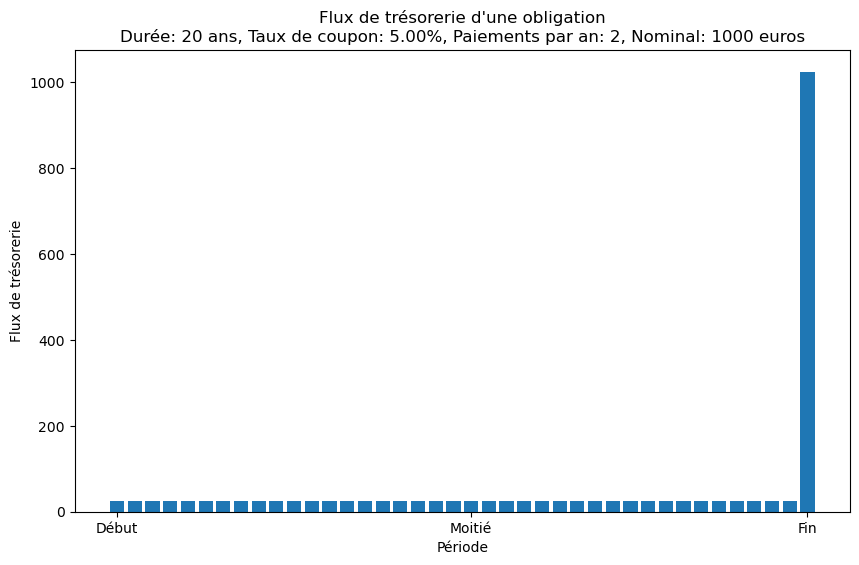

In [1475]:
import matplotlib.pyplot as plt

def obligation_cashflows(duree, nominal,taux_coupon, nb_coupons_par_an,):
    flux_tresorerie =bond_cash_flows(duree,nominal,taux_coupon, nb_coupons_par_an)
    nb_coupons=nb_coupons_par_an*duree

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(range(len(flux_tresorerie)), flux_tresorerie)
    plt.xlabel('Période')
    plt.ylabel('Flux de trésorerie')
    plt.title(f"Flux de trésorerie d'une obligation\nDurée: {duree} ans, Taux de coupon: {taux_coupon*100:.2f}%, Paiements par an: {nb_coupons_par_an}, Nominal: {nominal} euros")
    plt.xticks([0, nb_coupons//2, nb_coupons-1], ['Début', 'Moitié', 'Fin'])
    plt.show()

obligation_cashflows(20, 1000, 0.05, 2)

In [1476]:
def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    cash_flows = bond_cash_flows(maturity, principal, coupon_rate, coupons_per_year)
    return pv(cash_flows, discount_rate/coupons_per_year)

erk.bond_price(20, 1000, 0.05, 2, .04)

0    1136.777396
dtype: float64

<AxesSubplot:title={'center':'Change in 10Y Bond Prices with Interest Rates'}>

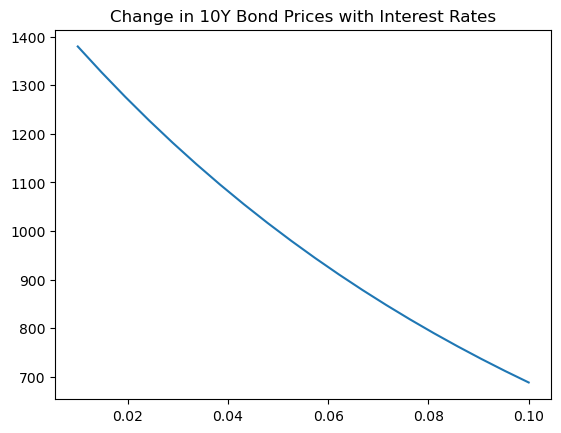

In [1477]:
rates = np.linspace(.01, .10, num=20)
prices = [erk.bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
pd.DataFrame(data=prices, index=rates).plot(title="Change in 10Y Bond Prices with Interest Rates", legend=False)

## 6 Factor and Index models

### 6.a Single index models

<font color="orange">Les fluctuations du cours d’un actif peuvent être attribuées à des **facteurs communs** qui **affectent l’ensemble** du marché et à des causes **spécifiques de la société cotée** résulte: le modèle du marché, le MEDAF
Le risque d’une action se compose de deux risques :</font>

<font color="orange">1. le **risque systématique** qui est celui qui ne peut **pas être éliminé** par la **diversification**, Facteurs : inflation, taux d’intérêt etc.</font>
<font color="orange">2. **le risque spécifique** reflète le **risque** qu’un événement qui **n’affecte que le titres financiers** concernés puisse se produire. Le risque spécifique **peut disparaître par diversification**</font>


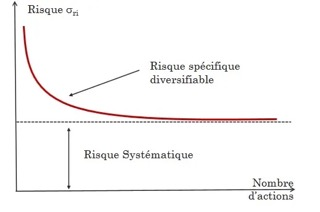

In [1483]:
from IPython.display import display, Image
jpeg_file = '24.jpeg'
display(Image(filename=jpeg_file))


 <font color="red">Single Index Model</font>

$$r_{it} = α_i + β_ir_{mt} + ε_{it}$$
$r_{it}$= partie systematique + partie non systematique

où $\alpha_i$ et $\beta_i$ sont les coefficients d'interception et de pente qui résultent de la régression du taux de rendement de l'actif $i$ à la période $t$, noté $rit$, sur le taux de rendement simultané sur un indice de marché à la période $t$, noté $rmt$; et $\epsilon_{it}$ est le terme d'erreur résiduel non expliqué pour l'actif $i$ à la période $t$.

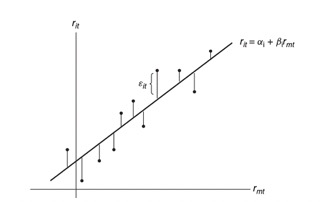

In [1484]:
from IPython.display import display, Image
jpeg_file = '13.jpeg'
display(Image(filename=jpeg_file))

$Var(r_{it})=Var(\alpha_i +\beta_i r_{mt} +\epsilon_{it}) = E[(\alpha_i +\beta_i r_{mt} +\epsilon_{it})-(E(\alpha_i +\beta_i r_{mt} +\epsilon_{it}))]^2$

$=E[\beta_ir_{mt}-\mu_m+\epsilon_{it}+2\beta_ir_{mt}-\mu_m\epsilon_{it}]$

$=\beta_i^2\sigma_m^2+\sigma_{\epsilon_i}^2$

risque total=risque systématique et spécifique



$Cov(r_i,r_j) = E[(r_i - E(r_i))(r_j - E(r_j))] = E[(\alpha_i + \beta_i r_m + \epsilon_i - E(\alpha_i + \beta_i r_m + \epsilon_i))(\alpha_j + \beta_j r_m + \epsilon_j - E(\alpha_j + \beta_j r_m + \epsilon_j))]$\
$= E[(\beta_i r_m - \beta_i E(r_m) + \epsilon_i)(\beta_j r_m - \beta_j E(r_m) + \epsilon_j)]$
$= \beta_i \beta_j E[(r_m - E(r_m))^2] = \beta_i \beta_j \sigma_m^2$ $\ \sigma_{ij} = \beta_i \beta_j \sigma_m^2$.

 <font color="orange">minimiser la somme des carrés des résidus</font>



$\hat{\beta}_i=\frac{\sum_{t=1}^T(r_{it}-\bar{r_i})(r_{mt}-\bar{r_m})}{\sum_{t=1}^T(r_{mt}-\bar{r_m})^2}$\

$\hat{\alpha}_i=\bar{r_i}-\hat{\beta}_i\bar{r_m}$\

$\hat{\sigma}^2=\frac{\sum_{t=1}^T(r_{it}-\hat{\alpha_i}-\hat{\beta_i}r_{mt})^2}{T-2}$


Intercept: 0.0051
Slope: 0.9837


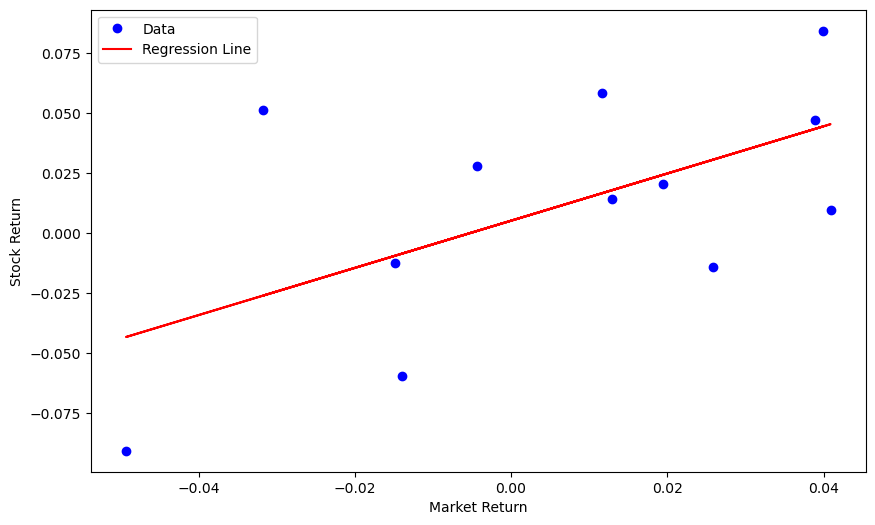

In [1485]:
df = pd.DataFrame({
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Return': [0.0206, -0.0596, 0.0142, 0.0843, 0.0469, -0.0127, 0.0513, 0.0582, 0.0095, -0.0143, -0.0908, 0.0278,],
    'Market_Return': [0.0194, -0.0140, 0.0129, 0.0399, 0.0389, -0.0148, -0.0317, 0.0116, 0.0409, 0.0259, -0.0493, -0.0043],
})

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Market_Return'], df['Return'], 'bo', label='Data')
x = df['Market_Return']
y = df['Return']
m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x + b, 'r-', label='Regression Line')

ax.set_xlabel('Market Return')
ax.set_ylabel('Stock Return')
ax.legend()

intercept = b
slope = m
print(f'Intercept: {intercept:.4f}')
print(f'Slope: {slope:.4f}')

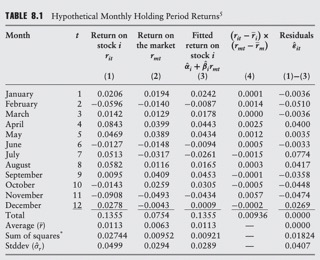

In [1486]:
from IPython.display import display, Image
jpeg_file = '14.jpeg'
display(Image(filename=jpeg_file))

In [1487]:
df = pd.DataFrame({
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Return': [0.0206, -0.0596, 0.0142, 0.0843, 0.0469, -0.0127, 0.0513, 0.0582, 0.0095, -0.0143, -0.0908, 0.0278,],
    'Market_Return': [0.0194, -0.0140, 0.0129, 0.0399, 0.0389, -0.0148, -0.0317, 0.0116, 0.0409, 0.0259, -0.0493, -0.0043],
})

df.set_index('Month',inplace=True)
df.loc['Total'] = [df["Return"][0:12].sum(axis=0),df["Market_Return"][0:12].sum(axis=0)]
df.loc['Average'] = [df["Return"][0:12].mean(),df["Market_Return"][0:12].mean()]
df.loc['Sum of squares'] = [ np.sum((df["Return"][0:12]-np.mean(df["Return"][0:12]))**2),np.sum((df["Market_Return"][0:12]-np.mean(df["Market_Return"][0:12]))**2)]
df.loc["stddev"]=[df["Return"][0:12].std(),df["Market_Return"][0:12].std()]
df

Return  Market_Return
Month                                  
January         0.020600       0.019400
February       -0.059600      -0.014000
March           0.014200       0.012900
April           0.084300       0.039900
May             0.046900       0.038900
June           -0.012700      -0.014800
July            0.051300      -0.031700
August          0.058200       0.011600
September       0.009500       0.040900
October        -0.014300       0.025900
November       -0.090800      -0.049300
December        0.027800      -0.004300
Total           0.135400       0.075400
Average         0.011283       0.006283
Sum of squares  0.027449       0.009521
stddev          0.049954       0.029421

In [1488]:
beta=np.sum((df["Return"][0:12]-np.mean(df["Return"][0:12]))*(df["Market_Return"][0:12]-np.mean(df["Market_Return"][0:12])))/df.loc["Sum of squares","Market_Return"]

beta

0.9837280908277742

In [1489]:
alpha=df.loc["Average","Return"]-beta*df.loc["Average","Market_Return"]
alpha

0.005102241829298819

In [1490]:
df["fitted return on stock i"]=alpha+beta*df["Market_Return"][0:12]

df.loc["Total","fitted return on stock i"]=df["fitted return on stock i"][0:12].sum(axis=0)
df.loc["Average","fitted return on stock i"]=df["fitted return on stock i"][0:12].mean()
df.loc["Sum of squares","fitted return on stock i"]=np.sum((df["fitted return on stock i"][0:12]-np.mean(df["fitted return on stock i"][0:12]))**2)
df.loc["stddev","fitted return on stock i"]=df["fitted return on stock i"][0:12].std()
df

Return  Market_Return  fitted return on stock i
Month                                                            
January         0.020600       0.019400                  0.024187
February       -0.059600      -0.014000                 -0.008670
March           0.014200       0.012900                  0.017792
April           0.084300       0.039900                  0.044353
May             0.046900       0.038900                  0.043369
June           -0.012700      -0.014800                 -0.009457
July            0.051300      -0.031700                 -0.026082
August          0.058200       0.011600                  0.016513
September       0.009500       0.040900                  0.045337
October        -0.014300       0.025900                  0.030581
November       -0.090800      -0.049300                 -0.043396
December        0.027800      -0.004300                  0.000872
Total           0.135400       0.075400                  0.135400
Average         0.011283       0.006283                  0.011283
Sum of squares  0.027449       0.009521                  0.009214
stddev          0.049954       0.029421                  0.028942

In [1491]:
df["Residuals"]=df["Return"]-df["fitted return on stock i"]
df

Return  Market_Return  fitted return on stock i  Residuals
Month                                                                       
January         0.020600       0.019400                  0.024187  -0.003587
February       -0.059600      -0.014000                 -0.008670  -0.050930
March           0.014200       0.012900                  0.017792  -0.003592
April           0.084300       0.039900                  0.044353   0.039947
May             0.046900       0.038900                  0.043369   0.003531
June           -0.012700      -0.014800                 -0.009457  -0.003243
July            0.051300      -0.031700                 -0.026082   0.077382
August          0.058200       0.011600                  0.016513   0.041687
September       0.009500       0.040900                  0.045337  -0.035837
October        -0.014300       0.025900                  0.030581  -0.044881
November       -0.090800      -0.049300                 -0.043396  -0.047404
December        0.027800      -0.004300                  0.000872   0.026928
Total           0.135400       0.075400                  0.135400   0.000000
Average         0.011283       0.006283                  0.011283   0.000000
Sum of squares  0.027449       0.009521                  0.009214   0.018235
stddev          0.049954       0.029421                  0.028942   0.021012

In [1492]:
import plotly.graph_objs as go

trace = go.Scatter(x=df["Market_Return"][0:12], y=df["Return"][0:12], mode='markers', marker=dict(color='blue'),name='$r_it$')
trace3 = go.Scatter(x=df["Market_Return"][0:12], y=df["fitted return on stock i"][0:12], mode='markers', marker=dict(symbol='cross', size=6, color='red'),name="estimation ")


x_fit = [min(df["Market_Return"][0:12]), max(df["fitted return on stock i"][0:12])]
y_fit = [alpha + beta*x_fit[0], alpha + beta*x_fit[1]]

trace2 = go.Scatter(x=x_fit, y=y_fit, mode='lines', line=dict(color='green'),name="regression")


fig = go.Figure(data=[trace,trace2,trace3])
fig.update_xaxes(showgrid=True, gridcolor='lightgray', zeroline=True, zerolinewidth=3)
fig.update_yaxes(showgrid=True, gridcolor='lightgray', zeroline=True, zerolinewidth=3)
fig.update_layout(
    xaxis_title='$r_it$',
    yaxis_title='$r_mt$'
)


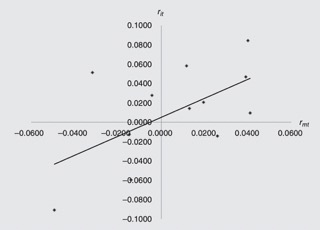

In [1493]:
from IPython.display import display, Image
jpeg_file = '15.jpeg'
display(Image(filename=jpeg_file))

In [1494]:
def single_Index(df,Return="Return",Market_Return="Market_Return",r_f=0):
    r_f=r_f
    rm_f=r_f/12

    df[Return]=df[Return]-rm_f
    df[Market_Return]=df[Market_Return]-rm_f


    df.loc['Total'] = [df[Return][0:12].sum(axis=0),df[Market_Return][0:12].sum(axis=0)]
    df.loc['Average'] = [df[Return][0:12].mean(),df[Market_Return][0:12].mean()]
    df.loc['Sum of squares'] = [ np.sum((df[Return][0:12]-np.mean(df[Return][0:12]))**2),np.sum((df[Market_Return][0:12]-np.mean(df[Market_Return][0:12]))**2)]
    df.loc["stddev"]=[df[Return][0:12].std(),df[Market_Return][0:12].std()]

    beta=np.sum((df["Return"][0:12]-np.mean(df["Return"][0:12]))*(df["Market_Return"][0:12]-np.mean(df["Market_Return"][0:12])))/df.loc["Sum of squares","Market_Return"]
    alpha=df.loc["Average","Return"]-beta*df.loc["Average","Market_Return"]

    df["fitted return on stock i"]=alpha+beta*df[Market_Return][0:12]

    df.loc["Total","fitted return on stock i"]=df["fitted return on stock i"][0:12].sum(axis=0)
    df.loc["Average","fitted return on stock i"]=df["fitted return on stock i"][0:12].mean()
    df.loc["Sum of squares","fitted return on stock i"]=np.sum((df["fitted return on stock i"][0:12]-np.mean(df["fitted return on stock i"][0:12]))**2)
    df.loc["stddev","fitted return on stock i"]=df["fitted return on stock i"][0:12].std()


    df["Residuals"]=df["Return"]-df["fitted return on stock i"]
    print("alpha: "+str(alpha)+" beta: "+str(beta))
    return df

 <font color="red">Single Index Model using Excess Returns</font>


$$R_{it} = r_{it} - r_f$$

$$r_{it} - r_f = \alpha'_i + \beta_i(r_{mt} - r_f) + \epsilon_{it$$


$$R_{it} = \alpha_i' + \beta_i R_{mt} + \epsilon_{it}$$

où $$R_{it} = r_{it} - r_f$$ $$R_{mt} = r_{mt} - r_f$$

$$\alpha'_i = \alpha_i - r_f(1 - \beta_i)$$

In [1495]:
df = pd.DataFrame({
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Return': [0.0206, -0.0596, 0.0142, 0.0843, 0.0469, -0.0127, 0.0513, 0.0582, 0.0095, -0.0143, -0.0908, 0.0278,],
    'Market_Return': [0.0194, -0.0140, 0.0129, 0.0399, 0.0389, -0.0148, -0.0317, 0.0116, 0.0409, 0.0259, -0.0493, -0.0043],
})
df.set_index('Month',inplace=True)

In [1496]:
df=single_Index(df,r_f=3/100)
df

alpha: 0.005061562056368254 beta: 0.9837280908277745


Return  Market_Return  fitted return on stock i  \
Month                                                               
January         0.018100       0.016900                  0.021687   
February       -0.062100      -0.016500                 -0.011170   
March           0.011700       0.010400                  0.015292   
April           0.081800       0.037400                  0.041853   
May             0.044400       0.036400                  0.040869   
June           -0.015200      -0.017300                 -0.011957   
July            0.048800      -0.034200                 -0.028582   
August          0.055700       0.009100                  0.014013   
September       0.007000       0.038400                  0.042837   
October        -0.016800       0.023400                  0.028081   
November       -0.093300      -0.051800                 -0.045896   
December        0.025300      -0.006800                 -0.001628   
Total           0.105400       0.045400                  0.105400   
Average         0.008783       0.003783                  0.008783   
Sum of squares  0.027449       0.009521                  0.009214   
stddev          0.049954       0.029421                  0.028942   

                   Residuals  
Month                         
January        -3.586567e-03  
February       -5.093005e-02  
March          -3.592334e-03  
April           3.994701e-02  
May             3.530735e-03  
June           -3.243066e-03  
July            7.738194e-02  
August          4.168651e-02  
September      -3.583672e-02  
October        -4.488080e-02  
November       -4.740445e-02  
December        2.692779e-02  
Total          -5.551115e-17  
Average        -3.469447e-18  
Sum of squares  1.823496e-02  
stddev          2.101164e-02

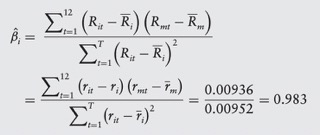

In [1497]:
from IPython.display import display, Image
jpeg_file = '16.jpeg'
display(Image(filename=jpeg_file))

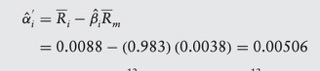

In [1498]:
from IPython.display import display, Image
jpeg_file = '17.jpeg'
display(Image(filename=jpeg_file))

 <font color="red">with Riskless Rate Can Fluctuation</font>

$$r_{it}-r_{ft}=\alpha'_i+\beta_i(r_{mt}-r_{ft})+\epsilon_{it}$$

In [1499]:
df = pd.DataFrame({
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Return': [0.0206, -0.0596, 0.0142, 0.0843, 0.0469, -0.0127, 0.0513, 0.0582, 0.0095, -0.0143, -0.0908, 0.0278,],
    'Market_Return': [0.0194, -0.0140, 0.0129, 0.0399, 0.0389, -0.0148, -0.0317, 0.0116, 0.0409, 0.0259, -0.0493, -0.0043],
    'Riskless_Rate_of_return':[0.0005, 0.0003, 0.0008, 0.0013, 0.0018, 0.0005, 0.0009, 0.0013, 0.0002, 0.0006, 0.0004, 0.0001]
})
df.set_index('Month',inplace=True)
df

Return  Market_Return  Riskless_Rate_of_return
Month                                                    
January    0.0206         0.0194                   0.0005
February  -0.0596        -0.0140                   0.0003
March      0.0142         0.0129                   0.0008
April      0.0843         0.0399                   0.0013
May        0.0469         0.0389                   0.0018
June      -0.0127        -0.0148                   0.0005
July       0.0513        -0.0317                   0.0009
August     0.0582         0.0116                   0.0013
September  0.0095         0.0409                   0.0002
October   -0.0143         0.0259                   0.0006
November  -0.0908        -0.0493                   0.0004
December   0.0278        -0.0043                   0.0001

In [1500]:
def single_Index(df,Return="Return",Market_Return="Market_Return",Riskless_rate_of_return="Riskless_Rate_of_return"):


    df[Return]=df[Return]-df[Riskless_rate_of_return]
    df[Market_Return]=df[Market_Return]-df[Riskless_rate_of_return]

    df.loc['Total'] = [df[Return][0:12].sum(axis=0),df[Market_Return][0:12].sum(axis=0),df[Riskless_rate_of_return][0:12].sum(axis=0)]
    df.loc['Average'] = [df[Return][0:12].mean(),df[Market_Return][0:12].mean(),df[Riskless_rate_of_return][0:12].mean()]
    df.loc['Sum of squares'] = [ np.sum((df[Return][0:12]-np.mean(df[Return][0:12]))**2),np.sum((df[Market_Return][0:12]-np.mean(df[Market_Return][0:12]))**2), np.sum((df[Riskless_rate_of_return][0:12]-np.mean(df[Riskless_rate_of_return][0:12]))**2)]
    df.loc["stddev"]=[df[Return][0:12].std(),df[Market_Return][0:12].std(),df[Riskless_rate_of_return][0:12].std()]

    beta=np.sum((df["Return"][0:12]-np.mean(df["Return"][0:12]))*(df["Market_Return"][0:12]-np.mean(df["Market_Return"][0:12])))/df.loc["Sum of squares","Market_Return"]
    alpha=df.loc["Average","Return"]-beta*df.loc["Average","Market_Return"]

    df["fitted return on stock i"]=alpha+beta*df[Market_Return][0:12]

    df.loc["Total","fitted return on stock i"]=df["fitted return on stock i"][0:12].sum(axis=0)
    df.loc["Average","fitted return on stock i"]=df["fitted return on stock i"][0:12].mean()
    df.loc["Sum of squares","fitted return on stock i"]=np.sum((df["fitted return on stock i"][0:12]-np.mean(df["fitted return on stock i"][0:12]))**2)
    df.loc["stddev","fitted return on stock i"]=df["fitted return on stock i"][0:12].std()


    df["Residuals"]=df["Return"]-df["fitted return on stock i"]
    print("alpha: "+str(alpha)+" beta: "+str(beta))
    return df

single_Index(df)

alpha: 0.005156257144836897 beta: 0.9718877700443369


Return  Market_Return  Riskless_Rate_of_return  \
Month                                                              
January         0.020100       0.018900                 0.000500   
February       -0.059900      -0.014300                 0.000300   
March           0.013400       0.012100                 0.000800   
April           0.083000       0.038600                 0.001300   
May             0.045100       0.037100                 0.001800   
June           -0.013200      -0.015300                 0.000500   
July            0.050400      -0.032600                 0.000900   
August          0.056900       0.010300                 0.001300   
September       0.009300       0.040700                 0.000200   
October        -0.014900       0.025300                 0.000600   
November       -0.091200      -0.049700                 0.000400   
December        0.027700      -0.004400                 0.000100   
Total           0.126700       0.066700                 0.008700   
Average         0.010558       0.005558                 0.000725   
Sum of squares  0.027102       0.009393                 0.000003   
stddev          0.049637       0.029221                 0.000515   

                fitted return on stock i     Residuals  
Month                                                   
January                         0.023525 -3.424936e-03  
February                       -0.008742 -5.115826e-02  
March                           0.016916 -3.516099e-03  
April                           0.042671  4.032887e-02  
May                             0.041213  3.886707e-03  
June                           -0.009714 -3.486374e-03  
July                           -0.026527  7.692728e-02  
August                          0.015167  4.173330e-02  
September                       0.044712 -3.541209e-02  
October                         0.029745 -4.464502e-02  
November                       -0.043147 -4.805343e-02  
December                        0.000880  2.682005e-02  
Total                           0.126700 -2.775558e-17  
Average                         0.010558  0.000000e+00  
Sum of squares                  0.008872  1.823006e-02  
stddev                          0.028400  2.123715e-02

<font color="orange">0.972<0.983, Lorsque le taux d’intérêt sans risque fluctue au fil du temps, la covariance entre le rendement excédentaire de l’actif i et celui du marché est affectée. Comme la variation du taux de rendement sans risque est généralement beaucoup plus faible que les variations des rendements, l’impact sur l’estimation du coefficient de pente bêta est faible. Donc la différence entre les deux estimations de pente bêta dans les 2 dernières équations est faible</font>

### 6.b Efficient Frontier with single index model

Le rendement d'un portefeuille est défini comme suit :`

$$r_{pt} = \sum_{i=1}^{n} w_ir_{it}$$


$$r_{pt} = \sum_{i=1}^{n} w_i(\alpha_i + \beta_iwr_{mt} + \epsilon_{it})$$

$$r_{pt} = \sum_{i=1}^{n} w_i(\alpha_i + \epsilon_{it}) + (\sum_{i=1}^{n} w_i\beta_i)r_{mt}$$

<font color="orange">On peut décomposer le rendement d’un portefeuille:</font>

<font color="orange">d’un investissement dans les caractéristiques de base du titre, c'est-à-dire $w_i(\alpha_i+\epsilon_i)$. $\alpha_i$ décrit le rendement d'un investissement qui ne peut pas être expliqué par les facteurs du marché. Plus précisément, l'alpha représente le rendement excédentaire d'un investissement par rapport à son indice de référence,</font>

<font color="orange">Un **investissement dans l'indice**, c'est-à-dire $w_i(\beta_i r_{mt})$. le coefficient bêta $\beta_i$  est utilisé pour mesurer la **sensibilité du rendement de l'actif** $i$  à celui de l'indice de marché $r_{mt}$. avec $w_i$($\beta_i r_{mt}$) qui représente la **part de l'investissement du portefeuille qui est exposée aux fluctuations de l'indice de marché**. Cette expression représente la **contribution de l'actif $i$  aux variations du portefeuille dues aux fluctuations de l'indice de marché**.</font>


$$r_{mt} = E(r_m) + \epsilon_{mt} = \alpha_{n+1} + \epsilon_{n+1,t}$$


<font color="orange">où $E(r_m) = α_{n+1}$ est une constante qui estime le taux de rendement attendu de l'indice de marché et $ε_{mt} = ε_{n+1,t}$ est un terme d'erreur aléatoire ayant une moyenne de zéro qui mesure les fluctuations périodiques de $r_{mt}$ autour de $α_{n+1}$.</font>


<font color="orange">Le terme $w_{n+1}$ représente le **poids du titre artificiel qui représente l'indice dans le portefeuille**. Pour faciliter les calculs: $w_{n+1} = \sum_{i=1}^{n} w_i\beta_i$</font>

$$r_{pt} = \sum_{i=1}^{n}w_i(\alpha_i +  \epsilon_{it})+w_{n+1}(\alpha_{n+1} + \epsilon_{n+1,t})$$

<font color="orange">le rendement du portefeuille est une combinaison de n titres individuels et d'un investissement dans l'indice.</font>

$$r_{pt} = \sum_{i=1}^{n+1}w_i(\alpha_i+\epsilon_{i,t})$$

$$E(r_{pt}) = E[\sum_{i=1}^{n+1}w_i(\alpha_i+\epsilon_{i,t})]$$
$$E(r_{pt}) = \sum_{i=1}^{n+1}w_i\alpha_i$$

$$Var(r_{pt})=\sigma^2=E[(r_{pr}-E(r_{pt})^2]=E[(\sum_{i=1}^{n+1}w_i(\alpha_i+\epsilon_{i,t})- \sum_{i=1}^{n+1}w_i\alpha_i)^2]=E[(\sum_{i=1}^{n+1}w_i\epsilon_{i,t})^2]=Var(\sum_{i=1}^{n+1}w_i\epsilon_{i,t})$$

$$\sigma_p^2 = \sum_{i=1}^{n+1} w_i^2 \sigma_{\epsilon_i}^2+ \sum_{i=1}^{n+1} \sum_{j=1}^{n+1} w_i w_j Cov(\epsilon_{it}, \epsilon_{jt})$$

$$Cov(\epsilon_i, \epsilon_j) = 0$$ $$\sigma_p^2 = \sum_{i=1}^{n+1} w_i^2 \sigma_{\epsilon_i}^2$$



$$ Min\ \sigma_p^2 = \sum_{i=1}^{n+1} w_i^2 \sigma_{\epsilon_i}^2$$

$$avec\ les\ contraintes:\ \sum_{i=1}^{n}w_i=1,  \sum_{i=1}^{n}w_i\beta_i=w_{n+1}, \sum_{i=1}^{n+1}w_i\alpha_i=E(r_p)$$

$$Min\ L=(1/2)\sum_{i=1}^{n+1} w_i^2 \sigma_{\epsilon_i}^2+ \lambda_1 (E(r_p)-\sum_{i=1}^{n+1}w_i\alpha_i)+\lambda_2(1- \sum_{i=1}^{n}w_i)+\lambda3(w_{n+1}-\sum_{i=1}^{n}w_i\beta_i)$$

$$Minimize \ L= (1/2)w^T \Sigma_{\epsilon} w$$
$$avec\ $w^T \alpha = E(r_p)$,\ $w^T l = 1 $,\ $w'^T \beta = 0$$

 $$\alpha= \begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_n \\ \alpha_{n+1} \end{pmatrix}$$
 $$\beta$= \begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n \\ -1 \end{pmatrix}$$
  $$w= \begin{pmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \\ w_{n+1} \end{pmatrix}$$
 $$l= \begin{pmatrix} 1 \\ 1 \\ \vdots \\ 1 \\ 0 \end{pmatrix}$$
$$\Sigma_{\epsilon}=\begin{pmatrix} \sigma_{\epsilon_1}^2 & 0 & \dots & 0 & 0 \\
0 & \sigma_{\epsilon_2}^2 & \dots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \dots & \sigma_{\epsilon_n}^2 & 0 \\
0 & 0 & \dots & 0 & \sigma_{m}^2 \end{pmatrix}$$
où $n$ est le nombre d'actifs et $\epsilon_i$ est l'erreur de prédiction pour l'actif $i$.

$$Minimize \ L= (1/2)w^T\Sigma_{\epsilon}w +\lambda_1(E(r_p)-w^T\alpha)+\lambda_2(1-w^Tl)+\lambda_3(w^T\beta)$$

$$w= \Sigma_{\epsilon}^{-1}[\ \alpha\ \beta\ l]G^-1[E(r_p)\ 1\ O]^T$$
$$G=[\ \alpha\ \beta\ l]^T\Sigma_{\epsilon}^{-1}[\ \alpha\ \beta\ l]$$

In [1501]:
er=np.array([2.40,1.37,0.76])
cov=[
    [20.35,6.63,4.23],
    [6.63,21.60,5.53],
    [4.23,5.53,23.65]
]

In [1502]:

alpha=[1.488,0.359,-0.253]
beta=[0.959,1.055,1.065]
var_error=[15.42,15.59,17.51]

E_rm=0.954
var_rm=6.08

E_rp=1.20

def Index_model_op(alpha,beta,var_error,E_rm,var_rm,E_rp):

    E_rp=E_rp
    alpha.append(E_rm)
    beta.append(-1)

    l=list(np.ones(len(beta)-1))
    l.append(0)

    var_error.append(var_rm)
    var = np.zeros((len(var_error), len(var_error)))
    np.fill_diagonal(var, var_error)

    alb=np.column_stack((alpha,l,beta))

    G=alb.T.dot(np.linalg.inv(var).dot(alb))

    weights=np.linalg.inv(var).dot(alb.dot(np.linalg.inv(G).dot(np.array([E_rp,1,0]).T)))
    return weights[:-1]

weigts=Index_model_op(alpha,beta,var_error,E_rm, var_rm, 1.2)
weigts


array([0.12579183, 0.3829416 , 0.49126657])

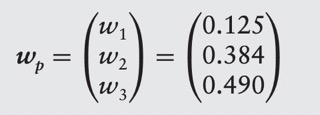

In [1503]:
from IPython.display import display, Image
jpeg_file = '18.jpeg'
display(Image(filename=jpeg_file))

In [1504]:
erk.portfolio_vol(weigts,cov)

3.5269695536648884

### 6.c Factor Models

 <font color="orange">L'idée est que les rendements peuvent être influencés par des facteurs communs qui affectent plusieurs actifs simultanément. Ces facteurs peuvent représenter des variables macroéconomiques telles que le taux d'intérêt, le taux de croissance économique, l'inflation, ou des facteurs sectoriels tels que les rendements du secteur technologique, des matières premières...</font>

 <font color="orange">Alpha représente le rendement excédentaire non expliqué par les facteurs, les facteurs sont les variables qui influencent les rendements et les Betas (β) sont les coefficients qui mesurent la sensibilité de l'actif à chaque facteur.</font>

$$R_i = \beta_1 f_1 + \beta_2 f_2 + ... + \beta_3 f_3 + \alpha + \epsilon \ $$


où :

$R_i$ : le rendement
$\beta$ : multiplicateur
$f$ : rendement d'un facteur
$\alpha$ : composante fixe
$\epsilon$ : terme d'erreur, la partie du rendement que les facteurs ne peuvent pas expliquer.

<font color="red">CAPM</font>:

<font color="orange">CAPM montre que la relation entre la rentabilité espérée d’un titre quelconque et son risque est linéaire, </font>

<font color="orange">les Hypothèses du CAPM:</font>

<font color="orange">- Les investisseurs évaluent les portefeuilles en terme d’espérance et de variance des rentabilités sur une période, Le marché est parfait, Les investisseurs ont accès aux mêmes opportunités d’investissement, Les anticipations de rendement sont identiques</font>

$$E(r_i) - r_f = \frac{cov(r_i, r_m)(E(r_m) - r_f)}{var(r_m)}$$

$$E(r_i) - r_f = \beta_i(E(r_m) - r_f)$$

• $E(r_i) - r_f$ : rendement excédentaire de l'actif i par rapport au taux sans risque rf
• $E(r_m) - r_f$ : rendement excédentaire du marché m par rapport au taux sans risque
• $β_i$ : le coefficient bêta pour l'actif i. β est une mesure de la volatilité d'un titre ou d'un portefeuille par rapport au marché dans son ensemble.
• $cov(r_i,r_m)$ : covariance du rendement de l'actif i et du rendement du marché m.
• $var(r_m)$ : la variance du rendement du marché m.



In [1505]:
brka_d = pd.read_csv("data/brka_d_ret.csv", parse_dates=True, index_col=0)
brka_d.head()

BRKA
DATE                
1990-01-02 -0.005764
1990-01-03  0.000000
1990-01-04  0.005797
1990-01-05 -0.005764
1990-01-08  0.000000

In [1506]:
brka_d.tail()

BRKA
DATE                
2018-12-24 -0.018611
2018-12-26  0.043200
2018-12-27  0.012379
2018-12-28  0.013735
2018-12-31  0.011236

In [1507]:
brka_m = brka_d.resample('M').apply(erk.compound).to_period('M')
brka_m.head()

BRKA
DATE             
1990-01 -0.140634
1990-02 -0.030852
1990-03 -0.069204
1990-04 -0.003717
1990-05  0.067164

In [1508]:
def get_fff_returns():

    rets = pd.read_csv("data/F-F_Research_Data_Factors_m.csv",
                       header=0, index_col=0, na_values=-99.99)/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets

brka_m.to_csv("brka_m.csv")

fff = get_fff_returns()
fff.head()

Mkt-RF     SMB     HML      RF
1926-07  0.0296 -0.0230 -0.0287  0.0022
1926-08  0.0264 -0.0140  0.0419  0.0025
1926-09  0.0036 -0.0132  0.0001  0.0023
1926-10 -0.0324  0.0004  0.0051  0.0032
1926-11  0.0253 -0.0020 -0.0035  0.0031

$$ R_{brka,t} - R_{f,t} = \alpha + \beta(R_{mkt,t} - R_{f,t}) + \epsilon_t $$

on décompose le BRKA observé dans la partie qui est due au marché et le reste qui n’est pas due au marché, en utilisant le CAPM comme modèle explicatif.



In [1554]:
import statsmodels.api as sm
brka_excess = brka_m["1990":"2012-05"] - fff.loc["1990":"2012-05", ['RF']].values
mkt_excess = fff.loc["1990":"2012-05",['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1
exp_var

Mkt-RF  Constant
1990-01 -0.0785         1
1990-02  0.0111         1
1990-03  0.0183         1
1990-04 -0.0336         1
1990-05  0.0842         1
...         ...       ...
2012-01  0.0505         1
2012-02  0.0442         1
2012-03  0.0311         1
2012-04 -0.0085         1
2012-05 -0.0619         1

[269 rows x 2 columns]

In [1510]:
lm = sm.OLS(brka_excess, exp_var).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BRKA   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     48.45
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.62e-11
Time:                        11:33:21   Log-Likelihood:                 388.47
No. Observations:                 269   AIC:                            -772.9
Df Residuals:                     267   BIC:                            -765.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5402      0.078      6.961      0.000       0.387       0.693
Constant       0.0061      0.004      1.744      0.082      -0.001       0.013
==============================================================================
Omnibus:                       45.698   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.573
Skew:                           0.825   Prob(JB):                     5.33e-23
Kurtosis:                       5.535   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color="orange">Cela implique que le benchmark CAPM se compose de 46 centimes en bons du Trésor et de 54 centimes sur le marché. Chaque dollar dans le portefeuille de Berkshire Hathaway est équivalent à 46 cents en bons du Trésor et à 54 cents sur le marché. BH ajoute (c'est-à-dire a un alpha de) 0,61 % par mois.</font>

<font color="red">Fama-French</font>:

<font color="orange">The Fama-French model est une extension du CAPM</font>

$$E[r_i] = rf + \beta_{i,MKT}E[r_m - r_f] + \beta_{i,SMB}E[SMB] + \beta_{i,HML}E[HML]$$

<font color="orange">Les trois facteurs principaux du modèle Fama-French sont les suivants :</font>

<font color="orange">Facteur de taille (SMB - Small Minus Big) :
Mesure la différence de rendement entre les petites capitalisations boursières (small caps) et les grandes capitalisations boursières (large caps). L'idée est que les actions de petites entreprises peuvent générer des rendements excessifs par rapport à celles des grandes entreprises en raison de facteurs spécifiques liés à la taille de l'entreprise.</font>

<font color="orange">Facteur de valorisation (HML - High Minus Low) :
Ce facteur représente la différence de rendement entre les actions à valeur élevée (value stocks) et les actions à faible valeur (growth stocks). L'hypothèse est que les actions à faible valorisation peuvent générer des rendements excessifs par rapport à celles à haute valorisation.</font>

<font color="orange">Facteur de sensibilité au marché (RMRF - Risk-Free Minus Risk-Free) :
Ce facteur capture la sensibilité des rendements des actifs au rendement du marché global.</font>

$MKT$: facteur de marché
$SMB$: actions de petites capitalisations moins actions de grandes capitalisations
$HML$: actions à forte valeur comptable / prix (value) moins actions à faible valeur comptable / prix (growth)

Fama et French interprètent l'effet des actions de petites capitalisations et l'effet value comme étant des facteurs systématiques. $SMB$ et $HML$ sont des portefeuilles à coût nul, de sorte que les facteurs $\beta_{i,SMB}$ et $\beta_{i,HML}$ sont centrés autour de zéro.

In [1511]:
exp_var["Value"] = fff.loc["1990":"2012-05",['HML']]
exp_var["Size"] = fff.loc["1990":"2012-05",['SMB']]
exp_var.head()

Mkt-RF  Constant   Value    Size
1990-01 -0.0785         1  0.0087 -0.0129
1990-02  0.0111         1  0.0061  0.0103
1990-03  0.0183         1 -0.0290  0.0152
1990-04 -0.0336         1 -0.0255 -0.0050
1990-05  0.0842         1 -0.0374 -0.0257

In [1512]:
lm = sm.OLS(brka_excess, exp_var).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BRKA   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     36.06
Date:                Fri, 12 May 2023   Prob (F-statistic):           1.41e-19
Time:                        11:33:21   Log-Likelihood:                 412.09
No. Observations:                 269   AIC:                            -816.2
Df Residuals:                     265   BIC:                            -801.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.6761      0.074      9.155      0.000       0.531       0.821
Constant       0.0055      0.003      1.679      0.094      -0.001       0.012
Value          0.3814      0.109      3.508      0.001       0.167       0.595
Size          -0.5023      0.101     -4.962      0.000      -0.702      -0.303
==============================================================================
Omnibus:                       42.261   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.954
Skew:                           0.904   Prob(JB):                     1.75e-15
Kurtosis:                       4.671   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

L’alpha est passé de 0,61% à environ 0,55% par mois.  le marché est passé de 0,54 à 0,67.

La nouvelle façon d’interpréter chaque dollar investi dans Hathaway est: 67 cents sur le marché, 38 cents en actions de valeur.

## 7 - Black-Litterman model

<font color="orange">Le modèle de Black-Litterman est un modèle d'optimisation de portefeuille qui vise à combiner les **prévisions du marché** avec les **opinions personnelles** de l'investisseur pour obtenir une allocation optimale des actifs.</font>

<font color="orange">Plutôt que d’imposer à l’investisseur d’avoir des anticipations sur tous les actifs (**connaitre le vecteur μ**), le modèle BL va se contenter de lui demander son ”opinion” (ou s**es opinions) sur (certains) actifs**.</font>

<font color="orange">Le modèle permet de combiner **anticipations et optimisation** donc de mixer les **opinions** et les **informations issues des données**.</font>


$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
$$f_{X|Y}(x|Y=y) = \frac{f_{Y|X}(y|X=x) f_X(x)}{f_Y(y)}$$

$$f_{X|Y}(x|Y=y) \propto \ f_{Y|X}(y|X=x) f_X(x)$$

$$X \sim \mathcal{N}_n(\mu, \Sigma)\ f_X(x)=f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{n/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu})\right)$$


Modèle de Markowitz $\boldsymbol{\mu}$ et $\boldsymbol{\Sigma}$ déterministes.
Modèle BL : $\boldsymbol{\Sigma}$ connu, $\boldsymbol{\mu}$ est inconnu $\Rightarrow \ \hat{\boldsymbol{\mu}}$ (V.A).
Le but : estimer  $\hat{\boldsymbol{\mu}} \left(\Leftrightarrow \hat{\boldsymbol{\pi}} = \hat{\boldsymbol{\mu}} - r_f 1_{\text{R^n}}\right)$ à partir de 2 sources d'informations :
1. Les vues
2. Le portefeuille d'équilibre.

<font color="orange">vue absolue: Je suis sûr à 70% que le rendement de l’action Orange baissera d’ici la fin du mois de 2%.
vue relative: Je suis certain que l’action Air-France-KLM sous-performera l’action Société Générale de 1%</font>

<font color="orange">Chaque vue émise se traduit mathématiquement par un portefeuille dit "**portefeuille de vue**”</font>

<font color="orange">La somme des composantes dans le portefeuille de vue absolue est égale à 1.</font>
<font color="orange">La somme des composantes dans le portefeuille de vue relative est égale à 0. Dans ce cas</font>

L'investisseur émet $k$ vues sur les $n$ actifs du marché. Il rassemble ses vues matriciellement (matrice de vues) avec la relation suivante :
$$P\hat{\boldsymbol{\pi}} = \mathbf{q} + \boldsymbol{\epsilon},$$
où
- $\boldsymbol{\epsilon} \sim \mathcal{N}_k(\mathbf{0}_k, \boldsymbol{\Omega})$,
- $\boldsymbol{\Omega}$ est une matrice diagonale,
- $P$ est une matrice $k \times n$ et
- $\mathbf{q}$ est un vecteur $k$-dimensionnel.

Exemple:

-l’actif 1 aura une prime de risque de  <font color="green">5%</font> (incertitude de la vue <font color="red">20%</font>)
-l’actif 2 sur-performera l’actif 7 de <font color="green">1.5%</font> (confiance de la vue 50%, incertitude de la vue <font color="red">50%</font>)
-l’actif 4 sur-performera la somme des actifs 3 et 5 de<font color="green">2%</font> (confiance de la vue 70%,incertitude de la vue <font color="red">30%</font> )

La matrice $P$ est définie comme suit :
$$P = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & -1 \\ 0 & 0 & 0 & -1/2 & 1 & -1/2 & 0 \end{bmatrix}$$

<font color="green">Le vecteur</font> $\mathbf{q}$ est défini comme suit :
$$\mathbf{q} = \begin{bmatrix} 0.05 \\ 0.015 \\ 0.02 \end{bmatrix}$$

La  <font color="red">matrice diagonale</font> $\boldsymbol{\Omega}$est définie comme suit :
$$\boldsymbol{\Omega} = \begin{bmatrix} 0.2 & 0 & 0 \\ 0 & 0.5 & 0 \\ 0 & 0 & 0.3 \end{bmatrix}$$
où les éléments de la diagonale représentent les variances des erreurs pour chaque vue.

<font color="orange">La view distribution est une distribution de probabilité qui reflète les convictions d'un investisseur sur les rendements d'un ensemble d'actifs, modélisée comme une distribution normale multivariée, avec une moyenne correspondant aux vues de l'investisseur ($q$) et une matrice de covariance représentant l'incertitude associée à ces vues ($\Omega$).</font>

On a la relation suivante :
$$PE(r)=P\hat{\boldsymbol{\pi}} = \mathbf{q} + \boldsymbol{\epsilon} \sim \mathcal{N}_k(\mathbf{0}_k, \boldsymbol{\Omega})$$

On remarque que $P\hat{\boldsymbol{\pi}}$  <font color="red">(View distribution)</font> suit une loi gaussienne $P\hat{\boldsymbol{\pi}} \sim \mathcal{N}_k(\mathbf{q}, \boldsymbol{\Omega})$, d'où :
$$f_{P\hat{\boldsymbol{\pi}}}(Py) = \frac{1}{(2\pi)^{k/2}|\boldsymbol{\Omega}|^{1/2}} \exp \left\{ -\frac{1}{2} (P\mathbf{y} - \mathbf{q})^T \boldsymbol{\Omega}^{-1} (P\mathbf{y} - \mathbf{q}) \right\}$$


CAPM pour estimer le rendement excédentaire prévu du portefeuille d’équilibre:
$$E(r_i) - r_f = \beta_i(E(r_M) - r_f)$$

$$\pi_i = E(r_i) - r_f $$
$$\pi_i = \beta_i(E(r_M) - r_f) $$
$$\pi_i = \frac{\text{cov}(r_i,r_M)}{\sigma_M^2}(E(r_M) - r_f)$$
$$\pi_i = \frac{(E(r_M) - r_f)}{\sigma_M^2}\text{cov}(r_i,r_M)$$
$$w_M = \frac{(E(r_M) - r_f)}{\sigma_M^2 } \sum_j \text{cov}(r_i,r_j) w_{bj}$$\
$$\delta = (E(r_M) - r_f)/{\sigma_M^2}$$\

$$\Huge \pi = \delta\Sigma w$$



Black et Litterman font l'hypothèse suivante :
$$ \prod| E(r)=\boldsymbol{\pi} | \hat{\boldsymbol{\pi}} \sim \mathcal{N}_n(\hat{\boldsymbol{\pi}}, \tau \boldsymbol{\Sigma})$$

$ \prod $:  rendement excédentaire attendu du portefeuille d’équilibre


La densité de probabilité de la distribution <font color="red">(Prior equilibrum distribution)</font> est donnée par :

<font color="orange">La prior equilibrium distribution fait référence à la distribution des rendements attendus sur les actifs avant que l'investisseur ne formule ses vues et n'ajuste sa position. Elle représente l'état d'équilibre du marché avant que l'investisseur n'ajoute ses propres hypothèses ou vues.</font>

$$f_{\boldsymbol{\pi} |\hat{\boldsymbol{\pi}}}(x | \hat{\boldsymbol{\pi}} = y) = \frac{1}{(2\pi)^{n/2}|\tau\boldsymbol{\Sigma}|^{1/2}} \exp \left\{ -\frac{1}{2} (x - y)^T (\tau\boldsymbol{\Sigma})^{-1} (x - y) \right\}$$

$$
\Large f_{\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}}(y|\hat{\boldsymbol{\pi}}=x) \propto \Large f_{\boldsymbol{\pi}|\hat{\boldsymbol{\pi}}}(x|\hat{\boldsymbol{\pi}}=y) f_{\hat{\boldsymbol{\pi}}}(y)
$$

$$\Large f_{\hat{\boldsymbol{\pi}}}(y)=f_{P\hat{\boldsymbol{\pi}}}(Py)$$

$$
\Large f_{\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}}(y|\hat{\boldsymbol{\pi}}=x) \propto \Large f_{\boldsymbol{\pi}|\hat{\boldsymbol{\pi}}}(x|\hat{\boldsymbol{\pi}}=y) f_{P\hat{\boldsymbol{\pi}}}(Py)
$$

$$ f_{\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}}(y|\hat{\boldsymbol{\pi}}=x) \propto \exp \left\{  -\frac{1}{2} (x - y)^T (\tau\boldsymbol{\Sigma})^{-1} (x - y)-\frac{1}{2} (P\mathbf{y} - \mathbf{q})^T \boldsymbol{\Omega}^{-1} (P\mathbf{y} - \mathbf{q}) \right\}$$

$H=(\tau\boldsymbol{\Sigma})^{-1}+{P}^T\boldsymbol{\Omega}^{-1}P\ $\
$H^T=(\tau\boldsymbol{\Sigma})^{-1}+({P}^T\boldsymbol{\Omega}^{-1}P)^T=H $\
$A=x^T(\tau\boldsymbol{\Sigma})^{-1}x +{q}^T\boldsymbol{\Omega}^{-1}q$\
$C=(\tau\boldsymbol{\Sigma})^{-1}x+{P}^T\boldsymbol{\Omega}^{-1}q$

$$f_{\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}}(y|\hat{\boldsymbol{\pi}}=x) \propto exp[  -\frac{1}{2} (Hy - C)^TH^{-1}(Hy - C)]exp[  -\frac{1}{2} (-C^TH^{-1}C+A)]$$
$$f_{\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}}(y|\hat{\boldsymbol{\pi}}=x) \propto exp[  -\frac{1}{2} (Hy - C)^TH^{-1}(Hy - C)]$$\
$(y-H^{-1}C)^TH^T=(H(y-H^{-1}C))^T=(Hy-HH^{-1}C)^T=(Hy-C)^T$
$$f_{\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}}(y|\hat{\boldsymbol{\pi}}=x)\propto exp[  -\frac{1}{2} (y - H^{-1}C)^TH^{T}H^{-1}H(y - H^{-1}C)]$$

$$f_{\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}}(y|\hat{\boldsymbol{\pi}}=x) \propto exp[  -\frac{1}{2} (y - H^{-1}C)^TH(y - H^{-1}C)]$$

$$\hat{\boldsymbol{\pi}}|\boldsymbol{\pi}  \sim \mathcal{N}_n(H^{-1}C,H^{-1})$$


$$\hat{\boldsymbol{\pi}_{BL}=H^{-1}C=[(\tau\boldsymbol{\Sigma})^{-1}+{P}^T\boldsymbol{\Omega}^{-1}P]^{-1}[(\tau\boldsymbol{\Sigma}^{-1}\pi+{P}^T\boldsymbol{\Omega}^{-1}q]$$

$$\Large \Sigma_{BL}=\Sigma +H^{-1}=\Sigma +[(\tau\boldsymbol{\Sigma})^{-1}+{P}^T\boldsymbol{\Omega}^{-1}P]^{-1}$$



$$\Large \mu^{BL} = \pi + \tau \Sigma P^T[(P \tau \Sigma P^T) + \Omega]^{-1}[Q - P \pi]$$



$$\Large \Sigma^{BL} = \Sigma + \tau \Sigma - \tau\Sigma P^T(P \tau \Sigma P^T + \Omega)^{-1} P \tau \Sigma$$

In [1513]:
def as_colvec(x):
    if (x.ndim == 2):
        return x
    else:
        return np.expand_dims(x, axis=1)

print(np.arange(4))

[0 1 2 3]


In [1514]:
print(as_colvec(np.arange(4)))

[[0]
 [1]
 [2]
 [3]]


In [1515]:
def implied_returns(delta, sigma, w):

    ir = delta * sigma.dot(w).squeeze()
    ir.name = 'Implied Returns'
    return ir

si l’investisseur n’a pas de moyen spécifique de quantifier explicitement l’incertitude associée à la vue dans la matrice $\Omega$, on pourrait faire l’hypothèse simplificatrice que $\Omega$ est proportionnel à la variance du précédent.

$$\Omega = diag(P (\tau \Sigma) P^T) $$



In [1516]:
def proportional_prior(sigma, tau, p):
    helit_omega = p.dot(tau * sigma).dot(p.T)
    return pd.DataFrame(np.diag(np.diag(helit_omega.values)),index=p.index, columns=p.index)


In [1517]:
from numpy.linalg import inv
def bl(w_prior, sigma_prior, p, q,
                omega=None,
                delta=2.5, tau=.02):
    if omega is None:
        omega = proportional_prior(sigma_prior, tau, p)

    N = w_prior.shape[0]
    K = q.shape[0]
    pi = implied_returns(delta, sigma_prior,  w_prior)
    sigma_prior_scaled = tau * sigma_prior

    mu_bl = pi + sigma_prior_scaled.dot(p.T).dot(inv(p.dot(sigma_prior_scaled).dot(p.T) + omega).dot(q - p.dot(pi).values))

    sigma_bl = sigma_prior + sigma_prior_scaled - sigma_prior_scaled.dot(p.T).dot(inv(p.dot(sigma_prior_scaled).dot(p.T) + omega)).dot(p).dot(sigma_prior_scaled)
    return (mu_bl, sigma_bl)

### Exemple: Absolute Views

portfolio composé de 2 actifs: Intel (INTC) et Pfizer (PFE).

Supposons qu'Intel a une capitalisation boursière 80 milliards de dollars et que Pfizer 100 milliards de dollars

un portefeuille pondéré par la capitalisation boursière,on a les pondérations suivantes pour INTC et PFE : W_{INTC} = 80/180 = 44 %, W_{PFE} = 100/180 = 56 %.


In [1518]:
tickers = ['INTC', 'PFE']
s = pd.DataFrame([[46.0, 1.06], [1.06, 5.33]], index=tickers, columns=tickers) *  10E-4
s

INTC      PFE
INTC  0.04600  0.00106
PFE   0.00106  0.00533

In [1519]:
pi = implied_returns(delta=2.5, sigma=s, w=pd.Series([.44, .56], index=tickers))
pi

INTC    0.052084
PFE     0.008628
Name: Implied Returns, dtype: float64

Ainsi les rendements implicites d’équilibre pour INTC sont un peu plus de 5% et un peu moins de 1% pour PFE.

Supposons que l’investisseur pense qu’Intel retournera 2% et que Pfizer est sur le point de rebondir, et retournera 4%.


$$ W_{MSR} = \frac{\Sigma^{-1}\mu_e}{\bf{1}^T \Sigma^{-1}\mu_e} $$



In [1520]:
def inverse(d):
    return pd.DataFrame(inv(d.values), index=d.columns, columns=d.index)

def w_msr(sigma, mu, scale=True):
    w = inverse(sigma).dot(mu)
    if scale:
        w = w/sum(w)
    return w

In [1521]:
mu_exp = pd.Series([.02, .04],index=tickers) #  Intel will return 2% and that Pfizer is poised to rebounce, and will return 4%
mu_exp

INTC    0.02
PFE     0.04
dtype: float64

In [1522]:
np.round(w_msr(s, mu_exp)*100, 2)

INTC     3.41
PFE     96.59
dtype: float64

Text(0.5, 1.0, 'Répartition des actifs avec markowitz')

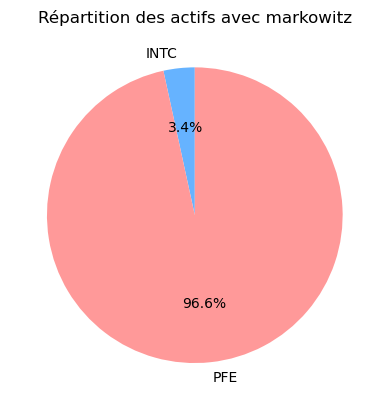

In [1523]:
proportions = np.round(w_msr(s, mu_exp)*100, 2)
labels = ['INTC', 'PFE']
colors = ['#66b3ff', '#ff9999']
plt.pie(proportions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des actifs avec markowitz')

In [1524]:
q = pd.Series({'INTC': 0.02, 'PFE': 0.04})
p = pd.DataFrame([

    {'INTC': 1, 'PFE': 0},
    {'INTC': 0, 'PFE': 1}
    ])

# Black Litterman Expected Returns
bl_mu, bl_sigma = bl(w_prior=pd.Series({'INTC':.44, 'PFE':.56}), sigma_prior=s, p=p, q=q)

bl_mu

INTC    0.037622
PFE     0.024111
dtype: float64

In [1525]:
w_msr(bl_sigma, bl_mu)

INTC    0.140692
PFE     0.859308
dtype: float64

Text(0.5, 1.0, 'Répartition des actifs avec BL')

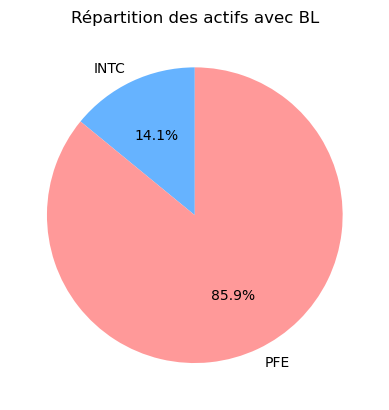

In [1526]:
proportions = w_msr(bl_sigma, bl_mu)
labels = ['INTC', 'PFE']
colors = ['#66b3ff', '#ff9999']
plt.pie(proportions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des actifs avec BL')

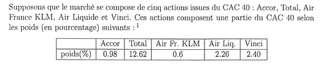

In [1527]:
from IPython.display import display, Image
jpeg_file = '21.jpeg'
display(Image(filename=jpeg_file))

In [1528]:
stock_CAC40=pd.DataFrame({
    "Accor":[0.98],
    "Total":[12.62],
    "Air Fr. KLM":[0.6],
    "Air liq":[2.26],
    "Vinci":[2.40],
})
stock_CAC40

Accor  Total  Air Fr. KLM  Air liq  Vinci
0   0.98  12.62          0.6     2.26    2.4

In [1529]:
stock_CAC40.values

array([[ 0.98, 12.62,  0.6 ,  2.26,  2.4 ]])

In [1530]:
stock_CAC40.sum(axis=1)

0    18.86
dtype: float64

In [1531]:
stock_CAC40=stock_CAC40.div(stock_CAC40.sum(axis=1), axis=0)
stock_CAC40

Accor     Total  Air Fr. KLM  Air liq     Vinci
0  0.051962  0.669141     0.031813  0.11983  0.127253

In [1532]:
stock_CAC40.sum(axis=1)

0    1.0
dtype: float64

In [1533]:
stock_CAC40=stock_CAC40.apply(lambda x:round(x,2))
stock_CAC40

Accor  Total  Air Fr. KLM  Air liq  Vinci
0   0.05   0.67         0.03     0.12   0.13

In [1534]:
stock_CAC40=stock_CAC40.values.tolist()
stock_CAC40

[[0.05, 0.67, 0.03, 0.12, 0.13]]

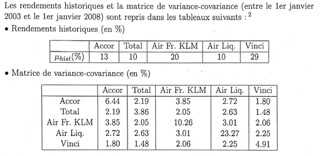

In [1535]:
from IPython.display import display, Image
jpeg_file = '22.jpeg'
display(Image(filename=jpeg_file))

In [1536]:
e_r=np.array([13,10,20,10,29])/100
e_r

array([0.13, 0.1 , 0.2 , 0.1 , 0.29])

In [1537]:
cov=np.array([
    [6.44,2.19,3.85,2.72,1.80],
    [2.19,3.86,2.05,2.63,1.48],
    [3.85,2.05,10.26,3.01,2.06],
    [2.72,2.63,3.01,23.27,2.25],
    [1.80,1.48,2.06,2.25,4.91]
])
cov=cov/100
cov

array([[0.0644, 0.0219, 0.0385, 0.0272, 0.018 ],
       [0.0219, 0.0386, 0.0205, 0.0263, 0.0148],
       [0.0385, 0.0205, 0.1026, 0.0301, 0.0206],
       [0.0272, 0.0263, 0.0301, 0.2327, 0.0225],
       [0.018 , 0.0148, 0.0206, 0.0225, 0.0491]])

In [1538]:
stock_CAC40=np.array(stock_CAC40).flatten()
stock_CAC40=np.reshape(stock_CAC40, (5, 1))
stock_CAC40

array([[0.05],
       [0.67],
       [0.03],
       [0.12],
       [0.13]])

$$\Large \pi = \delta\Sigma w$$
$$\Large \mu-r_f1_{R_{n}}= \delta\Sigma w$$
$$\Large w^T\mu-r_f1_{R_{n}}= w^T\delta\Sigma w$$
$$\Large \delta=\frac{w^T\mu-r_f1_{R_{n}}}{w^T\Sigma w}$$
$$\Huge \delta_{hist}=\frac{\mu_{w,hist}-r_f}{\sigma^2_{hist,w}}$$

In [1539]:
mu_hist=np.round(erk.portfolio_return(stock_CAC40,e_r),2)
mu_hist

array([0.13])

In [1540]:
var_hist=np.round(erk.portfolio_vol(stock_CAC40,cov)**2,3)
var_hist

array([[0.033]])

In [1541]:
r_f=4.7/100
delta_hist=np.round((mu_hist-r_f)/var_hist,2)
delta_hist

array([[2.52]])

In [1542]:
r_implicites=np.round(delta_hist*cov.dot(stock_CAC40),2)
r_implicites=np.array(r_implicites)
r_implicites=np.reshape(r_implicites, (5, 1))
r_implicites

array([[0.06],
       [0.08],
       [0.06],
       [0.13],
       [0.05]])

- V1 : L’action Total aura un rendement de 6%+−1.5% avec 95% de chance.
- V2 : L’action Accor sur-perfomera Vinci de 1%+−1% avec 90% de chance.

In [1543]:
p=[
    [0,1,0,0,0],
    [1,0,0,0,-1]
]
p=np.reshape(p, (2, 5))
p

array([[ 0,  1,  0,  0,  0],
       [ 1,  0,  0,  0, -1]])

In [1544]:
q=np.array([6,1])/100
q=q.reshape(-1, 1)
q

array([[0.06],
       [0.01]])

L’actif 1 sur-performera l’actif 2 de q%+−m% (m > 0) avec probabilité p ∈]0, 1[.

$\sigma_\epsilon = \frac{m}{\phi^{-1}( \frac{1 +P}{2})}$

In [1545]:
m=[1.5,1]
prob=[0.95,0.9]
sigma_0=round(m[0]/norm.ppf((1+prob[0])/2),3)
sigma_0

0.765

In [1546]:
sigma_0=0.76

In [1547]:
sigma_1=round(m[1]/norm.ppf((1+prob[1])/2),2)
sigma_1

0.61

In [1548]:
omega=np.array([[sigma_0**2,0],[0,sigma_1**2]])
omega


array([[0.5776, 0.    ],
       [0.    , 0.3721]])

In [1549]:
tau=0.5
def bl2(sigma_prior,p,q,omega,tau,pi):
    p=np.array(p)
    #print("W shape:"+str(w_prior.shape))
    #print("Sigma shape:"+str(sigma_prior.shape))
    #print("P shape: "+str(p.shape))
    #print("Q shape"+str(q.shape))
    #print("omega shape: "+str(omega.shape))
    #print("delta: "+str(delta)+ "tau: "+str(tau))
    #print("pi shape: "+str(pi.shape))
    sigma_prior_scaled = tau * sigma_prior
    #print(sigma_prior_scaled.shape)

    mu_bl = np.round(pi + sigma_prior_scaled.dot(p.T).dot(inv(p.dot(sigma_prior_scaled).dot(p.T) + omega).dot(q - p.dot(pi))),4)

    return mu_bl
bl_mu = bl2(cov, p, q,omega,tau,r_implicites)

bl_mu

array([[0.0596],
       [0.0794],
       [0.0597],
       [0.1296],
       [0.0497]])

In [1550]:
w_bl=inv(delta_hist*cov).dot(bl_mu)
w_bl

array([[0.04649578],
       [0.64364498],
       [0.02270512],
       [0.12805477],
       [0.1224113 ]])

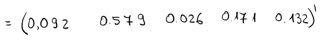

In [1551]:
from IPython.display import display, Image
jpeg_file = '23.jpeg'
display(Image(filename=jpeg_file))

<font color="orange">les avantages par rapport au modèle de Markowitz sont notamment l'intégration des opinions personnelles, la réduction de la sensibilité aux données d'entrée, l'adaptabilité aux conditions de marché. Cependant, la mise en œuvre du modèle peut être plus complexe que celle du modèle de Markowitz en raison de la nécessité d'estimer les paramètres du modèle et d'ajuster les pondérations en fonction des prévisions personnelles.</font>